<a href="https://colab.research.google.com/github/serggget-coder/-Automatic-leaf-infection-identifier111/blob/main/Untitled14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 АНАЛИЗ ЯРКОСТИ RGB КАНАЛОВ

1️  Анализирую папку с ПЛОХИМ виноградом...
🔍 Анализирую 379 изображений в папке: bad_vinograd_new
   Обработано 50/379 изображений
   Обработано 100/379 изображений
   Обработано 150/379 изображений
   Обработано 200/379 изображений
   Обработано 250/379 изображений
   Обработано 300/379 изображений
   Обработано 350/379 изображений

 СТАТИСТИКА ЯРКОСТИ: bad_vinograd_new
Количество изображений: 379

СРЕДНИЕ ЗНАЧЕНИЯ ПО ВСЕЙ ПАПКЕ:
   Красный канал (R): 96.33
   Зеленый канал (G): 98.17
   Синий канал (B): 54.55
   Общая яркость: 83.02

📊 СТАТИСТИКА ПО ИЗОБРАЖЕНИЯМ:
   R: min=80.94, max=119.54, std=10.04
   G: min=84.85, max=119.87, std=9.18
   B: min=43.23, max=69.78, std=6.02

2️  Анализирую папку с ХОРОШИМ виноградом...
🔍 Анализирую 279 изображений в папке: good_vinograd_new
   Обработано 50/279 изображений
   Обработано 100/27

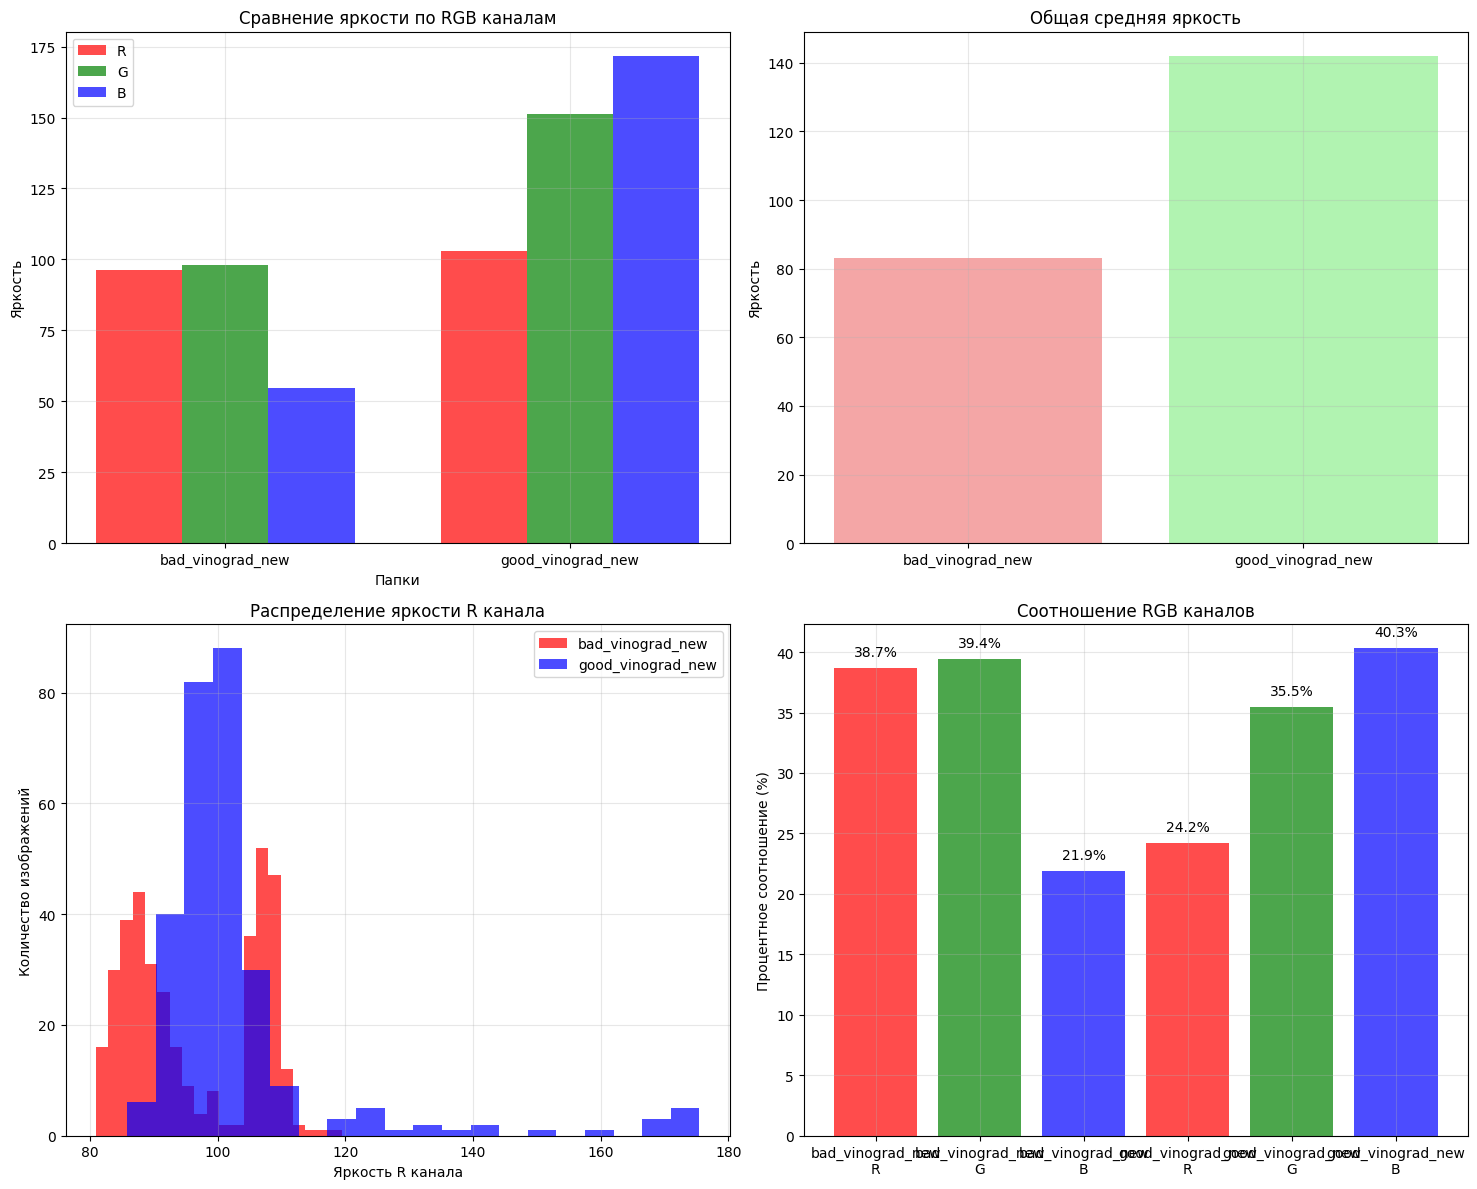

In [ ]:
import cv2
import os
import numpy as np
import glob
from google.colab import drive
import matplotlib.pyplot as plt

# Подключаем Google Диск
drive.mount('/content/drive')

def calculate_folder_brightness(folder_path):
    """
    Вычисляет среднюю яркость по RGB каналам для всех изображений в папке
    """
    # Находим все изображения
    extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']
    images = []
    for ext in extensions:
        images.extend(glob.glob(os.path.join(folder_path, ext)))
        images.extend(glob.glob(os.path.join(folder_path, ext.upper())))

    if not images:
        print(f"❌ В папке {folder_path} нет изображений")
        return None

    # Инициализируем сумматоры
    total_r, total_g, total_b = 0, 0, 0
    total_pixels = 0
    all_r, all_g, all_b = [], [], []

    print(f"🔍 Анализирую {len(images)} изображений в папке: {os.path.basename(folder_path)}")

    for i, image_path in enumerate(images, 1):
        # Загружаем изображение
        img = cv2.imread(image_path)
        if img is None:
            continue

        # Конвертируем BGR в RGB (OpenCV использует BGR по умолчанию)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Разделяем на каналы
        r_channel = img_rgb[:, :, 0]
        g_channel = img_rgb[:, :, 1]
        b_channel = img_rgb[:, :, 2]

        # Считаем средние значения для этого изображения
        mean_r = np.mean(r_channel)
        mean_g = np.mean(g_channel)
        mean_b = np.mean(b_channel)

        # Добавляем к общим суммам
        total_r += mean_r * r_channel.size
        total_g += mean_g * g_channel.size
        total_b += mean_b * b_channel.size
        total_pixels += r_channel.size

        # Сохраняем для статистики
        all_r.append(mean_r)
        all_g.append(mean_g)
        all_b.append(mean_b)

        if i % 50 == 0:
            print(f"   Обработано {i}/{len(images)} изображений")

    # Вычисляем общие средние значения
    if total_pixels > 0:
        overall_mean_r = total_r / total_pixels
        overall_mean_g = total_g / total_pixels
        overall_mean_b = total_b / total_pixels
    else:
        overall_mean_r = overall_mean_g = overall_mean_b = 0

    # Статистика по изображениям
    stats = {
        'overall': {
            'R': overall_mean_r,
            'G': overall_mean_g,
            'B': overall_mean_b,
            'Brightness': (overall_mean_r + overall_mean_g + overall_mean_b) / 3
        },
        'per_image': {
            'R': all_r,
            'G': all_g,
            'B': all_b
        },
        'image_count': len(images),
        'folder_name': os.path.basename(folder_path)
    }

    return stats

def print_brightness_stats(stats):
    """Выводит статистику яркости"""
    if stats is None:
        return

    print(f"\n СТАТИСТИКА ЯРКОСТИ: {stats['folder_name']}")
    print("=" * 50)
    print(f"Количество изображений: {stats['image_count']}")
    print()

    overall = stats['overall']
    print("СРЕДНИЕ ЗНАЧЕНИЯ ПО ВСЕЙ ПАПКЕ:")
    print(f"   Красный канал (R): {overall['R']:.2f}")
    print(f"   Зеленый канал (G): {overall['G']:.2f}")
    print(f"   Синий канал (B): {overall['B']:.2f}")
    print(f"   Общая яркость: {overall['Brightness']:.2f}")
    print()

    # Статистика по отдельным изображениям
    r_values = stats['per_image']['R']
    g_values = stats['per_image']['G']
    b_values = stats['per_image']['B']

    print(" СТАТИСТИКА ПО ИЗОБРАЖЕНИЯМ:")
    print(f"   R: min={np.min(r_values):.2f}, max={np.max(r_values):.2f}, std={np.std(r_values):.2f}")
    print(f"   G: min={np.min(g_values):.2f}, max={np.max(g_values):.2f}, std={np.std(g_values):.2f}")
    print(f"   B: min={np.min(b_values):.2f}, max={np.max(b_values):.2f}, std={np.std(b_values):.2f}")

def plot_brightness_comparison(stats1, stats2):
    """Строит график сравнения яркости двух папок"""
    if stats1 is None or stats2 is None:
        return

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Данные для графиков
    folders = [stats1['folder_name'], stats2['folder_name']]
    r_values = [stats1['overall']['R'], stats2['overall']['R']]
    g_values = [stats1['overall']['G'], stats2['overall']['G']]
    b_values = [stats1['overall']['B'], stats2['overall']['B']]
    brightness_values = [stats1['overall']['Brightness'], stats2['overall']['Brightness']]

    colors = ['red', 'green', 'blue']
    channels = ['R', 'G', 'B']
    values = [r_values, g_values, b_values]

    # График 1: Сравнение по каналам
    x = np.arange(len(folders))
    width = 0.25

    for i, (channel, color, vals) in enumerate(zip(channels, colors, values)):
        ax1.bar(x + i*width, vals, width, label=channel, color=color, alpha=0.7)

    ax1.set_xlabel('Папки')
    ax1.set_ylabel('Яркость')
    ax1.set_title('Сравнение яркости по RGB каналам')
    ax1.set_xticks(x + width)
    ax1.set_xticklabels(folders)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # График 2: Общая яркость
    ax2.bar(folders, brightness_values, color=['lightcoral', 'lightgreen'], alpha=0.7)
    ax2.set_ylabel('Яркость')
    ax2.set_title('Общая средняя яркость')
    ax2.grid(True, alpha=0.3)

    # График 3: Распределение по изображениям (R канал)
    ax3.hist(stats1['per_image']['R'], alpha=0.7, label=stats1['folder_name'], color='red', bins=20)
    ax3.hist(stats2['per_image']['R'], alpha=0.7, label=stats2['folder_name'], color='blue', bins=20)
    ax3.set_xlabel('Яркость R канала')
    ax3.set_ylabel('Количество изображений')
    ax3.set_title('Распределение яркости R канала')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # График 4: Соотношение каналов
    channel_means = [
        [stats1['overall']['R'], stats1['overall']['G'], stats1['overall']['B']],
        [stats2['overall']['R'], stats2['overall']['G'], stats2['overall']['B']]
    ]

    for i, means in enumerate(channel_means):
        total = sum(means)
        percentages = [m/total*100 for m in means]
        ax4.bar([f'{folders[i]}\nR', f'{folders[i]}\nG', f'{folders[i]}\nB'],
                percentages, color=['red', 'green', 'blue'], alpha=0.7)
        for j, percent in enumerate(percentages):
            ax4.text(j + i*3, percent + 1, f'{percent:.1f}%', ha='center')

    ax4.set_ylabel('Процентное соотношение (%)')
    ax4.set_title('Соотношение RGB каналов')
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

#ОСНОВНОЙ СКРИПТ

def main():
    # Ваши папки
    FOLDER1 = "/content/drive/MyDrive/bad_vinograd_new"  # Плохой виноград
    FOLDER2 = "/content/drive/MyDrive/good_vinograd_new" # Хороший виноград

    print(" АНАЛИЗ ЯРКОСТИ RGB КАНАЛОВ")
    print("=" * 50)

    # Анализируем первую папку
    print("\n1️  Анализирую папку с ПЛОХИМ виноградом...")
    stats1 = calculate_folder_brightness(FOLDER1)
    print_brightness_stats(stats1)

    # Анализируем вторую папку
    print("\n2️  Анализирую папку с ХОРОШИМ виноградом...")
    stats2 = calculate_folder_brightness(FOLDER2)
    print_brightness_stats(stats2)

    # Сравниваем
    if stats1 and stats2:
        print("\n" + "="*50)
        print("СРАВНЕНИЕ ПАПОК:")
        print("="*50)

        print(f"Разница в яркости:")
        print(f"   R: {abs(stats1['overall']['R'] - stats2['overall']['R']):.2f}")
        print(f"   G: {abs(stats1['overall']['G'] - stats2['overall']['G']):.2f}")
        print(f"   B: {abs(stats1['overall']['B'] - stats2['overall']['B']):.2f}")
        print(f"   Общая: {abs(stats1['overall']['Brightness'] - stats2['overall']['Brightness']):.2f}")

        # Строим графики
        print("\n Строю графики сравнения...")
        plot_brightness_comparison(stats1, stats2)

# Запускаем
if __name__ == "__main__":
    main()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
АНАЛИЗ АЛГОРИТМА 'СЕРЫЙ МИР'

1  Анализирую папку с ПЛОХИМ виноградом...
🔍 Анализирую 379 изображений: bad_vinograd_new
   Обработано 50/379
   Обработано 100/379
   Обработано 150/379
   Обработано 200/379
   Обработано 250/379
   Обработано 300/379
   Обработано 350/379

📈 АНАЛИЗ 'СЕРЫЙ МИР': bad_vinograd_new
📊 Количество изображений: 379

ДО КОРРЕКЦИИ:
    R: 96.33
    G: 98.17
    B: 54.55
    Среднее: 83.02
    Отклонение каналов: 20.14

 ПОСЛЕ КОРРЕКЦИИ ('Серый мир'):
    R: 82.52
    G: 82.52
    B: 82.52
    Среднее: 82.52
    Отклонение каналов: 0.00

 КОЭФФИЦИЕНТЫ КОРРЕКЦИИ:
    R: 0.863 ± 0.015
    G: 0.845 ± 0.014
    B: 1.525 ± 0.073

 ЭФФЕКТИВНОСТЬ КОРРЕКЦИИ:
    Уменьшение отклонения: 20.14 (100.0%)
    Баланс каналов: ✓ Хороший

2  Анализирую папку с ХОРОШИМ виноградом...
🔍 Анализирую 279 изображений: good_vinograd_new
   Обработано 50/279
   

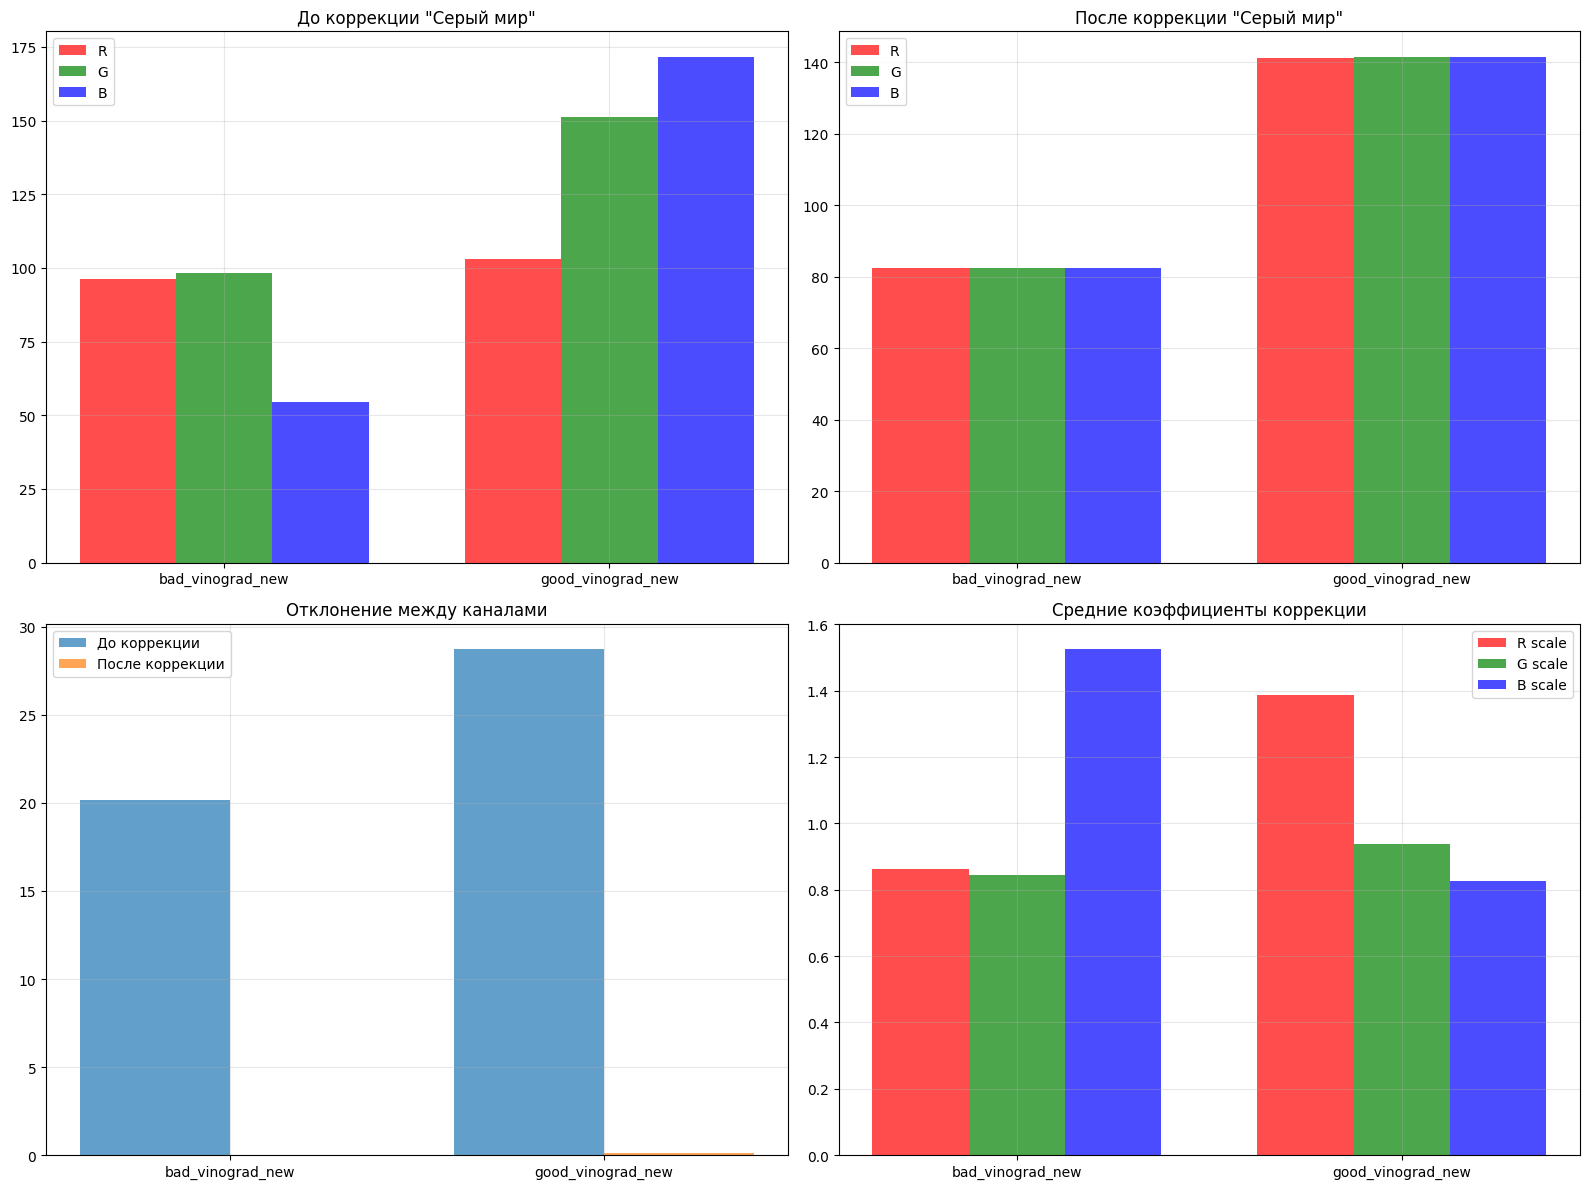

In [ ]:
import cv2
import os
import numpy as np
import glob
from google.colab import drive
import matplotlib.pyplot as plt

# Подключаем Google Диск
drive.mount('/content/drive')

def apply_gray_world(image):
    """
    Применяет алгоритм "Серый мир" к изображению
    """
    # Конвертируем BGR в RGB
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Вычисляем средние значения каналов
    mean_r = np.mean(img_rgb[:, :, 0])
    mean_g = np.mean(img_rgb[:, :, 1])
    mean_b = np.mean(img_rgb[:, :, 2])

    # Вычисляем среднее значение по всем каналам
    mean_all = (mean_r + mean_g + mean_b) / 3.0

    # Вычисляем коэффициенты коррекции
    scale_r = mean_all / mean_r if mean_r > 0 else 1.0
    scale_g = mean_all / mean_g if mean_g > 0 else 1.0
    scale_b = mean_all / mean_b if mean_b > 0 else 1.0

    # Применяем коррекцию
    corrected = img_rgb.copy().astype(np.float32)
    corrected[:, :, 0] *= scale_r  # R канал
    corrected[:, :, 1] *= scale_g  # G канал
    corrected[:, :, 2] *= scale_b  # B канал

    # Ограничиваем значения [0, 255]
    corrected = np.clip(corrected, 0, 255).astype(np.uint8)

    # Конвертируем обратно в BGR для OpenCV
    corrected_bgr = cv2.cvtColor(corrected, cv2.COLOR_RGB2BGR)

    return corrected_bgr, (mean_r, mean_g, mean_b, mean_all, scale_r, scale_g, scale_b)

def calculate_folder_brightness_with_gray_world(folder_path):
    """
    Вычисляет среднюю яркость и применяет алгоритм "Серый мир"
    """
    extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']
    images = []
    for ext in extensions:
        images.extend(glob.glob(os.path.join(folder_path, ext)))
        images.extend(glob.glob(os.path.join(folder_path, ext.upper())))

    if not images:
        print(f"В папке {folder_path} нет изображений")
        return None

    # Статистика до коррекции
    total_r, total_g, total_b = 0, 0, 0
    total_pixels = 0

    # Статистика после коррекции
    total_r_corr, total_g_corr, total_b_corr = 0, 0, 0

    # Коэффициенты коррекции
    all_scales_r, all_scales_g, all_scales_b = [], [], []

    print(f" Анализирую {len(images)} изображений: {os.path.basename(folder_path)}")

    for i, image_path in enumerate(images, 1):
        img = cv2.imread(image_path)
        if img is None:
            continue

        # Применяем алгоритм "Серый мир"
        corrected_img, stats = apply_gray_world(img)
        mean_r, mean_g, mean_b, mean_all, scale_r, scale_g, scale_b = stats

        # Статистика до коррекции
        total_r += mean_r * img.shape[0] * img.shape[1]
        total_g += mean_g * img.shape[0] * img.shape[1]
        total_b += mean_b * img.shape[0] * img.shape[1]
        total_pixels += img.shape[0] * img.shape[1]

        # Статистика после коррекции
        corrected_rgb = cv2.cvtColor(corrected_img, cv2.COLOR_BGR2RGB)
        mean_r_corr = np.mean(corrected_rgb[:, :, 0])
        mean_g_corr = np.mean(corrected_rgb[:, :, 1])
        mean_b_corr = np.mean(corrected_rgb[:, :, 2])

        total_r_corr += mean_r_corr * img.shape[0] * img.shape[1]
        total_g_corr += mean_g_corr * img.shape[0] * img.shape[1]
        total_b_corr += mean_b_corr * img.shape[0] * img.shape[1]

        # Сохраняем коэффициенты
        all_scales_r.append(scale_r)
        all_scales_g.append(scale_g)
        all_scales_b.append(scale_b)

        if i % 50 == 0:
            print(f"   Обработано {i}/{len(images)}")

    # Вычисляем средние значения
    if total_pixels > 0:
        # До коррекции
        overall_mean_r = total_r / total_pixels
        overall_mean_g = total_g / total_pixels
        overall_mean_b = total_b / total_pixels
        overall_mean = (overall_mean_r + overall_mean_g + overall_mean_b) / 3

        # После коррекции
        overall_mean_r_corr = total_r_corr / total_pixels
        overall_mean_g_corr = total_g_corr / total_pixels
        overall_mean_b_corr = total_b_corr / total_pixels
        overall_mean_corr = (overall_mean_r_corr + overall_mean_g_corr + overall_mean_b_corr) / 3
    else:
        overall_mean_r = overall_mean_g = overall_mean_b = overall_mean = 0
        overall_mean_r_corr = overall_mean_g_corr = overall_mean_b_corr = overall_mean_corr = 0

    stats = {
        'before_correction': {
            'R': overall_mean_r,
            'G': overall_mean_g,
            'B': overall_mean_b,
            'Average': overall_mean,
            'Deviation': np.std([overall_mean_r, overall_mean_g, overall_mean_b])
        },
        'after_correction': {
            'R': overall_mean_r_corr,
            'G': overall_mean_g_corr,
            'B': overall_mean_b_corr,
            'Average': overall_mean_corr,
            'Deviation': np.std([overall_mean_r_corr, overall_mean_g_corr, overall_mean_b_corr])
        },
        'correction_factors': {
            'R_mean': np.mean(all_scales_r),
            'G_mean': np.mean(all_scales_g),
            'B_mean': np.mean(all_scales_b),
            'R_std': np.std(all_scales_r),
            'G_std': np.std(all_scales_g),
            'B_std': np.std(all_scales_b)
        },
        'image_count': len(images),
        'folder_name': os.path.basename(folder_path)
    }

    return stats

def print_gray_world_stats(stats):
    """Выводит статистику алгоритма 'Серый мир'"""
    if stats is None:
        return

    print(f"\n АНАЛИЗ 'СЕРЫЙ МИР': {stats['folder_name']}")
    print("=" * 60)
    print(f" Количество изображений: {stats['image_count']}")
    print()

    before = stats['before_correction']
    after = stats['after_correction']
    factors = stats['correction_factors']

    print("ДО КОРРЕКЦИИ:")
    print(f"    R: {before['R']:.2f}")
    print(f"    G: {before['G']:.2f}")
    print(f"    B: {before['B']:.2f}")
    print(f"    Среднее: {before['Average']:.2f}")
    print(f"    Отклонение каналов: {before['Deviation']:.2f}")
    print()

    print(" ПОСЛЕ КОРРЕКЦИИ ('Серый мир'):")
    print(f"    R: {after['R']:.2f}")
    print(f"    G: {after['G']:.2f}")
    print(f"    B: {after['B']:.2f}")
    print(f"    Среднее: {after['Average']:.2f}")
    print(f"    Отклонение каналов: {after['Deviation']:.2f}")
    print()

    print(" КОЭФФИЦИЕНТЫ КОРРЕКЦИИ:")
    print(f"    R: {factors['R_mean']:.3f} ± {factors['R_std']:.3f}")
    print(f"    G: {factors['G_mean']:.3f} ± {factors['G_std']:.3f}")
    print(f"    B: {factors['B_mean']:.3f} ± {factors['B_std']:.3f}")
    print()

    # Эффективность коррекции
    improvement = before['Deviation'] - after['Deviation']
    print(f" ЭФФЕКТИВНОСТЬ КОРРЕКЦИИ:")
    print(f"    Уменьшение отклонения: {improvement:.2f} ({improvement/before['Deviation']*100:.1f}%)")
    print(f"    Баланс каналов: {'✓ Хороший' if after['Deviation'] < 5 else '⚠️ Можно улучшить'}")

def plot_gray_world_comparison(stats1, stats2):
    """Строит графики сравнения"""
    if stats1 is None or stats2 is None:
        return

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    folders = [stats1['folder_name'], stats2['folder_name']]

    # Данные для графиков
    before_r = [stats1['before_correction']['R'], stats2['before_correction']['R']]
    before_g = [stats1['before_correction']['G'], stats2['before_correction']['G']]
    before_b = [stats1['before_correction']['B'], stats2['before_correction']['B']]

    after_r = [stats1['after_correction']['R'], stats2['after_correction']['R']]
    after_g = [stats1['after_correction']['G'], stats2['after_correction']['G']]
    after_b = [stats1['after_correction']['B'], stats2['after_correction']['B']]

    # График 1: Сравнение до коррекции
    x = np.arange(len(folders))
    width = 0.25

    ax1.bar(x - width, before_r, width, label='R', color='red', alpha=0.7)
    ax1.bar(x, before_g, width, label='G', color='green', alpha=0.7)
    ax1.bar(x + width, before_b, width, label='B', color='blue', alpha=0.7)
    ax1.set_title('До коррекции "Серый мир"')
    ax1.set_xticks(x)
    ax1.set_xticklabels(folders)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # График 2: Сравнение после коррекции
    ax2.bar(x - width, after_r, width, label='R', color='red', alpha=0.7)
    ax2.bar(x, after_g, width, label='G', color='green', alpha=0.7)
    ax2.bar(x + width, after_b, width, label='B', color='blue', alpha=0.7)
    ax2.set_title('После коррекции "Серый мир"')
    ax2.set_xticks(x)
    ax2.set_xticklabels(folders)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # График 3: Отклонение каналов
    deviation_before = [stats1['before_correction']['Deviation'], stats2['before_correction']['Deviation']]
    deviation_after = [stats1['after_correction']['Deviation'], stats2['after_correction']['Deviation']]

    ax3.bar(x - 0.2, deviation_before, 0.4, label='До коррекции', alpha=0.7)
    ax3.bar(x + 0.2, deviation_after, 0.4, label='После коррекции', alpha=0.7)
    ax3.set_title('Отклонение между каналами')
    ax3.set_xticks(x)
    ax3.set_xticklabels(folders)
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # График 4: Коэффициенты коррекции
    scales_r = [stats1['correction_factors']['R_mean'], stats2['correction_factors']['R_mean']]
    scales_g = [stats1['correction_factors']['G_mean'], stats2['correction_factors']['G_mean']]
    scales_b = [stats1['correction_factors']['B_mean'], stats2['correction_factors']['B_mean']]

    ax4.bar(x - width, scales_r, width, label='R scale', color='red', alpha=0.7)
    ax4.bar(x, scales_g, width, label='G scale', color='green', alpha=0.7)
    ax4.bar(x + width, scales_b, width, label='B scale', color='blue', alpha=0.7)
    ax4.set_title('Средние коэффициенты коррекции')
    ax4.set_xticks(x)
    ax4.set_xticklabels(folders)
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# ОСНОВНОЙ СКРИПТ

def main():
    # Ваши папки
    FOLDER1 = "/content/drive/MyDrive/bad_vinograd_new"
    FOLDER2 = "/content/drive/MyDrive/good_vinograd_new"

    print("АНАЛИЗ АЛГОРИТМА 'СЕРЫЙ МИР'")
    print("=" * 60)

    # Анализируем первую папку
    print("\n1  Анализирую папку с ПЛОХИМ виноградом...")
    stats1 = calculate_folder_brightness_with_gray_world(FOLDER1)
    print_gray_world_stats(stats1)

    # Анализируем вторую папку
    print("\n2  Анализирую папку с ХОРОШИМ виноградом...")
    stats2 = calculate_folder_brightness_with_gray_world(FOLDER2)
    print_gray_world_stats(stats2)

    # Сравниваем
    if stats1 and stats2:
        print("\n" + "="*60)
        print("СРАВНЕНИЕ ЭФФЕКТИВНОСТИ 'СЕРОГО МИРА':")
        print("="*60)

        # Эффективность коррекции
        improvement1 = stats1['before_correction']['Deviation'] - stats1['after_correction']['Deviation']
        improvement2 = stats2['before_correction']['Deviation'] - stats2['after_correction']['Deviation']

        print(f" Уменьшение отклонения в папке 1: {improvement1:.2f}")
        print(f" Уменьшение отклонения в папке 2: {improvement2:.2f}")

        # Строим графики
        print("\n Строю графики сравнения...")
        plot_gray_world_comparison(stats1, stats2)

# Запускаем
if __name__ == "__main__":
    main()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 АНАЛИЗ ДИНАМИКИ ЯРКОСТИ С ВРЕМЕННЫМИ МЕТКАМИ

🧪 Тестирование извлечения временных меток...
   2025_08_26_184958_00_bad.jpg -> 2025-08-26 18:49:58
   2025_08_27_093045_01_good.png -> 2025-08-27 09:30:45

1️  Анализирую папку с ПЛОХИМ виноградом...
 Анализирую 379 изображений...
    Обработано 10/379
    Обработано 20/379
    Обработано 30/379
    Обработано 40/379
    Обработано 50/379
    Обработано 60/379
    Обработано 70/379
    Обработано 80/379
    Обработано 90/379
    Обработано 100/379
    Обработано 110/379
    Обработано 120/379
    Обработано 130/379
    Обработано 140/379
    Обработано 150/379
    Обработано 160/379
    Обработано 170/379
    Обработано 180/379
    Обработано 190/379
    Обработано 200/379
    Обработано 210/379
    Обработано 220/379
    Обработано 230/379
    Обработано 240/379
    Обработано 250/379
    Обработано 260/379
   

/tmp/ipython-input-2551148231.py:188: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


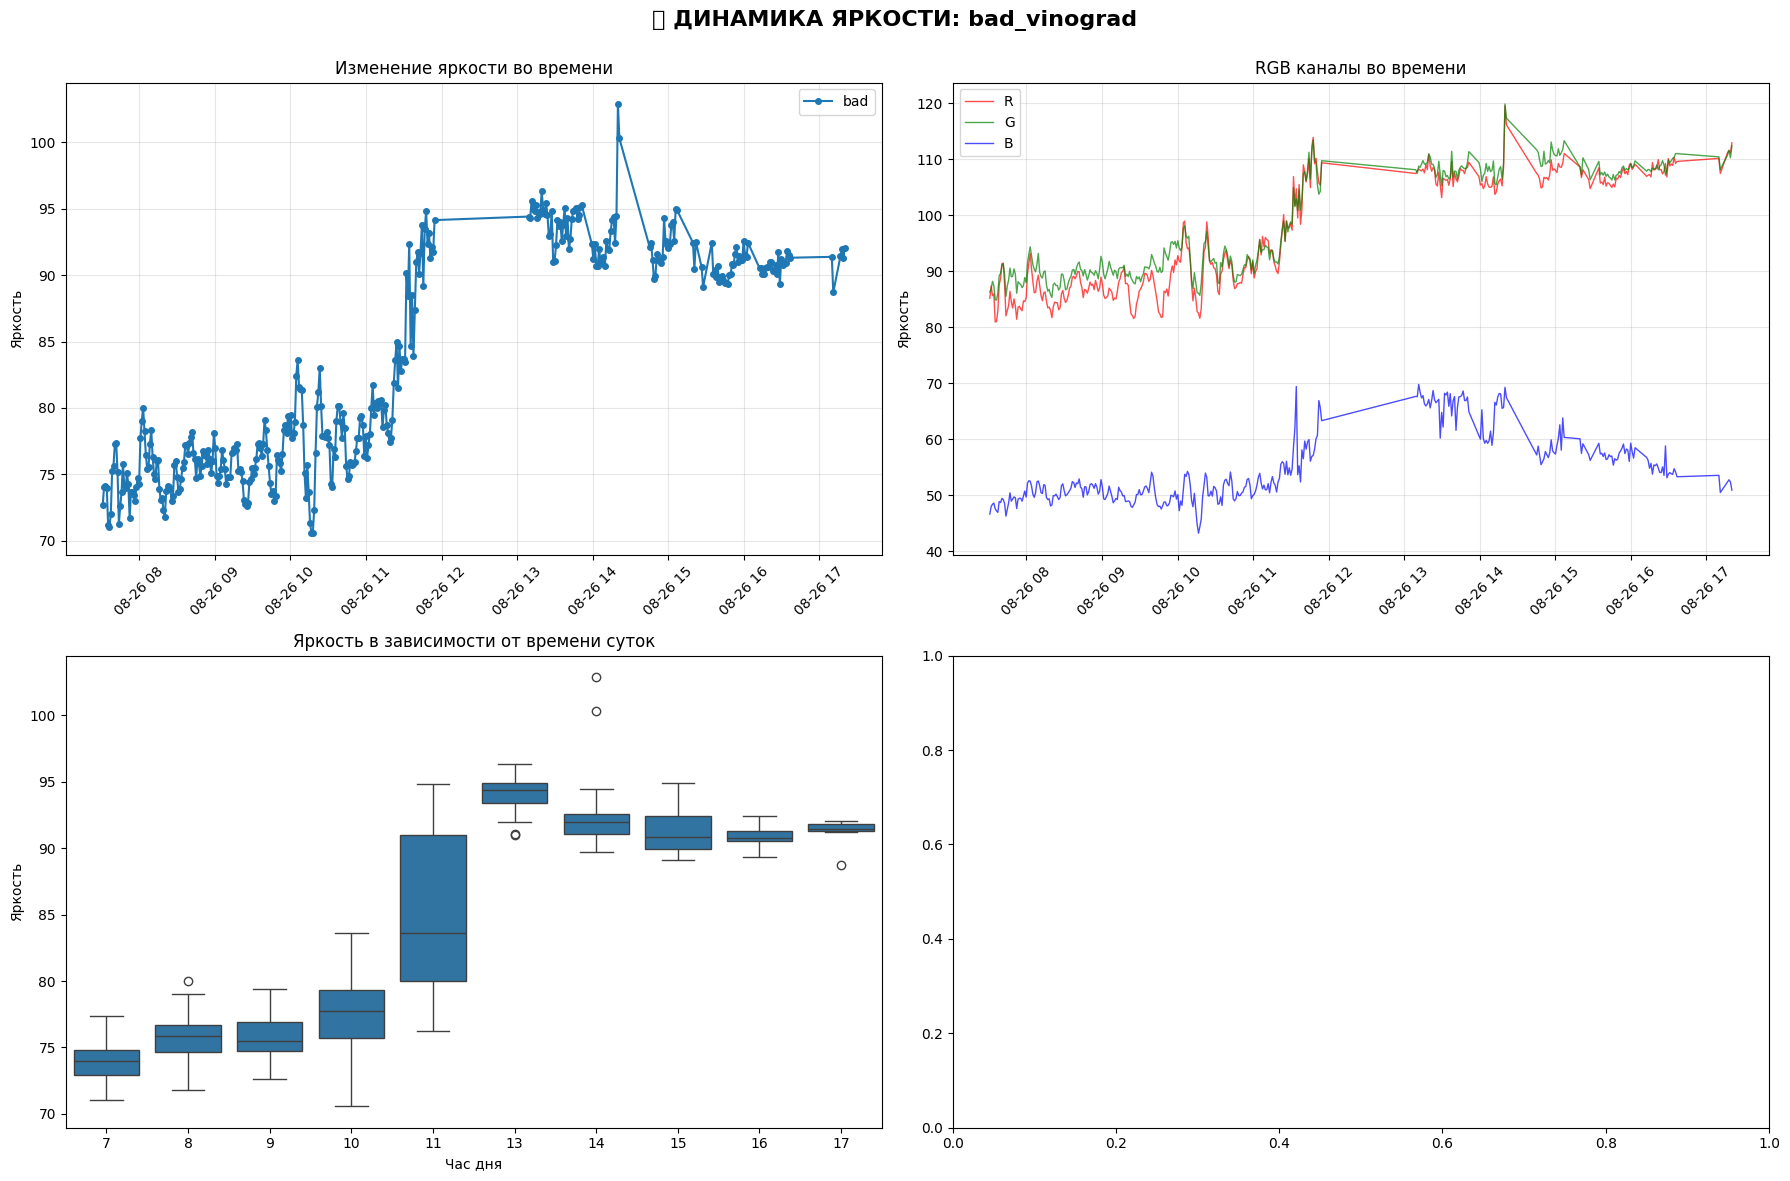


2️  Анализирую папку с ХОРОШИМ виноградом...
 Анализирую 279 изображений...
    Обработано 10/279
    Обработано 20/279
    Обработано 30/279
    Обработано 40/279
    Обработано 50/279
    Обработано 60/279
    Обработано 70/279
    Обработано 80/279
    Обработано 90/279
    Обработано 100/279
    Обработано 110/279
    Обработано 120/279
    Обработано 130/279
    Обработано 140/279
    Обработано 150/279
    Обработано 160/279
    Обработано 170/279
    Обработано 180/279
    Обработано 190/279
    Обработано 200/279
    Обработано 210/279
    Обработано 220/279
    Обработано 230/279
    Обработано 240/279
    Обработано 250/279
    Обработано 260/279
    Обработано 270/279

 ДЕТАЛЬНАЯ СТАТИСТИКА: good_vinograd
 Временной диапазон: 2025-08-26 09:01:21 - 2025-08-26 17:32:49
  Продолжительность: 0 дней
 Количество изображений: 279

 РАСПРЕДЕЛЕНИЕ ПО КАТЕГОРИЯМ:
   good: 279 изображений

 СТАТИСТИКА ЯРКОСТИ:
    Средняя яркость: 142.00
    Стандартное отклонение: 10.79
    Средний R

/tmp/ipython-input-2551148231.py:188: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


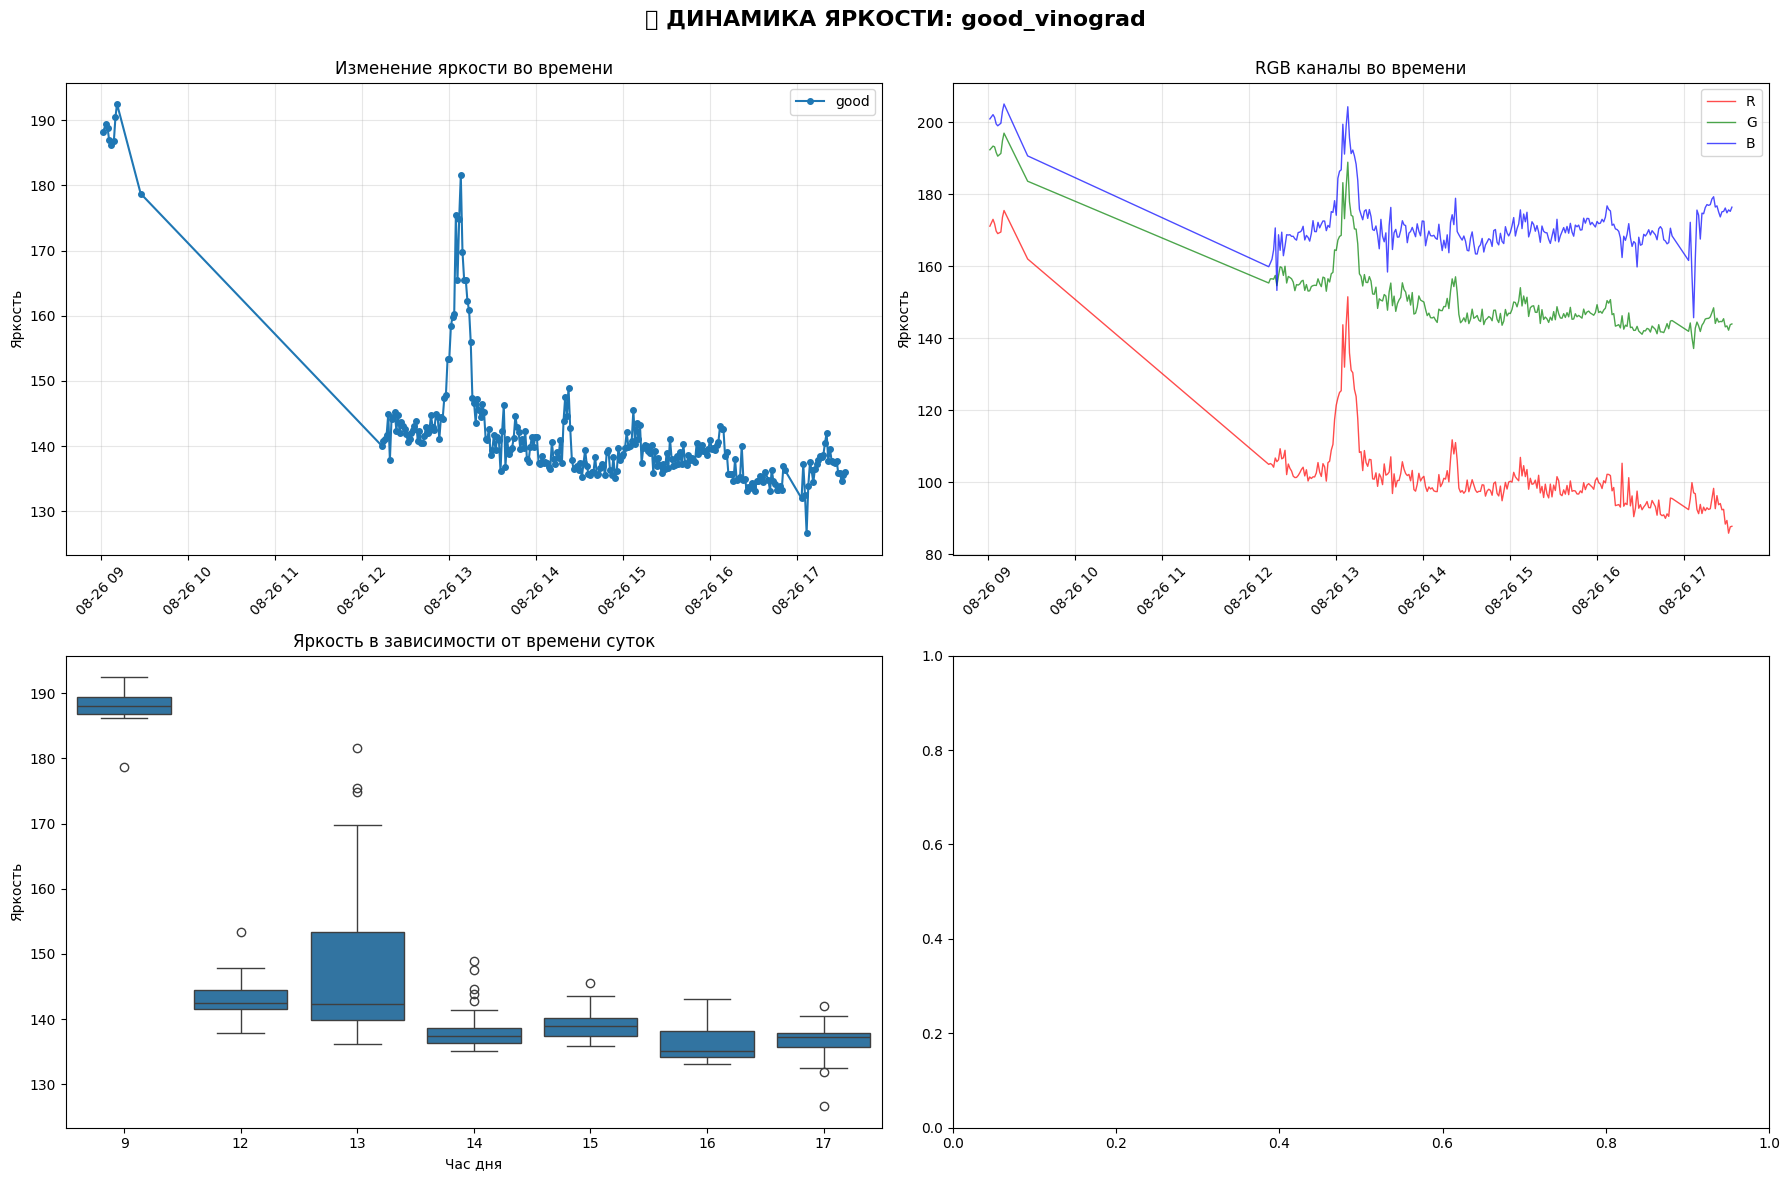


 СРАВНИТЕЛЬНЫЙ АНАЛИЗ:
 Средняя яркость:
   bad_vinograd: 83.02
   good_vinograd: 142.00
   Разница: 58.99


In [ ]:
import cv2
import os
import numpy as np
import glob
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import re

# Подключаем Google Диск
drive.mount('/content/drive')

def extract_timestamp_from_filename(filename):
    """
    Извлекает временную метку из имени файла в формате: 2025_08_26_184958_00_bad
    """
    try:
        # Используем регулярное выражение для поиска паттерна
        pattern = r'(\d{4})_(\d{2})_(\d{2})_(\d{6})'
        match = re.search(pattern, filename)

        if match:
            year, month, day, time_str = match.groups()

            # Извлекаем компоненты времени
            hour = time_str[:2]
            minute = time_str[2:4]
            second = time_str[4:6]

            # Создаем datetime объект
            dt_str = f"{year}-{month}-{day} {hour}:{minute}:{second}"
            dt = datetime.strptime(dt_str, "%Y-%m-%d %H:%M:%S")
            return dt

    except Exception as e:
        print(f" Ошибка при извлечении времени из {filename}: {e}")

    # Если не удалось извлечь, используем время изменения файла
    try:
        return datetime.fromtimestamp(os.path.getmtime(filename))
    except:
        return datetime.now()

def analyze_image_with_timestamp(image_path):
    """
    Анализирует изображение и возвращает данные с временной меткой
    """
    img = cv2.imread(image_path)
    if img is None:
        return None

    filename = os.path.basename(image_path)

    # Извлекаем временную метку
    timestamp = extract_timestamp_from_filename(filename)

    # Конвертируем в RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Вычисляем статистику по каналам
    r_mean = np.mean(img_rgb[:, :, 0])
    g_mean = np.mean(img_rgb[:, :, 1])
    b_mean = np.mean(img_rgb[:, :, 2])
    overall_mean = (r_mean + g_mean + b_mean) / 3

    # Яркость в grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_mean = np.mean(img_gray)

    # Контрастность
    contrast = np.std(img_gray)

    # Извлекаем категорию из имени файла
    category = "unknown"
    if 'bad' in filename.lower():
        category = "bad"
    elif 'good' in filename.lower():
        category = "good"

    return {
        'filename': filename,
        'timestamp': timestamp,
        'category': category,
        'brightness_r': r_mean,
        'brightness_g': g_mean,
        'brightness_b': b_mean,
        'brightness_overall': overall_mean,
        'brightness_gray': gray_mean,
        'contrast': contrast,
        'width': img.shape[1],
        'height': img.shape[0],
        'file_size': os.path.getsize(image_path)
    }

def analyze_folder_with_timeline(folder_path):
    """
    Анализирует все изображения в папке с временными метками
    """
    extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']
    images = []
    for ext in extensions:
        images.extend(glob.glob(os.path.join(folder_path, ext)))
        images.extend(glob.glob(os.path.join(folder_path, ext.upper())))

    if not images:
        print(f" В папке {folder_path} нет изображений")
        return None

    print(f" Анализирую {len(images)} изображений...")

    all_data = []
    for i, image_path in enumerate(images, 1):
        data = analyze_image_with_timestamp(image_path)
        if data:
            all_data.append(data)

        if i % 10 == 0:
            print(f"    Обработано {i}/{len(images)}")

    # Сортируем по времени
    all_data.sort(key=lambda x: x['timestamp'])

    # Создаем DataFrame для анализа
    df = pd.DataFrame(all_data)

    # Добавляем дополнительные метрики времени
    if len(df) > 0:
        df['time_delta'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds() / 3600  # часы
        df['date'] = df['timestamp'].dt.date
        df['hour'] = df['timestamp'].dt.hour
        df['minute'] = df['timestamp'].dt.minute
        df['time_of_day'] = df['timestamp'].dt.strftime('%H:%M')

    return df

def plot_timeline_analysis(df, folder_name):
    """
    Строит графики временного анализа
    """
    if df is None or len(df) == 0:
        return

    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle(f'📈 ДИНАМИКА ЯРКОСТИ: {folder_name}\n', fontsize=16, fontweight='bold')

    # График 1: Яркость во времени
    ax1 = axes[0, 0]
    for category in df['category'].unique():
        category_data = df[df['category'] == category]
        ax1.plot(category_data['timestamp'], category_data['brightness_overall'],
                'o-', label=category, markersize=4)

    ax1.set_title('Изменение яркости во времени')
    ax1.set_ylabel('Яркость')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

    # График 2: RGB каналы во времени
    ax2 = axes[0, 1]
    ax2.plot(df['timestamp'], df['brightness_r'], 'r-', label='R', alpha=0.7, linewidth=1)
    ax2.plot(df['timestamp'], df['brightness_g'], 'g-', label='G', alpha=0.7, linewidth=1)
    ax2.plot(df['timestamp'], df['brightness_b'], 'b-', label='B', alpha=0.7, linewidth=1)
    ax2.set_title('RGB каналы во времени')
    ax2.set_ylabel('Яркость')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

    # График 3: Яркость по времени суток
    ax3 = axes[1, 0]
    if len(df) > 1:
        sns.boxplot(x='hour', y='brightness_overall', data=df, ax=ax3)
        ax3.set_title('Яркость в зависимости от времени суток')
        ax3.set_xlabel('Час дня')
        ax3.set_ylabel('Яркость')

    # График 4: Сравнение категорий
    ax4 = axes[1, 1]
    if 'category' in df.columns and len(df['category'].unique()) > 1:
        sns.violinplot(x='category', y='brightness_overall', data=df, ax=ax4)
        ax4.set_title('Распределение яркости по категориям')
        ax4.set_xlabel('Категория')
        ax4.set_ylabel('Яркость')

    plt.tight_layout()
    plt.show()

def print_detailed_statistics(df, folder_name):
    """
    Выводит детальную статистику
    """
    if df is None or len(df) == 0:
        return

    print(f"\n ДЕТАЛЬНАЯ СТАТИСТИКА: {folder_name}")
    print("=" * 60)
    print(f" Временной диапазон: {df['timestamp'].min()} - {df['timestamp'].max()}")
    print(f"  Продолжительность: {(df['timestamp'].max() - df['timestamp'].min()).days} дней")
    print(f" Количество изображений: {len(df)}")

    # Статистика по категориям
    if 'category' in df.columns:
        print(f"\n РАСПРЕДЕЛЕНИЕ ПО КАТЕГОРИЯМ:")
        category_counts = df['category'].value_counts()
        for cat, count in category_counts.items():
            print(f"   {cat}: {count} изображений")

    print(f"\n СТАТИСТИКА ЯРКОСТИ:")
    print(f"    Средняя яркость: {df['brightness_overall'].mean():.2f}")
    print(f"    Стандартное отклонение: {df['brightness_overall'].std():.2f}")
    print(f"    Средний R: {df['brightness_r'].mean():.2f}")
    print(f"    Средний G: {df['brightness_g'].mean():.2f}")
    print(f"    Средний B: {df['brightness_b'].mean():.2f}")

    # Анализ трендов
    if len(df) > 1:
        time_corr = df['brightness_overall'].corr(df['time_delta'])
        trend = " Возрастает" if time_corr > 0.1 else " Убывает" if time_corr < -0.1 else " Стабильна"
        print(f"\n ТРЕНД: {trend} (корреляция: {time_corr:.3f})")

#  ОСНОВНОЙ СКРИПТ

def main():
    # Ваши папки
    FOLDER1 = "/content/drive/MyDrive/bad_vinograd_new"
    FOLDER2 = "/content/drive/MyDrive/good_vinograd_new"

    print(" АНАЛИЗ ДИНАМИКИ ЯРКОСТИ С ВРЕМЕННЫМИ МЕТКАМИ")
    print("=" * 70)

    # Тестируем извлечение временных меток
    print("\n🧪 Тестирование извлечения временных меток...")
    test_files = ["2025_08_26_184958_00_bad.jpg", "2025_08_27_093045_01_good.png"]
    for test_file in test_files:
        timestamp = extract_timestamp_from_filename(test_file)
        print(f"   {test_file} -> {timestamp}")

    # Анализируем обе папки
    print("\n1️  Анализирую папку с ПЛОХИМ виноградом...")
    df1 = analyze_folder_with_timeline(FOLDER1)
    if df1 is not None and len(df1) > 0:
        print_detailed_statistics(df1, "bad_vinograd")
        plot_timeline_analysis(df1, "bad_vinograd")

    print("\n2️  Анализирую папку с ХОРОШИМ виноградом...")
    df2 = analyze_folder_with_timeline(FOLDER2)
    if df2 is not None and len(df2) > 0:
        print_detailed_statistics(df2, "good_vinograd")
        plot_timeline_analysis(df2, "good_vinograd")

    # Сравнительный анализ
    if df1 is not None and df2 is not None:
        print("\n" + "="*70)
        print(" СРАВНИТЕЛЬНЫЙ АНАЛИЗ:")
        print("="*70)

        print(f" Средняя яркость:")
        print(f"   bad_vinograd: {df1['brightness_overall'].mean():.2f}")
        print(f"   good_vinograd: {df2['brightness_overall'].mean():.2f}")
        print(f"   Разница: {abs(df1['brightness_overall'].mean() - df2['brightness_overall'].mean()):.2f}")

# Запускаем
if __name__ == "__main__":
    main()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 АНАЛИЗ ДИНАМИКИ СРЕДНЕЙ ЯРКОСТИ С КОРРЕКЦИЕЙ 'СЕРЫЙ МИР'

🧪 ДЕМОНСТРАЦИЯ РАЗЛИЧИЙ:


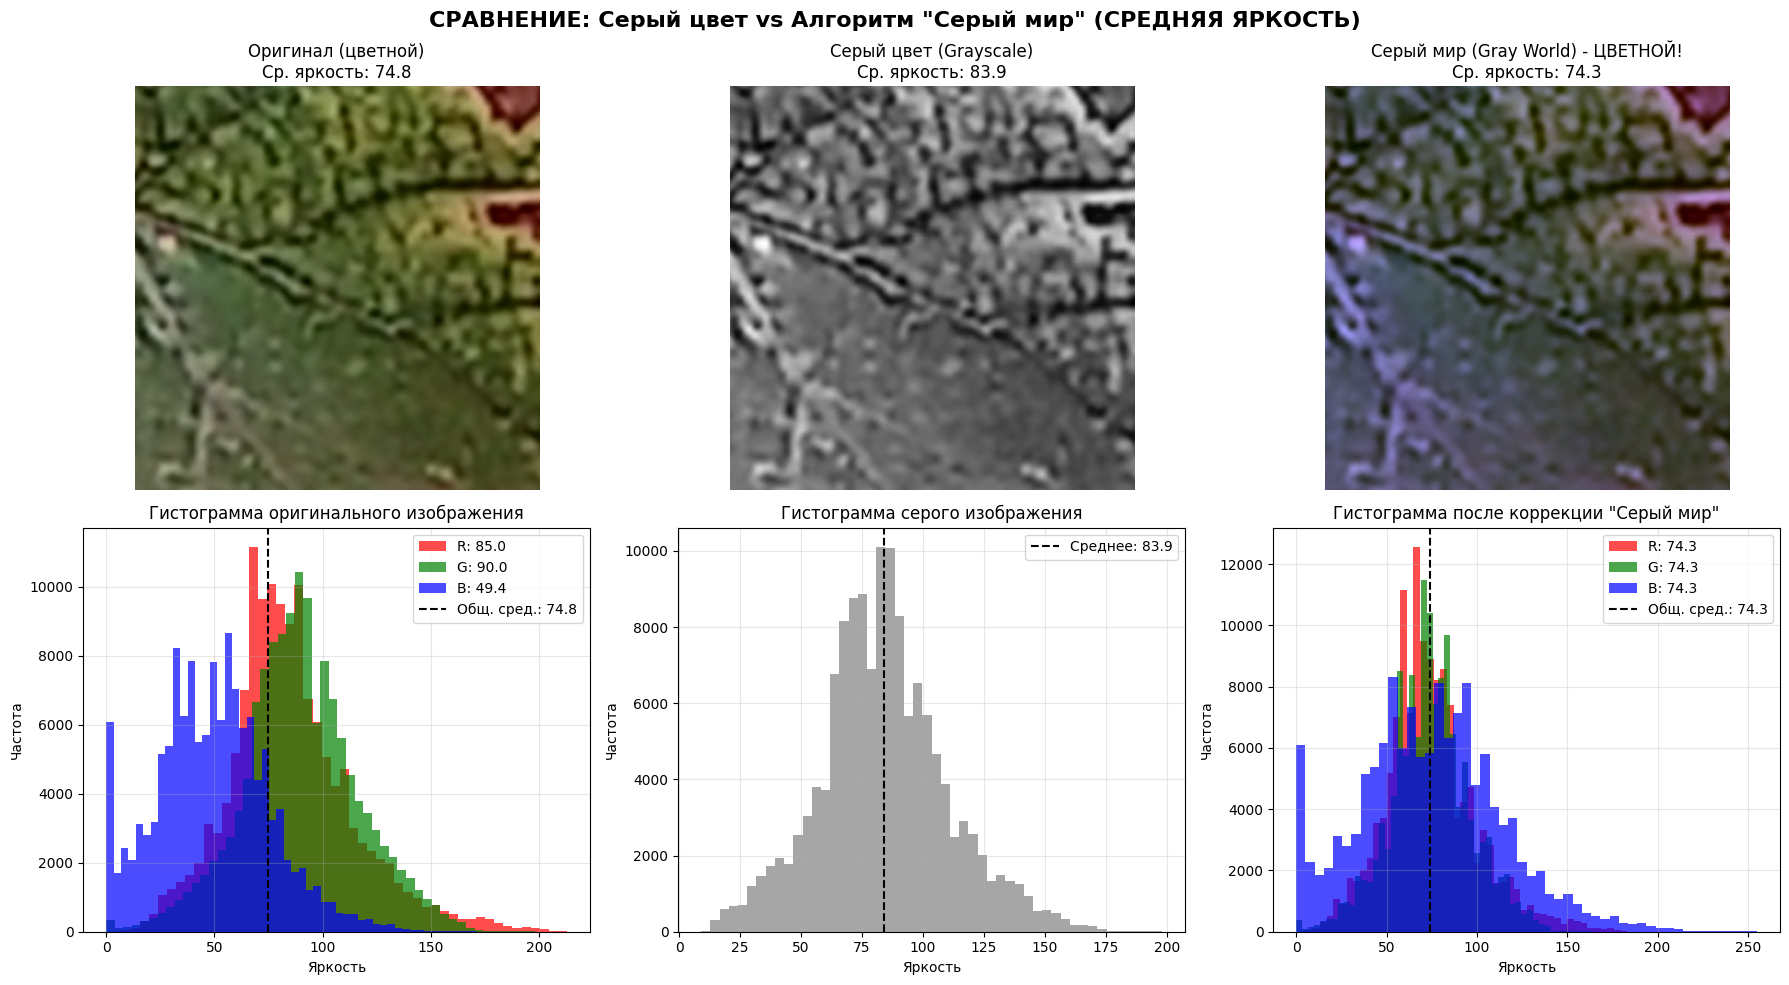

 СТАТИСТИКА СРЕДНЕЙ ЯРКОСТИ:
   Оригинал (цветной): 74.8
   Серый цвет: 83.9
   Серый мир (цветной): 74.3

  КОЭФФИЦИЕНТЫ КОРРЕКЦИИ:
   Красный канал (R): 0.880
   Зеленый канал (G): 0.832
   Синий канал (B): 1.513

 АНАЛИЗ ЦВЕТОВОГО БАЛАНСА:
   ОРИГИНАЛ:
     R/G: 0.945, R/B: 1.720, G/B: 1.820
   СЕРЫЙ МИР:
     R/G: 1.000, R/B: 1.000, G/B: 1.000
    Была применена значительная цветовая коррекция

1️  Анализирую папку с ПЛОХИМ виноградом...
 Анализирую 379 изображений...
    Обработано 10/379
    Обработано 20/379
    Обработано 30/379
    Обработано 40/379
    Обработано 50/379
    Обработано 60/379
    Обработано 70/379
    Обработано 80/379
    Обработано 90/379
    Обработано 100/379
    Обработано 110/379
    Обработано 120/379
    Обработано 130/379
    Обработано 140/379
    Обработано 150/379
    Обработано 160/379
    Обработано 170/379
    Обработано 180/379
    Обработано 190/379
    Обработано 200/379
    Обработано 210/379
    Обработано 220/379
    Обработано 230/379
   

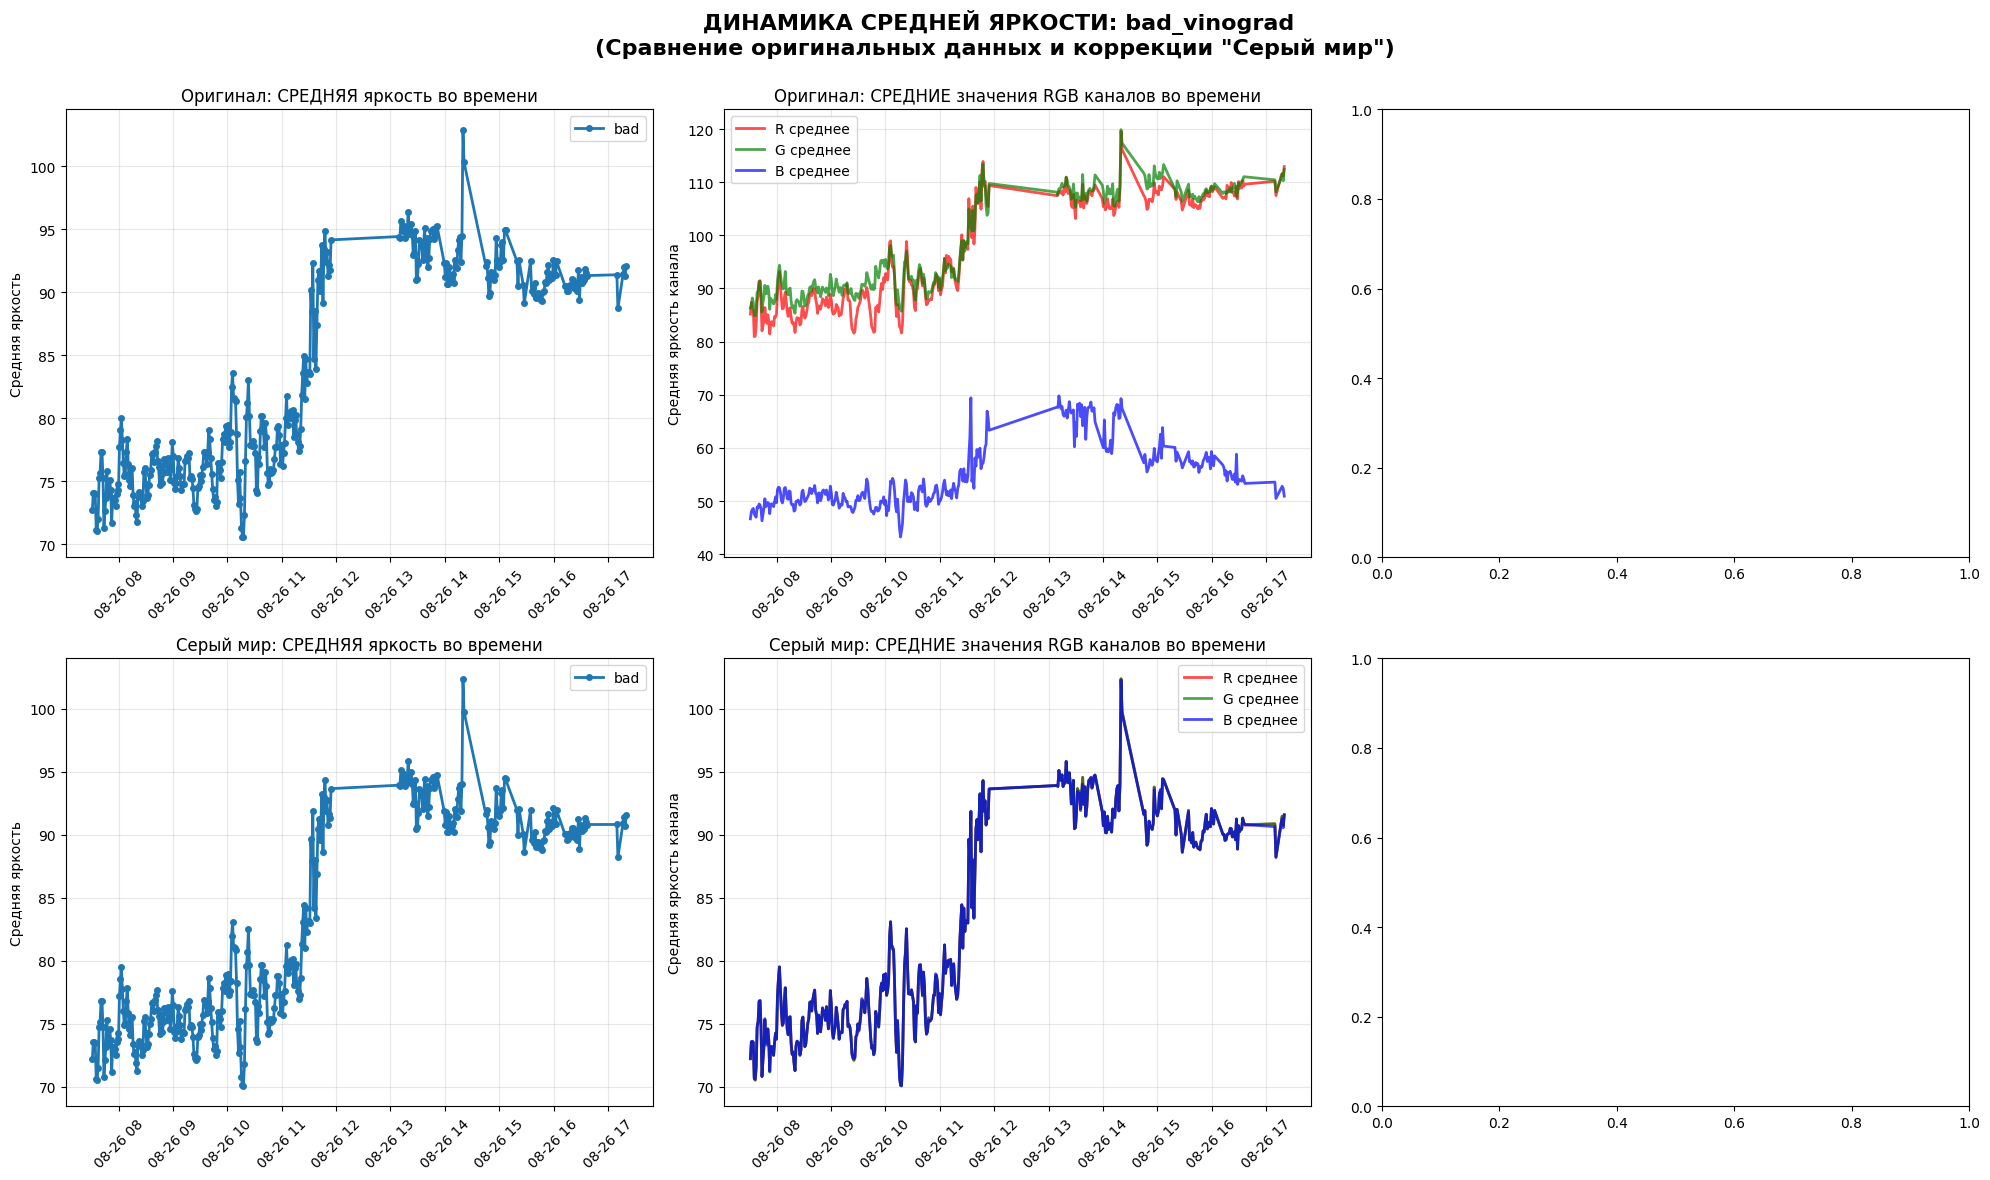

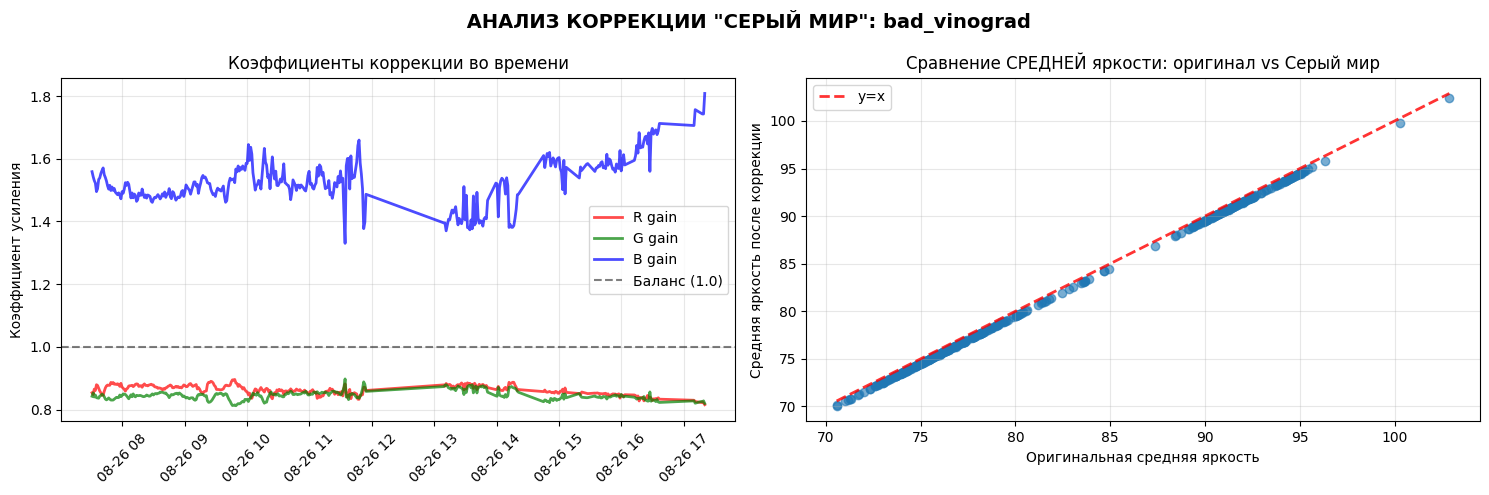


2️  Анализирую папку с ХОРОШИМ виноградом...
 Анализирую 279 изображений...
    Обработано 10/279
    Обработано 20/279
    Обработано 30/279
    Обработано 40/279
    Обработано 50/279
    Обработано 60/279
    Обработано 70/279
    Обработано 80/279
    Обработано 90/279
    Обработано 100/279
    Обработано 110/279
    Обработано 120/279
    Обработано 130/279
    Обработано 140/279
    Обработано 150/279
    Обработано 160/279
    Обработано 170/279
    Обработано 180/279
    Обработано 190/279
    Обработано 200/279
    Обработано 210/279
    Обработано 220/279
    Обработано 230/279
    Обработано 240/279
    Обработано 250/279
    Обработано 260/279
    Обработано 270/279

 ДЕТАЛЬНАЯ СТАТИСТИКА (СРЕДНЯЯ ЯРКОСТЬ): good_vinograd
 Временной диапазон: 2025-08-26 09:01:21 - 2025-08-26 17:32:49
  Продолжительность: 0 дней
 Количество изображений: 279

 РАСПРЕДЕЛЕНИЕ ПО КАТЕГОРИЯМ:
   good: 279 изображений

 СТАТИСТИКА СРЕДНЕЙ ЯРКОСТИ (ОРИГИНАЛ):
    Общая средняя яркость: 142.00
    

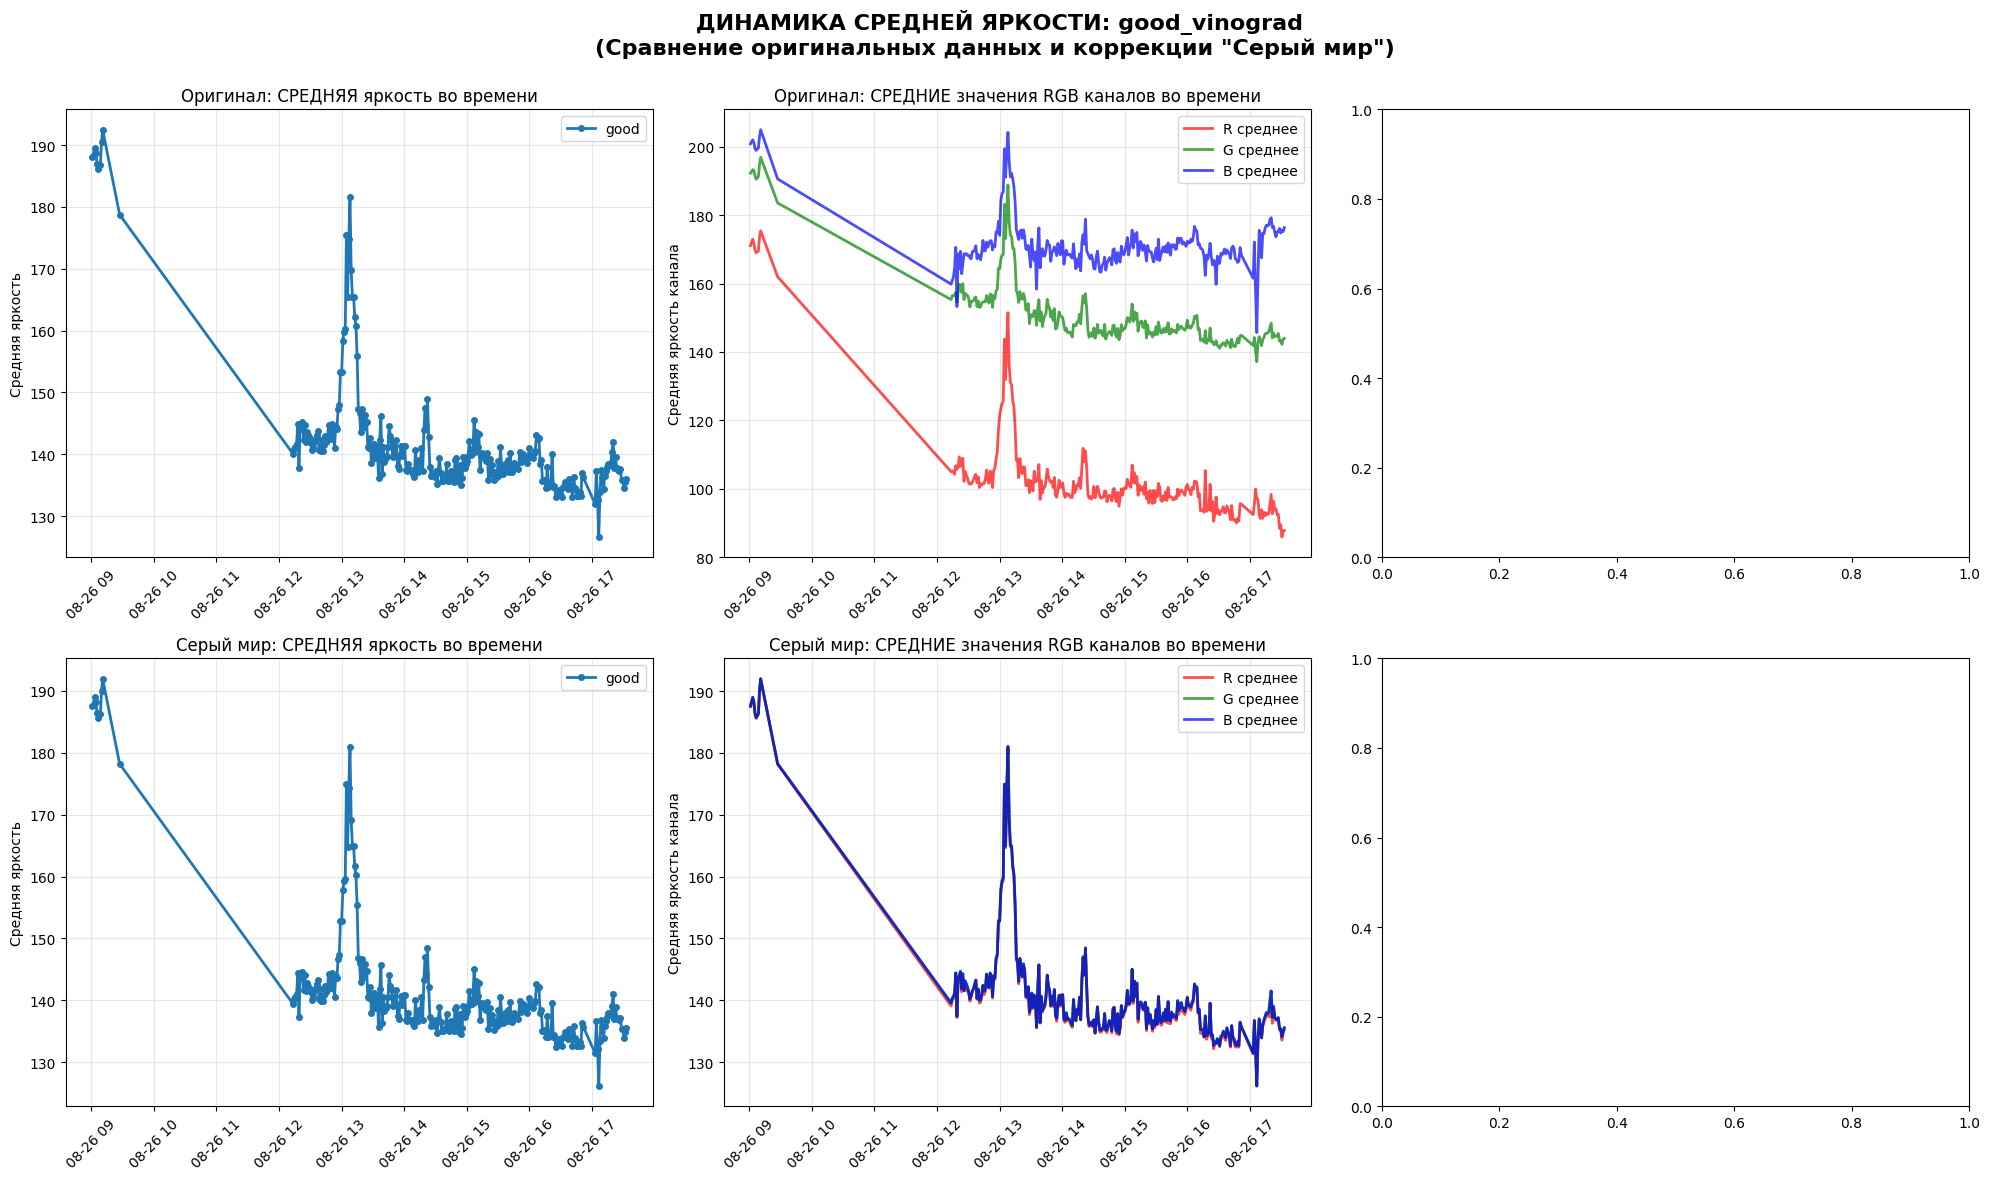

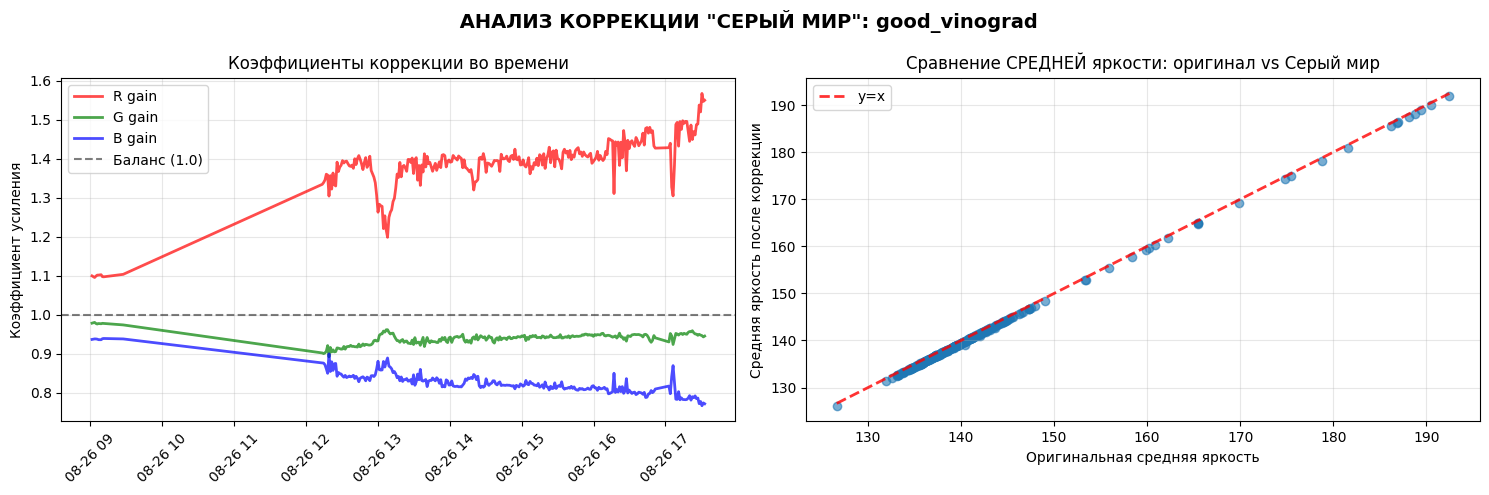


 СРАВНИТЕЛЬНЫЙ АНАЛИЗ (СРЕДНЯЯ ЯРКОСТЬ):
 Средняя яркость (оригинал):
   bad_vinograd: 83.02
   good_vinograd: 142.00
   Разница: 58.99

 Средняя яркость (Серый мир):
   bad_vinograd: 82.52
   good_vinograd: 141.41
   Разница: 58.89


In [ ]:
import cv2
import os
import numpy as np
import glob
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import re

# Подключаем Google Диск
drive.mount('/content/drive')

def gray_world_correction(image):
    """
    Применяет алгоритм коррекции 'Серый мир' к изображению
    """
    # Конвертируем в float для точных вычислений
    img_float = image.astype(np.float32)

    # Вычисляем средние значения по каналам
    r_mean = np.mean(img_float[:, :, 0])
    g_mean = np.mean(img_float[:, :, 1])
    b_mean = np.mean(img_float[:, :, 2])

    # Вычисляем среднее значение по всем каналам
    avg_mean = (r_mean + g_mean + b_mean) / 3.0

    # Вычисляем коэффициенты коррекции
    r_gain = avg_mean / r_mean if r_mean > 0 else 1.0
    g_gain = avg_mean / g_mean if g_mean > 0 else 1.0
    b_gain = avg_mean / b_mean if b_mean > 0 else 1.0

    # Применяем коррекцию к каждому каналу
    img_corrected = img_float.copy()
    img_corrected[:, :, 0] = img_corrected[:, :, 0] * r_gain
    img_corrected[:, :, 1] = img_corrected[:, :, 1] * g_gain
    img_corrected[:, :, 2] = img_corrected[:, :, 2] * b_gain

    # Ограничиваем значения до [0, 255] и конвертируем обратно в uint8
    img_corrected = np.clip(img_corrected, 0, 255).astype(np.uint8)

    return img_corrected, (r_gain, g_gain, b_gain)

def demonstrate_gray_world(image_path):
    """
    Наглядно демонстрирует разницу между серым цветом и алгоритмом серый мир
    с акцентом на СРЕДНЮЮ яркость
    """
    img = cv2.imread(image_path)
    if img is None:
        print(f" Не удалось загрузить изображение: {image_path}")
        return

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Вычисляем среднюю яркость оригинального изображения
    orig_brightness = np.mean(img_rgb)
    r_mean_orig = np.mean(img_rgb[:, :, 0])
    g_mean_orig = np.mean(img_rgb[:, :, 1])
    b_mean_orig = np.mean(img_rgb[:, :, 2])

    # Серый цвет (grayscale) - вычисляем среднюю яркость
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_brightness = np.mean(img_gray)

    # Серый мир (color correction) - вычисляем среднюю яркость после коррекции
    img_gray_world, gains = gray_world_correction(img_rgb)
    gw_brightness = np.mean(img_gray_world)
    r_mean_gw = np.mean(img_gray_world[:, :, 0])
    g_mean_gw = np.mean(img_gray_world[:, :, 1])
    b_mean_gw = np.mean(img_gray_world[:, :, 2])

    # Визуализация
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('СРАВНЕНИЕ: Серый цвет vs Алгоритм "Серый мир" (СРЕДНЯЯ ЯРКОСТЬ)',
                 fontsize=16, fontweight='bold')

    # Оригинал
    axes[0, 0].imshow(img_rgb)
    axes[0, 0].set_title(f'Оригинал (цветной)\nСр. яркость: {orig_brightness:.1f}')
    axes[0, 0].axis('off')

    # Гистограмма оригинального изображения
    axes[1, 0].hist(img_rgb[:, :, 0].flatten(), bins=50, alpha=0.7, color='red', label=f'R: {r_mean_orig:.1f}')
    axes[1, 0].hist(img_rgb[:, :, 1].flatten(), bins=50, alpha=0.7, color='green', label=f'G: {g_mean_orig:.1f}')
    axes[1, 0].hist(img_rgb[:, :, 2].flatten(), bins=50, alpha=0.7, color='blue', label=f'B: {b_mean_orig:.1f}')
    axes[1, 0].axvline(orig_brightness, color='black', linestyle='--', label=f'Общ. сред.: {orig_brightness:.1f}')
    axes[1, 0].set_xlabel('Яркость')
    axes[1, 0].set_ylabel('Частота')
    axes[1, 0].legend()
    axes[1, 0].set_title('Гистограмма оригинального изображения')
    axes[1, 0].grid(True, alpha=0.3)

    # Серый цвет
    axes[0, 1].imshow(img_gray, cmap='gray')
    axes[0, 1].set_title(f'Серый цвет (Grayscale)\nСр. яркость: {gray_brightness:.1f}')
    axes[0, 1].axis('off')

    # Гистограмма серого изображения
    axes[1, 1].hist(img_gray.flatten(), bins=50, alpha=0.7, color='gray')
    axes[1, 1].axvline(gray_brightness, color='black', linestyle='--', label=f'Среднее: {gray_brightness:.1f}')
    axes[1, 1].set_xlabel('Яркость')
    axes[1, 1].set_ylabel('Частота')
    axes[1, 1].legend()
    axes[1, 1].set_title('Гистограмма серого изображения')
    axes[1, 1].grid(True, alpha=0.3)

    # Серый мир
    axes[0, 2].imshow(img_gray_world)
    axes[0, 2].set_title(f'Серый мир (Gray World) - ЦВЕТНОЙ!\nСр. яркость: {gw_brightness:.1f}')
    axes[0, 2].axis('off')

    # Гистограмма после коррекции "Серый мир"
    axes[1, 2].hist(img_gray_world[:, :, 0].flatten(), bins=50, alpha=0.7, color='red', label=f'R: {r_mean_gw:.1f}')
    axes[1, 2].hist(img_gray_world[:, :, 1].flatten(), bins=50, alpha=0.7, color='green', label=f'G: {g_mean_gw:.1f}')
    axes[1, 2].hist(img_gray_world[:, :, 2].flatten(), bins=50, alpha=0.7, color='blue', label=f'B: {b_mean_gw:.1f}')
    axes[1, 2].axvline(gw_brightness, color='black', linestyle='--', label=f'Общ. сред.: {gw_brightness:.1f}')
    axes[1, 2].set_xlabel('Яркость')
    axes[1, 2].set_ylabel('Частота')
    axes[1, 2].legend()
    axes[1, 2].set_title('Гистограмма после коррекции "Серый мир"')
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(" СТАТИСТИКА СРЕДНЕЙ ЯРКОСТИ:")
    print(f"   Оригинал (цветной): {orig_brightness:.1f}")
    print(f"   Серый цвет: {gray_brightness:.1f}")
    print(f"   Серый мир (цветной): {gw_brightness:.1f}")

    print("\n  КОЭФФИЦИЕНТЫ КОРРЕКЦИИ:")
    print(f"   Красный канал (R): {gains[0]:.3f}")
    print(f"   Зеленый канал (G): {gains[1]:.3f}")
    print(f"   Синий канал (B): {gains[2]:.3f}")

    # Анализ баланса
    print("\n АНАЛИЗ ЦВЕТОВОГО БАЛАНСА:")
    print("   ОРИГИНАЛ:")
    print(f"     R/G: {r_mean_orig/g_mean_orig:.3f}, R/B: {r_mean_orig/b_mean_orig:.3f}, G/B: {g_mean_orig/b_mean_orig:.3f}")
    print("   СЕРЫЙ МИР:")
    print(f"     R/G: {r_mean_gw/g_mean_gw:.3f}, R/B: {r_mean_gw/b_mean_gw:.3f}, G/B: {g_mean_gw/b_mean_gw:.3f}")

    if abs(gains[0]-1) < 0.1 and abs(gains[1]-1) < 0.1 and abs(gains[2]-1) < 0.1:
        print("    Изображение уже хорошо сбалансировано")
    else:
        print("    Была применена значительная цветовая коррекция")

def extract_timestamp_from_filename(filename):
    """
    Извлекает временную метку из имени файла в формате: 2025_08_26_184958_00_bad
    """
    try:
        # Используем регулярное выражение для поиска паттерна
        pattern = r'(\d{4})_(\d{2})_(\d{2})_(\d{6})'
        match = re.search(pattern, filename)

        if match:
            year, month, day, time_str = match.groups()

            # Извлекаем компоненты времени
            hour = time_str[:2]
            minute = time_str[2:4]
            second = time_str[4:6]

            # Создаем datetime объект
            dt_str = f"{year}-{month}-{day} {hour}:{minute}:{second}"
            dt = datetime.strptime(dt_str, "%Y-%m-%d %H:%M:%S")
            return dt

    except Exception as e:
        print(f" Ошибка при извлечении времени из {filename}: {e}")

    # Если не удалось извлечь, используем время изменения файла
    try:
        return datetime.fromtimestamp(os.path.getmtime(filename))
    except:
        return datetime.now()

def analyze_image_with_timestamp(image_path):
    """
    Анализирует изображение и возвращает данные с временной меткой
    """
    img = cv2.imread(image_path)
    if img is None:
        return None

    filename = os.path.basename(image_path)

    # Извлекаем временную метку
    timestamp = extract_timestamp_from_filename(filename)

    # Конвертируем в RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Применяем коррекцию "Серый мир"
    img_gray_world, correction_gains = gray_world_correction(img_rgb)

    # Вычисляем СРЕДНЮЮ яркость оригинального изображения
    r_mean_orig = np.mean(img_rgb[:, :, 0])
    g_mean_orig = np.mean(img_rgb[:, :, 1])
    b_mean_orig = np.mean(img_rgb[:, :, 2])
    overall_mean_orig = (r_mean_orig + g_mean_orig + b_mean_orig) / 3

    # Вычисляем СРЕДНЮЮ яркость после коррекции "Серый мир"
    r_mean_gw = np.mean(img_gray_world[:, :, 0])
    g_mean_gw = np.mean(img_gray_world[:, :, 1])
    b_mean_gw = np.mean(img_gray_world[:, :, 2])
    overall_mean_gw = (r_mean_gw + g_mean_gw + b_mean_gw) / 3

    # СРЕДНЯЯ яркость в grayscale (оригинал и после коррекции)
    img_gray_orig = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray_gw = cv2.cvtColor(img_gray_world, cv2.COLOR_RGB2GRAY)

    gray_mean_orig = np.mean(img_gray_orig)
    gray_mean_gw = np.mean(img_gray_gw)

    # Контрастность (стандартное отклонение)
    contrast_orig = np.std(img_gray_orig)
    contrast_gw = np.std(img_gray_gw)

    # Извлекаем категорию из имени файла
    category = "unknown"
    if 'bad' in filename.lower():
        category = "bad"
    elif 'good' in filename.lower():
        category = "good"

    return {
        'filename': filename,
        'timestamp': timestamp,
        'category': category,

        # Оригинальные значения (СРЕДНЯЯ яркость)
        'brightness_r_orig': r_mean_orig,
        'brightness_g_orig': g_mean_orig,
        'brightness_b_orig': b_mean_orig,
        'brightness_overall_orig': overall_mean_orig,
        'brightness_gray_orig': gray_mean_orig,
        'contrast_orig': contrast_orig,

        # Значения после коррекции "Серый мир" (СРЕДНЯЯ яркость)
        'brightness_r_gw': r_mean_gw,
        'brightness_g_gw': g_mean_gw,
        'brightness_b_gw': b_mean_gw,
        'brightness_overall_gw': overall_mean_gw,
        'brightness_gray_gw': gray_mean_gw,
        'contrast_gw': contrast_gw,

        # Коэффициенты коррекции
        'correction_gain_r': correction_gains[0],
        'correction_gain_g': correction_gains[1],
        'correction_gain_b': correction_gains[2],

        # Метаданные
        'width': img.shape[1],
        'height': img.shape[0],
        'file_size': os.path.getsize(image_path)
    }

def analyze_folder_with_timeline(folder_path):
    """
    Анализирует все изображения в папке с временными метками
    """
    extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']
    images = []
    for ext in extensions:
        images.extend(glob.glob(os.path.join(folder_path, ext)))
        images.extend(glob.glob(os.path.join(folder_path, ext.upper())))

    if not images:
        print(f" В папке {folder_path} нет изображений")
        return None

    print(f" Анализирую {len(images)} изображений...")

    all_data = []
    for i, image_path in enumerate(images, 1):
        data = analyze_image_with_timestamp(image_path)
        if data:
            all_data.append(data)

        if i % 10 == 0:
            print(f"    Обработано {i}/{len(images)}")

    # Сортируем по времени
    all_data.sort(key=lambda x: x['timestamp'])

    # Создаем DataFrame для анализа
    df = pd.DataFrame(all_data)

    # Добавляем дополнительные метрики времени
    if len(df) > 0:
        df['time_delta'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds() / 3600  # часы
        df['date'] = df['timestamp'].dt.date
        df['hour'] = df['timestamp'].dt.hour
        df['minute'] = df['timestamp'].dt.minute
        df['time_of_day'] = df['timestamp'].dt.strftime('%H:%M')

    return df

def plot_timeline_analysis(df, folder_name):
    """
    Строит графики временного анализа для оригинальных и скорректированных данных
    с акцентом на СРЕДНЮЮ яркость
    """
    if df is None or len(df) == 0:
        return

    # Создаем большую фигуру с двумя рядами графиков
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle(f' ДИНАМИКА СРЕДНЕЙ ЯРКОСТИ: {folder_name}\n(Сравнение оригинальных данных и коррекции "Серый мир")\n',
                 fontsize=16, fontweight='bold')

    # РЯД 1: Оригинальные данные (СРЕДНЯЯ яркость)
    # График 1: СРЕДНЯЯ яркость во времени (оригинал)
    ax1 = axes[0, 0]
    for category in df['category'].unique():
        category_data = df[df['category'] == category]
        ax1.plot(category_data['timestamp'], category_data['brightness_overall_orig'],
                'o-', label=category, markersize=4, linewidth=2)
    ax1.set_title('Оригинал: СРЕДНЯЯ яркость во времени')
    ax1.set_ylabel('Средняя яркость')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

    # График 2: RGB каналы во времени (оригинал) - СРЕДНИЕ значения
    ax2 = axes[0, 1]
    ax2.plot(df['timestamp'], df['brightness_r_orig'], 'r-', label='R среднее', alpha=0.7, linewidth=2)
    ax2.plot(df['timestamp'], df['brightness_g_orig'], 'g-', label='G среднее', alpha=0.7, linewidth=2)
    ax2.plot(df['timestamp'], df['brightness_b_orig'], 'b-', label='B среднее', alpha=0.7, linewidth=2)
    ax2.set_title('Оригинал: СРЕДНИЕ значения RGB каналов во времени')
    ax2.set_ylabel('Средняя яркость канала')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

    # График 3: Распределение СРЕДНЕЙ яркости по категориям (оригинал)
    ax3 = axes[0, 2]
    if 'category' in df.columns and len(df['category'].unique()) > 1:
        sns.violinplot(x='category', y='brightness_overall_orig', data=df, ax=ax3)
        ax3.set_title('Оригинал: Распределение СРЕДНЕЙ яркости по категориям')
        ax3.set_xlabel('Категория')
        ax3.set_ylabel('Средняя яркость')

    # РЯД 2: Данные после коррекции "Серый мир" (СРЕДНЯЯ яркость)
    # График 4: СРЕДНЯЯ яркость во времени (Серый мир)
    ax4 = axes[1, 0]
    for category in df['category'].unique():
        category_data = df[df['category'] == category]
        ax4.plot(category_data['timestamp'], category_data['brightness_overall_gw'],
                'o-', label=category, markersize=4, linewidth=2)
    ax4.set_title('Серый мир: СРЕДНЯЯ яркость во времени')
    ax4.set_ylabel('Средняя яркость')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

    # График 5: RGB каналы во времени (Серый мир) - СРЕДНИЕ значения
    ax5 = axes[1, 1]
    ax5.plot(df['timestamp'], df['brightness_r_gw'], 'r-', label='R среднее', alpha=0.7, linewidth=2)
    ax5.plot(df['timestamp'], df['brightness_g_gw'], 'g-', label='G среднее', alpha=0.7, linewidth=2)
    ax5.plot(df['timestamp'], df['brightness_b_gw'], 'b-', label='B среднее', alpha=0.7, linewidth=2)
    ax5.set_title('Серый мир: СРЕДНИЕ значения RGB каналов во времени')
    ax5.set_ylabel('Средняя яркость канала')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    plt.setp(ax5.xaxis.get_majorticklabels(), rotation=45)

    # График 6: Распределение СРЕДНЕЙ яркости по категориям (Серый мир)
    ax6 = axes[1, 2]
    if 'category' in df.columns and len(df['category'].unique()) > 1:
        sns.violinplot(x='category', y='brightness_overall_gw', data=df, ax=ax6)
        ax6.set_title('Серый мир: Распределение СРЕДНЕЙ яркости по категориям')
        ax6.set_xlabel('Категория')
        ax6.set_ylabel('Средняя яркость')

    plt.tight_layout()
    plt.show()

    # Дополнительные графики: сравнение коэффициентов коррекции
    fig2, axes2 = plt.subplots(1, 2, figsize=(15, 5))
    fig2.suptitle(f' АНАЛИЗ КОРРЕКЦИИ "СЕРЫЙ МИР": {folder_name}', fontsize=14, fontweight='bold')

    # График коэффициентов коррекции во времени
    ax7 = axes2[0]
    ax7.plot(df['timestamp'], df['correction_gain_r'], 'r-', label='R gain', alpha=0.7, linewidth=2)
    ax7.plot(df['timestamp'], df['correction_gain_g'], 'g-', label='G gain', alpha=0.7, linewidth=2)
    ax7.plot(df['timestamp'], df['correction_gain_b'], 'b-', label='B gain', alpha=0.7, linewidth=2)
    ax7.axhline(y=1.0, color='k', linestyle='--', alpha=0.5, label='Баланс (1.0)')
    ax7.set_title('Коэффициенты коррекции во времени')
    ax7.set_ylabel('Коэффициент усиления')
    ax7.legend()
    ax7.grid(True, alpha=0.3)
    plt.setp(ax7.xaxis.get_majorticklabels(), rotation=45)

    # График сравнения СРЕДНЕЙ яркости до и после коррекции
    ax8 = axes2[1]
    ax8.scatter(df['brightness_overall_orig'], df['brightness_overall_gw'], alpha=0.6)
    ax8.plot([df['brightness_overall_orig'].min(), df['brightness_overall_orig'].max()],
             [df['brightness_overall_orig'].min(), df['brightness_overall_orig'].max()],
             'r--', alpha=0.8, linewidth=2, label='y=x')
    ax8.set_title('Сравнение СРЕДНЕЙ яркости: оригинал vs Серый мир')
    ax8.set_xlabel('Оригинальная средняя яркость')
    ax8.set_ylabel('Средняя яркость после коррекции')
    ax8.legend()
    ax8.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def print_detailed_statistics(df, folder_name):
    """
    Выводит детальную статистику для оригинальных и скорректированных данных
    с акцентом на СРЕДНЮЮ яркость
    """
    if df is None or len(df) == 0:
        return

    print(f"\n ДЕТАЛЬНАЯ СТАТИСТИКА (СРЕДНЯЯ ЯРКОСТЬ): {folder_name}")
    print("=" * 80)
    print(f" Временной диапазон: {df['timestamp'].min()} - {df['timestamp'].max()}")
    print(f"  Продолжительность: {(df['timestamp'].max() - df['timestamp'].min()).days} дней")
    print(f" Количество изображений: {len(df)}")

    # Статистика по категориям
    if 'category' in df.columns:
        print(f"\n РАСПРЕДЕЛЕНИЕ ПО КАТЕГОРИЯМ:")
        category_counts = df['category'].value_counts()
        for cat, count in category_counts.items():
            print(f"   {cat}: {count} изображений")

    print(f"\n СТАТИСТИКА СРЕДНЕЙ ЯРКОСТИ (ОРИГИНАЛ):")
    print(f"    Общая средняя яркость: {df['brightness_overall_orig'].mean():.2f}")
    print(f"    Стандартное отклонение: {df['brightness_overall_orig'].std():.2f}")
    print(f"    Средний R: {df['brightness_r_orig'].mean():.2f}")
    print(f"    Средний G: {df['brightness_g_orig'].mean():.2f}")
    print(f"    Средний B: {df['brightness_b_orig'].mean():.2f}")

    print(f"\n СТАТИСТИКА СРЕДНЕЙ ЯРКОСТИ (СЕРЫЙ МИР):")
    print(f"    Общая средняя яркость: {df['brightness_overall_gw'].mean():.2f}")
    print(f"    Стандартное отклонение: {df['brightness_overall_gw'].std():.2f}")
    print(f"    Средний R: {df['brightness_r_gw'].mean():.2f}")
    print(f"    Средний G: {df['brightness_g_gw'].mean():.2f}")
    print(f"    Средний B: {df['brightness_b_gw'].mean():.2f}")

    print(f"\n СТАТИСТИКА КОРРЕКЦИИ:")
    print(f"   Средний коэффициент R: {df['correction_gain_r'].mean():.3f}")
    print(f"   Средний коэффициент G: {df['correction_gain_g'].mean():.3f}")
    print(f"   Средний коэффициент B: {df['correction_gain_b'].mean():.3f}")

    # Анализ трендов СРЕДНЕЙ яркости
    if len(df) > 1:
        time_corr_orig = df['brightness_overall_orig'].corr(df['time_delta'])
        time_corr_gw = df['brightness_overall_gw'].corr(df['time_delta'])

        trend_orig = " Возрастает" if time_corr_orig > 0.1 else " Убывает" if time_corr_orig < -0.1 else " Стабильна"
        trend_gw = " Возрастает" if time_corr_gw > 0.1 else " Убывает" if time_corr_gw < -0.1 else " Стабильна"

        print(f"\n ТРЕНД СРЕДНЕЙ ЯРКОСТИ:")
        print(f"   Оригинал: {trend_orig} (корреляция: {time_corr_orig:.3f})")
        print(f"   Серый мир: {trend_gw} (корреляция: {time_corr_gw:.3f})")

#  ОСНОВНОЙ СКРИПТ

def main():
    # Ваши папки
    FOLDER1 = "/content/drive/MyDrive/bad_vinograd_new"
    FOLDER2 = "/content/drive/MyDrive/good_vinograd_new"

    print(" АНАЛИЗ ДИНАМИКИ СРЕДНЕЙ ЯРКОСТИ С КОРРЕКЦИЕЙ 'СЕРЫЙ МИР'")
    print("=" * 80)

    # Демонстрация на примере одного изображения
    print("\n🧪 ДЕМОНСТРАЦИЯ РАЗЛИЧИЙ:")
    print("=" * 50)

    # Найдем первое изображение для демонстрации
    test_image = None
    for folder in [FOLDER1, FOLDER2]:
        if os.path.exists(folder):
            images = glob.glob(os.path.join(folder, "*.jpg")) + glob.glob(os.path.join(folder, "*.png"))
            if images:
                test_image = images[0]
                break

    if test_image:
        demonstrate_gray_world(test_image)
    else:
        print(" Не найдено изображений для демонстрации")

    # Анализируем обе папки
    print("\n1️  Анализирую папку с ПЛОХИМ виноградом...")
    df1 = analyze_folder_with_timeline(FOLDER1)
    if df1 is not None and len(df1) > 0:
        print_detailed_statistics(df1, "bad_vinograd")
        plot_timeline_analysis(df1, "bad_vinograd")

    print("\n2️  Анализирую папку с ХОРОШИМ виноградом...")
    df2 = analyze_folder_with_timeline(FOLDER2)
    if df2 is not None and len(df2) > 0:
        print_detailed_statistics(df2, "good_vinograd")
        plot_timeline_analysis(df2, "good_vinograd")

    # Сравнительный анализ
    if df1 is not None and df2 is not None:
        print("\n" + "="*80)
        print(" СРАВНИТЕЛЬНЫЙ АНАЛИЗ (СРЕДНЯЯ ЯРКОСТЬ):")
        print("="*80)

        print(f" Средняя яркость (оригинал):")
        print(f"   bad_vinograd: {df1['brightness_overall_orig'].mean():.2f}")
        print(f"   good_vinograd: {df2['brightness_overall_orig'].mean():.2f}")
        print(f"   Разница: {abs(df1['brightness_overall_orig'].mean() - df2['brightness_overall_orig'].mean()):.2f}")

        print(f"\n Средняя яркость (Серый мир):")
        print(f"   bad_vinograd: {df1['brightness_overall_gw'].mean():.2f}")
        print(f"   good_vinograd: {df2['brightness_overall_gw'].mean():.2f}")
        print(f"   Разница: {abs(df1['brightness_overall_gw'].mean() - df2['brightness_overall_gw'].mean()):.2f}")

# Запускаем
if __name__ == "__main__":
    main()

Mounted at /content/drive
 АНАЛИЗ ДИНАМИКИ СРЕДНЕЙ ЯРКОСТИ С КОРРЕКЦИЕЙ 'СЕРЫЙ МИР' И СКОЛЬЗЯЩИМ СРЕДНИМ

🧪 ДЕМОНСТРАЦИЯ РАЗЛИЧИЙ:


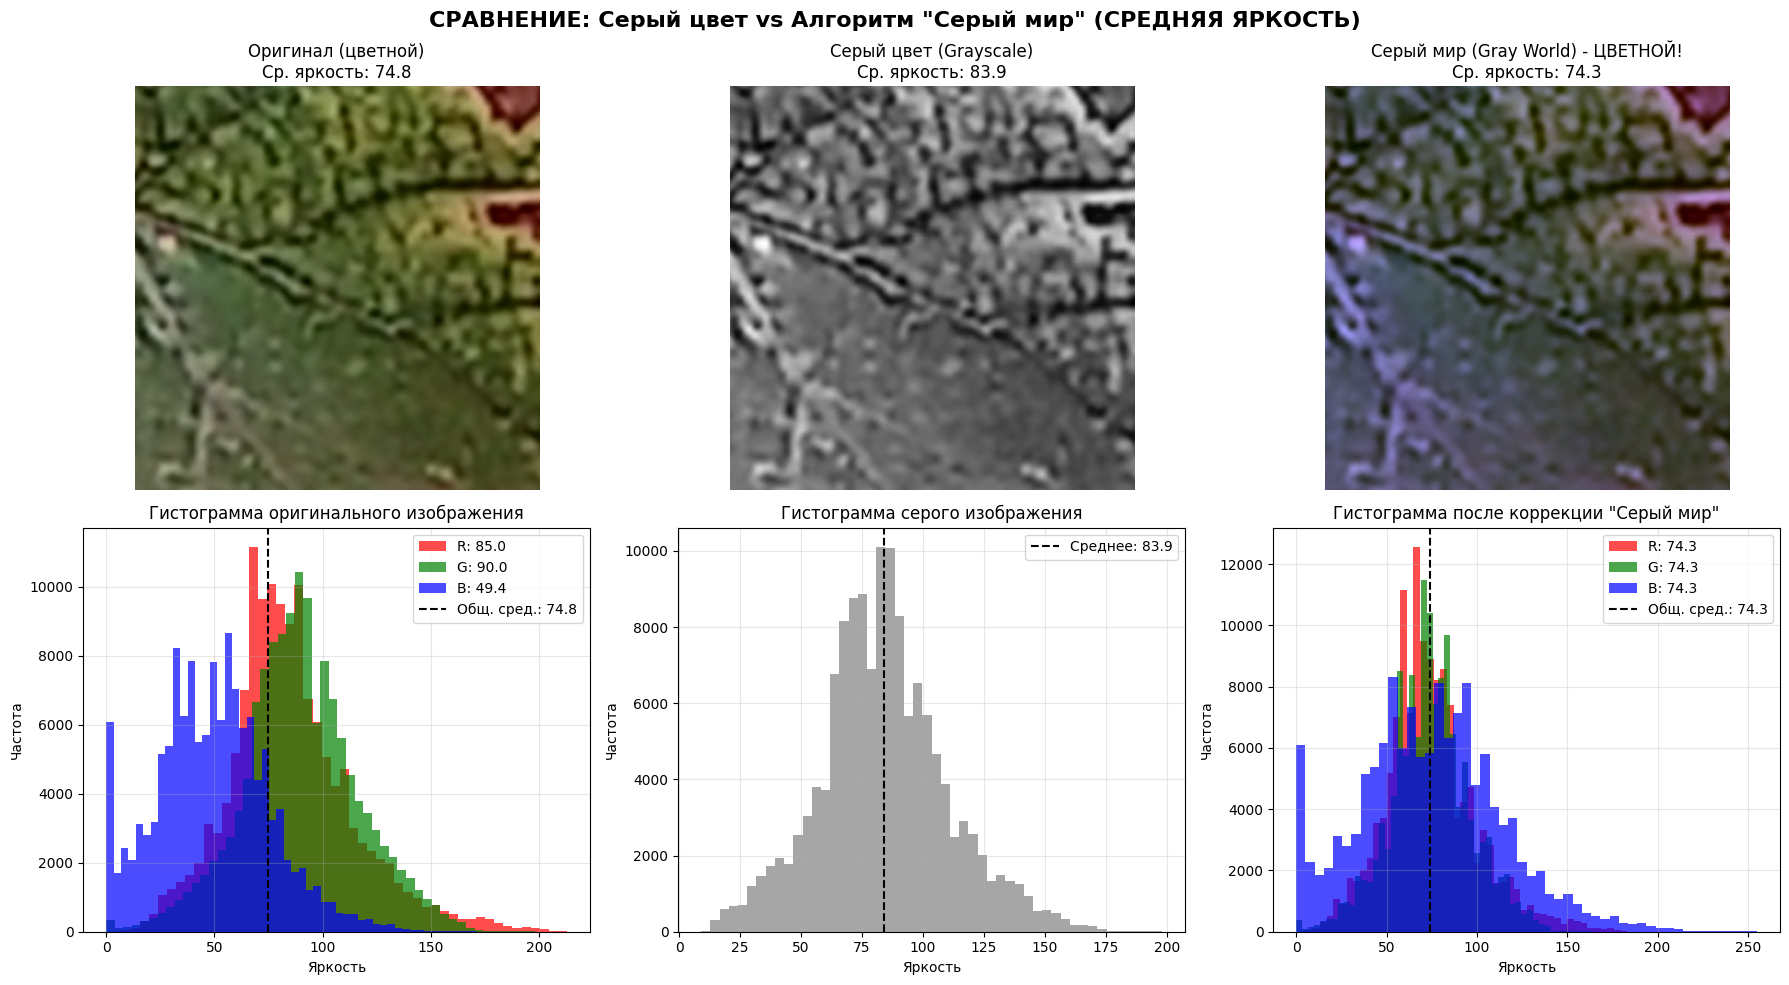

 СТАТИСТИКА СРЕДНЕЙ ЯРКОСТИ:
   Оригинал (цветной): 74.8
   Серый цвет: 83.9
   Серый мир (цветной): 74.3

  КОЭФФИЦИЕНТЫ КОРРЕКЦИИ:
   Красный канал (R): 0.880
   Зеленый канал (G): 0.832
   Синий канал (B): 1.513

 АНАЛИЗ ЦВЕТОВОГО БАЛАНСА:
   ОРИГИНАЛ:
     R/G: 0.945, R/B: 1.720, G/B: 1.820
   СЕРЫЙ МИР:
     R/G: 1.000, R/B: 1.000, G/B: 1.000
    Была применена значительная цветовая коррекция

1️  Анализирую папку с ПЛОХИМ виноградом...
 Анализирую 379 изображений...
    Обработано 10/379
    Обработано 20/379
    Обработано 30/379
    Обработано 40/379
    Обработано 50/379
    Обработано 60/379
    Обработано 70/379
    Обработано 80/379
    Обработано 90/379
    Обработано 100/379
    Обработано 110/379
    Обработано 120/379
    Обработано 130/379
    Обработано 140/379
    Обработано 150/379
    Обработано 160/379
    Обработано 170/379
    Обработано 180/379
    Обработано 190/379
    Обработано 200/379
    Обработано 210/379
    Обработано 220/379
    Обработано 230/379
   

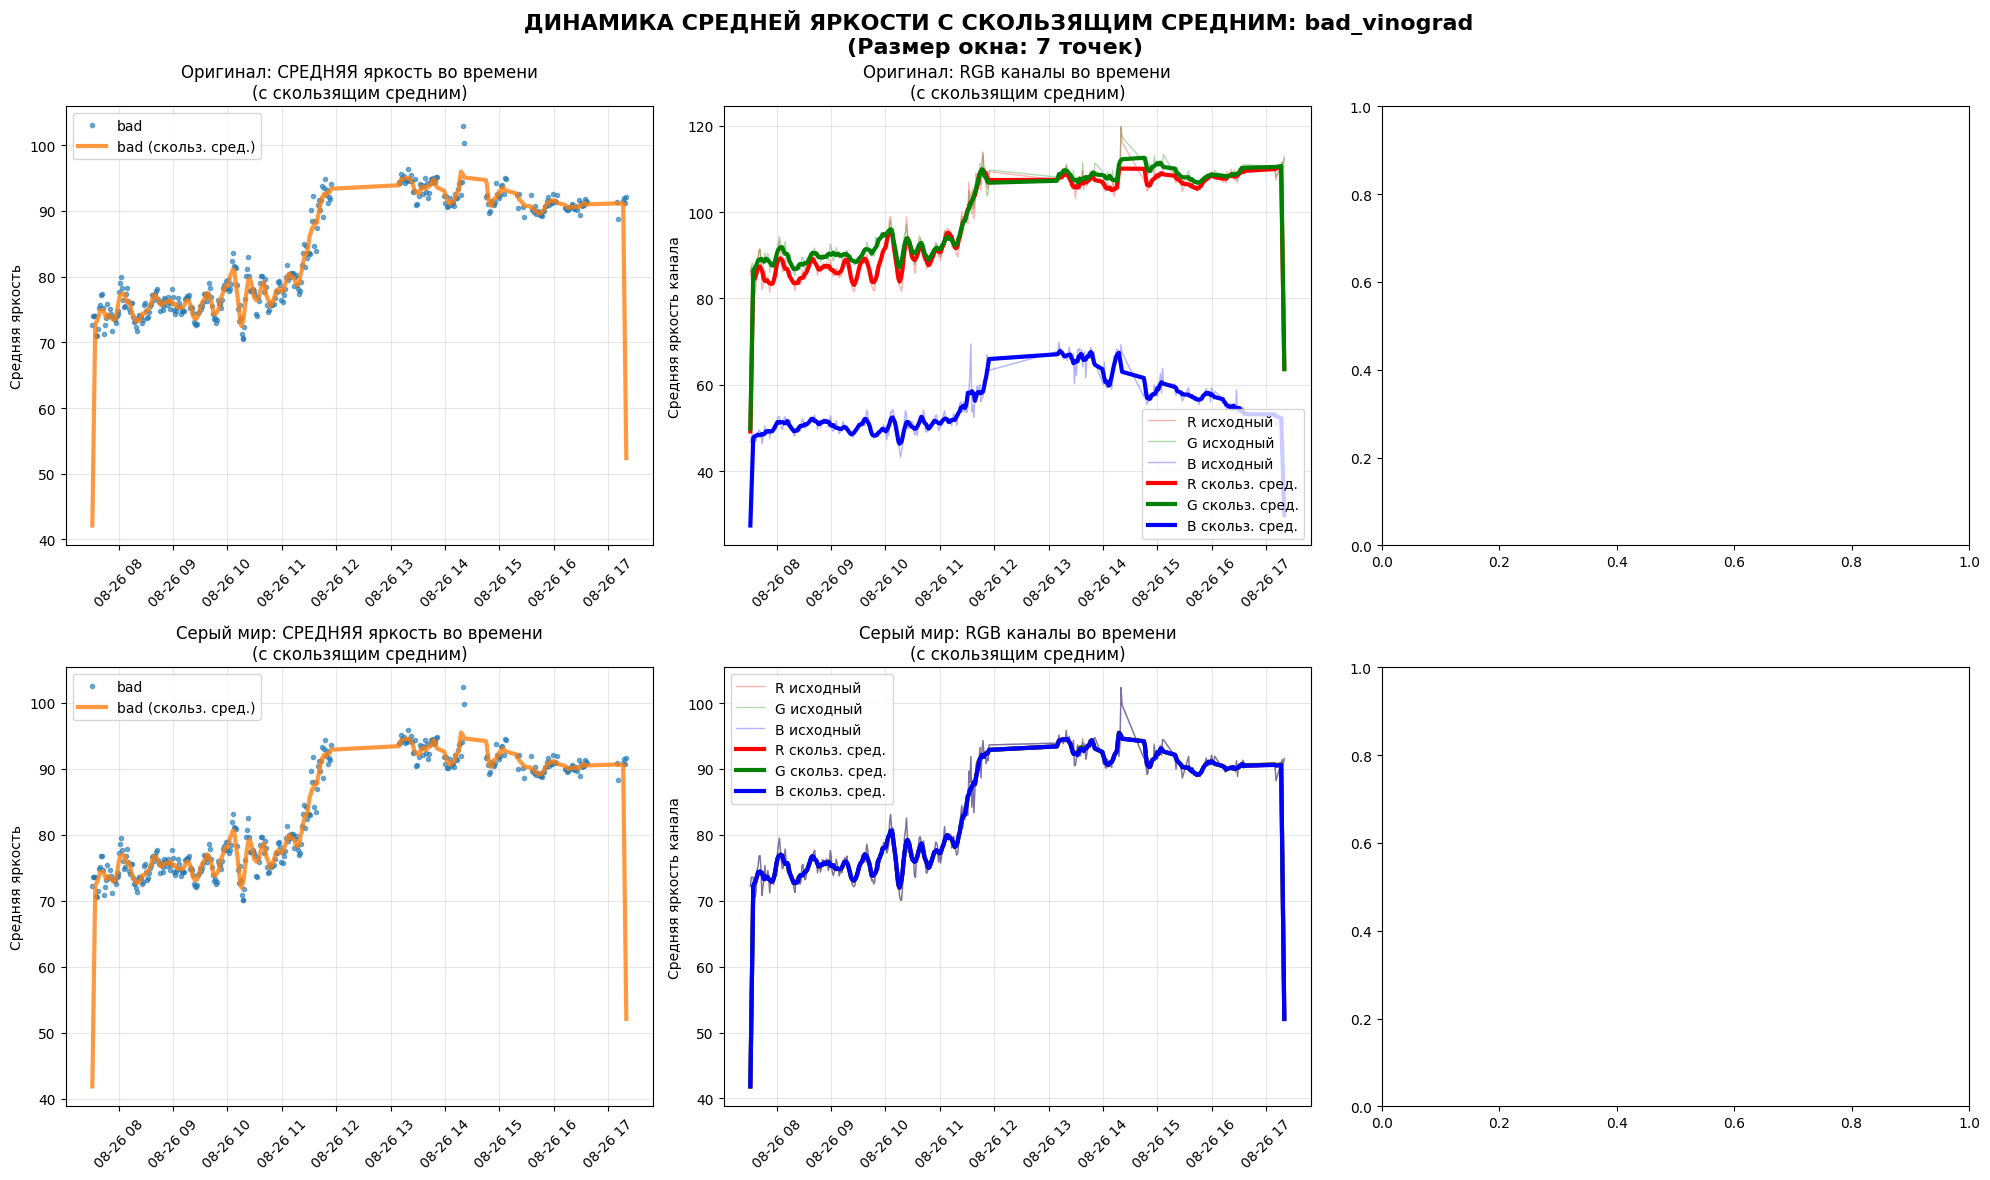

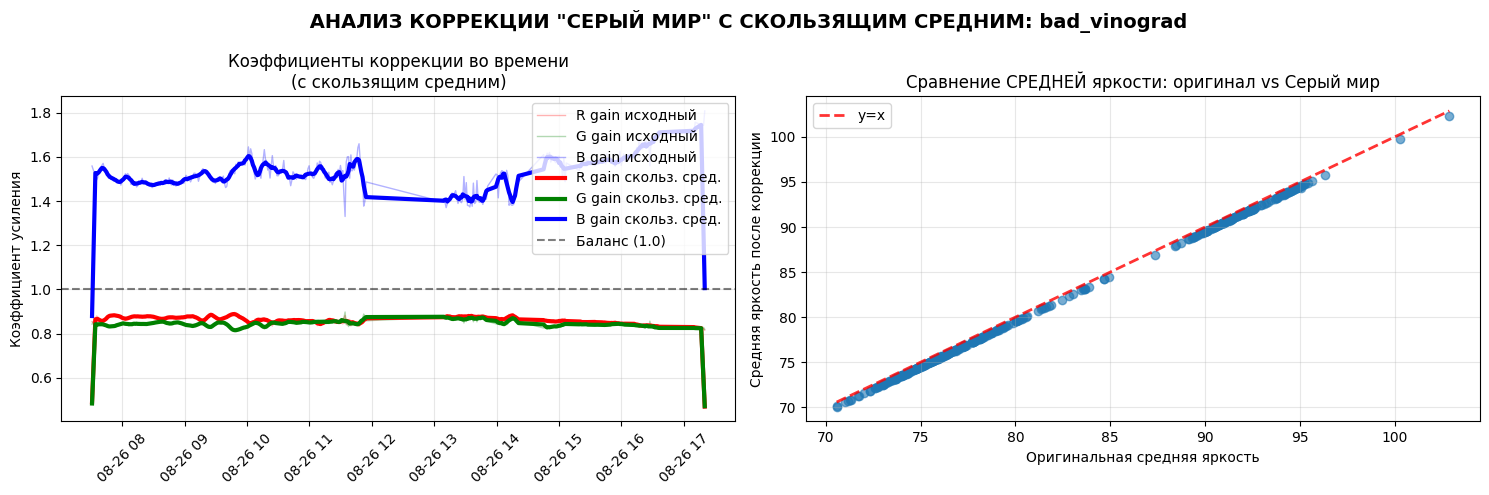


2️  Анализирую папку с ХОРОШИМ виноградом...
 Анализирую 279 изображений...
    Обработано 10/279
    Обработано 20/279
    Обработано 30/279
    Обработано 40/279
    Обработано 50/279
    Обработано 60/279
    Обработано 70/279
    Обработано 80/279
    Обработано 90/279
    Обработано 100/279
    Обработано 110/279
    Обработано 120/279
    Обработано 130/279
    Обработано 140/279
    Обработано 150/279
    Обработано 160/279
    Обработано 170/279
    Обработано 180/279
    Обработано 190/279
    Обработано 200/279
    Обработано 210/279
    Обработано 220/279
    Обработано 230/279
    Обработано 240/279
    Обработано 250/279
    Обработано 260/279
    Обработано 270/279

 ДЕТАЛЬНАЯ СТАТИСТИКА (СРЕДНЯЯ ЯРКОСТЬ): good_vinograd
 Временной диапазон: 2025-08-26 09:01:21 - 2025-08-26 17:32:49
  Продолжительность: 0 дней
 Количество изображений: 279

 РАСПРЕДЕЛЕНИЕ ПО КАТЕГОРИЯМ:
   good: 279 изображений

 СТАТИСТИКА СРЕДНЕЙ ЯРКОСТИ (ОРИГИНАЛ):
    Общая средняя яркость: 142.00
    

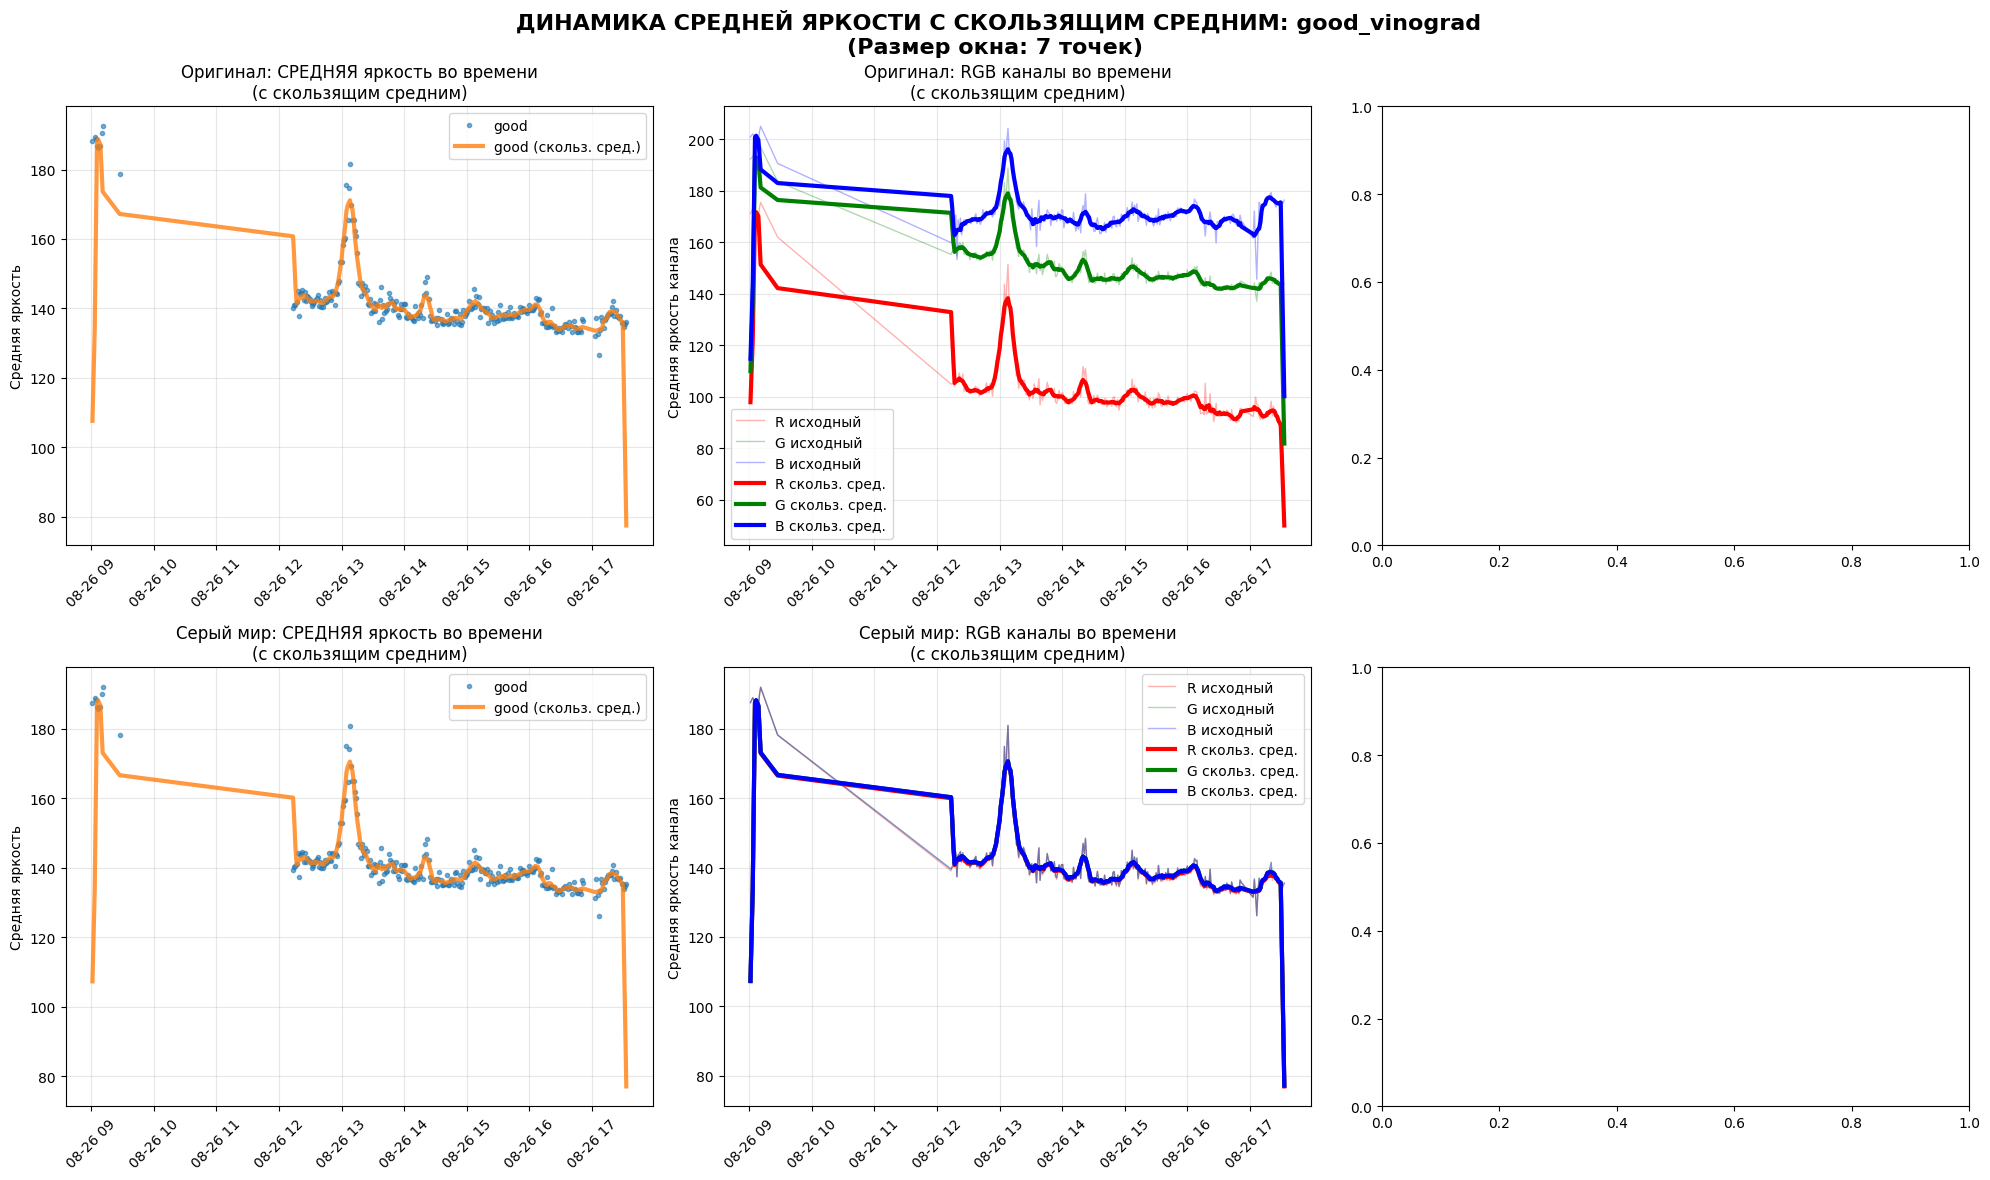

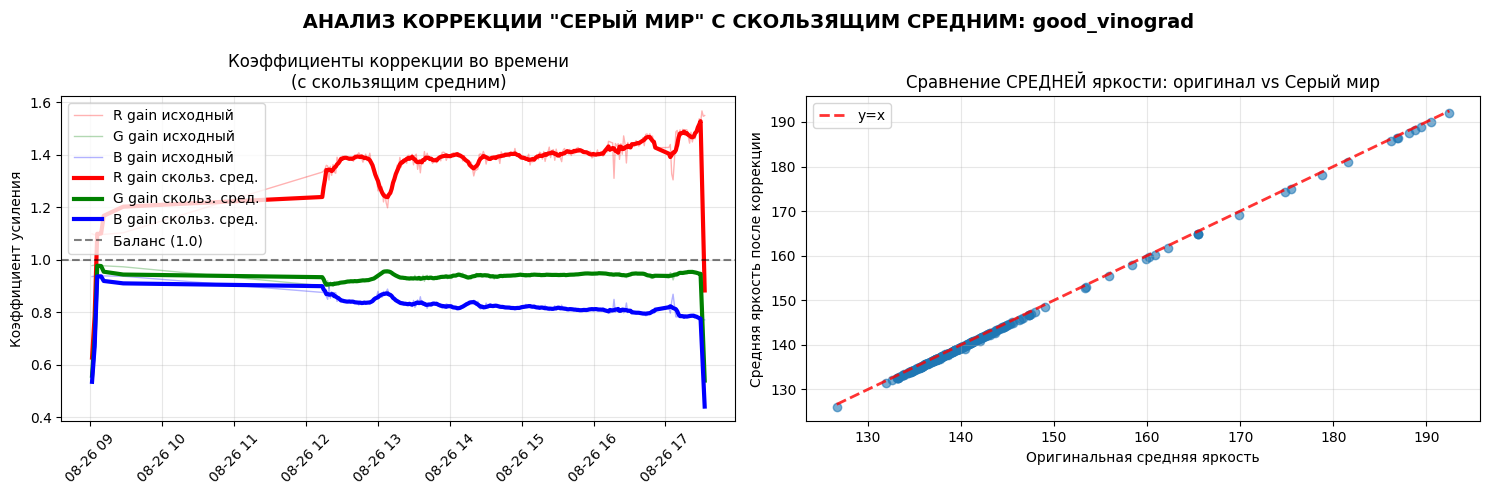


 СРАВНИТЕЛЬНЫЙ АНАЛИЗ (СРЕДНЯЯ ЯРКОСТЬ):
 Средняя яркость (оригинал):
   bad_vinograd: 83.02
   good_vinograd: 142.00
   Разница: 58.99

 Средняя яркость (Серый мир):
   bad_vinograd: 82.52
   good_vinograd: 141.41
   Разница: 58.89


In [ ]:
import cv2
import os
import numpy as np
import glob
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import re

# Подключаем Google Диск
drive.mount('/content/drive')

def gray_world_correction(image):
    """
    Применяет алгоритм коррекции 'Серый мир' к изображению
    """
    # Конвертируем в float для точных вычислений
    img_float = image.astype(np.float32)

    # Вычисляем средние значения по каналам
    r_mean = np.mean(img_float[:, :, 0])
    g_mean = np.mean(img_float[:, :, 1])
    b_mean = np.mean(img_float[:, :, 2])

    # Вычисляем среднее значение по всем каналам
    avg_mean = (r_mean + g_mean + b_mean) / 3.0

    # Вычисляем коэффициенты коррекции
    r_gain = avg_mean / r_mean if r_mean > 0 else 1.0
    g_gain = avg_mean / g_mean if g_mean > 0 else 1.0
    b_gain = avg_mean / b_mean if b_mean > 0 else 1.0

    # Применяем коррекцию к каждому каналу
    img_corrected = img_float.copy()
    img_corrected[:, :, 0] = img_corrected[:, :, 0] * r_gain
    img_corrected[:, :, 1] = img_corrected[:, :, 1] * g_gain
    img_corrected[:, :, 2] = img_corrected[:, :, 2] * b_gain

    # Ограничиваем значения до [0, 255] и конвертируем обратно в uint8
    img_corrected = np.clip(img_corrected, 0, 255).astype(np.uint8)

    return img_corrected, (r_gain, g_gain, b_gain)

def calculate_moving_average(data, window_size=5):
    """
    Вычисляет скользящее среднее для данных
    """
    if len(data) < window_size:
        return data
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def demonstrate_gray_world(image_path):
    """
    Наглядно демонстрирует разницу между серым цветом и алгоритмом серый мир
    с акцентом на СРЕДНЮЮ яркость
    """
    img = cv2.imread(image_path)
    if img is None:
        print(f" Не удалось загрузить изображение: {image_path}")
        return

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Вычисляем среднюю яркость оригинального изображения
    orig_brightness = np.mean(img_rgb)
    r_mean_orig = np.mean(img_rgb[:, :, 0])
    g_mean_orig = np.mean(img_rgb[:, :, 1])
    b_mean_orig = np.mean(img_rgb[:, :, 2])

    # Серый цвет (grayscale) - вычисляем среднюю яркость
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_brightness = np.mean(img_gray)

    # Серый мир (color correction) - вычисляем среднюю яркость после коррекции
    img_gray_world, gains = gray_world_correction(img_rgb)
    gw_brightness = np.mean(img_gray_world)
    r_mean_gw = np.mean(img_gray_world[:, :, 0])
    g_mean_gw = np.mean(img_gray_world[:, :, 1])
    b_mean_gw = np.mean(img_gray_world[:, :, 2])

    # Визуализация
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('СРАВНЕНИЕ: Серый цвет vs Алгоритм "Серый мир" (СРЕДНЯЯ ЯРКОСТЬ)',
                 fontsize=16, fontweight='bold')

    # Оригинал
    axes[0, 0].imshow(img_rgb)
    axes[0, 0].set_title(f'Оригинал (цветной)\nСр. яркость: {orig_brightness:.1f}')
    axes[0, 0].axis('off')

    # Гистограмма оригинального изображения
    axes[1, 0].hist(img_rgb[:, :, 0].flatten(), bins=50, alpha=0.7, color='red', label=f'R: {r_mean_orig:.1f}')
    axes[1, 0].hist(img_rgb[:, :, 1].flatten(), bins=50, alpha=0.7, color='green', label=f'G: {g_mean_orig:.1f}')
    axes[1, 0].hist(img_rgb[:, :, 2].flatten(), bins=50, alpha=0.7, color='blue', label=f'B: {b_mean_orig:.1f}')
    axes[1, 0].axvline(orig_brightness, color='black', linestyle='--', label=f'Общ. сред.: {orig_brightness:.1f}')
    axes[1, 0].set_xlabel('Яркость')
    axes[1, 0].set_ylabel('Частота')
    axes[1, 0].legend()
    axes[1, 0].set_title('Гистограмма оригинального изображения')
    axes[1, 0].grid(True, alpha=0.3)

    # Серый цвет
    axes[0, 1].imshow(img_gray, cmap='gray')
    axes[0, 1].set_title(f'Серый цвет (Grayscale)\nСр. яркость: {gray_brightness:.1f}')
    axes[0, 1].axis('off')

    # Гистограмма серого изображения
    axes[1, 1].hist(img_gray.flatten(), bins=50, alpha=0.7, color='gray')
    axes[1, 1].axvline(gray_brightness, color='black', linestyle='--', label=f'Среднее: {gray_brightness:.1f}')
    axes[1, 1].set_xlabel('Яркость')
    axes[1, 1].set_ylabel('Частота')
    axes[1, 1].legend()
    axes[1, 1].set_title('Гистограмма серого изображения')
    axes[1, 1].grid(True, alpha=0.3)

    # Серый мир
    axes[0, 2].imshow(img_gray_world)
    axes[0, 2].set_title(f'Серый мир (Gray World) - ЦВЕТНОЙ!\nСр. яркость: {gw_brightness:.1f}')
    axes[0, 2].axis('off')

    # Гистограмма после коррекции "Серый мир"
    axes[1, 2].hist(img_gray_world[:, :, 0].flatten(), bins=50, alpha=0.7, color='red', label=f'R: {r_mean_gw:.1f}')
    axes[1, 2].hist(img_gray_world[:, :, 1].flatten(), bins=50, alpha=0.7, color='green', label=f'G: {g_mean_gw:.1f}')
    axes[1, 2].hist(img_gray_world[:, :, 2].flatten(), bins=50, alpha=0.7, color='blue', label=f'B: {b_mean_gw:.1f}')
    axes[1, 2].axvline(gw_brightness, color='black', linestyle='--', label=f'Общ. сред.: {gw_brightness:.1f}')
    axes[1, 2].set_xlabel('Яркость')
    axes[1, 2].set_ylabel('Частота')
    axes[1, 2].legend()
    axes[1, 2].set_title('Гистограмма после коррекции "Серый мир"')
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(" СТАТИСТИКА СРЕДНЕЙ ЯРКОСТИ:")
    print(f"   Оригинал (цветной): {orig_brightness:.1f}")
    print(f"   Серый цвет: {gray_brightness:.1f}")
    print(f"   Серый мир (цветной): {gw_brightness:.1f}")

    print("\n  КОЭФФИЦИЕНТЫ КОРРЕКЦИИ:")
    print(f"   Красный канал (R): {gains[0]:.3f}")
    print(f"   Зеленый канал (G): {gains[1]:.3f}")
    print(f"   Синий канал (B): {gains[2]:.3f}")

    # Анализ баланса
    print("\n АНАЛИЗ ЦВЕТОВОГО БАЛАНСА:")
    print("   ОРИГИНАЛ:")
    print(f"     R/G: {r_mean_orig/g_mean_orig:.3f}, R/B: {r_mean_orig/b_mean_orig:.3f}, G/B: {g_mean_orig/b_mean_orig:.3f}")
    print("   СЕРЫЙ МИР:")
    print(f"     R/G: {r_mean_gw/g_mean_gw:.3f}, R/B: {r_mean_gw/b_mean_gw:.3f}, G/B: {g_mean_gw/b_mean_gw:.3f}")

    if abs(gains[0]-1) < 0.1 and abs(gains[1]-1) < 0.1 and abs(gains[2]-1) < 0.1:
        print("    Изображение уже хорошо сбалансировано")
    else:
        print("    Была применена значительная цветовая коррекция")

def extract_timestamp_from_filename(filename):
    """
    Извлекает временную метку из имени файла в формате: 2025_08_26_184958_00_bad
    """
    try:
        # Используем регулярное выражение для поиска паттерна
        pattern = r'(\d{4})_(\d{2})_(\d{2})_(\d{6})'
        match = re.search(pattern, filename)

        if match:
            year, month, day, time_str = match.groups()

            # Извлекаем компоненты времени
            hour = time_str[:2]
            minute = time_str[2:4]
            second = time_str[4:6]

            # Создаем datetime объект
            dt_str = f"{year}-{month}-{day} {hour}:{minute}:{second}"
            dt = datetime.strptime(dt_str, "%Y-%m-%d %H:%M:%S")
            return dt

    except Exception as e:
        print(f" Ошибка при извлечении времени из {filename}: {e}")

    # Если не удалось извлечь, используем время изменения файла
    try:
        return datetime.fromtimestamp(os.path.getmtime(filename))
    except:
        return datetime.now()

def analyze_image_with_timestamp(image_path):
    """
    Анализирует изображение и возвращает данные с временной меткой
    """
    img = cv2.imread(image_path)
    if img is None:
        return None

    filename = os.path.basename(image_path)

    # Извлекаем временную метку
    timestamp = extract_timestamp_from_filename(filename)

    # Конвертируем в RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Применяем коррекцию "Серый мир"
    img_gray_world, correction_gains = gray_world_correction(img_rgb)

    # Вычисляем СРЕДНЮЮ яркость оригинального изображения
    r_mean_orig = np.mean(img_rgb[:, :, 0])
    g_mean_orig = np.mean(img_rgb[:, :, 1])
    b_mean_orig = np.mean(img_rgb[:, :, 2])
    overall_mean_orig = (r_mean_orig + g_mean_orig + b_mean_orig) / 3

    # Вычисляем СРЕДНЮЮ яркость после коррекции "Серый мир"
    r_mean_gw = np.mean(img_gray_world[:, :, 0])
    g_mean_gw = np.mean(img_gray_world[:, :, 1])
    b_mean_gw = np.mean(img_gray_world[:, :, 2])
    overall_mean_gw = (r_mean_gw + g_mean_gw + b_mean_gw) / 3

    # СРЕДНЯЯ яркость в grayscale (оригинал и после коррекции)
    img_gray_orig = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray_gw = cv2.cvtColor(img_gray_world, cv2.COLOR_RGB2GRAY)

    gray_mean_orig = np.mean(img_gray_orig)
    gray_mean_gw = np.mean(img_gray_gw)

    # Контрастность (стандартное отклонение)
    contrast_orig = np.std(img_gray_orig)
    contrast_gw = np.std(img_gray_gw)

    # Извлекаем категорию из имени файла
    category = "unknown"
    if 'bad' in filename.lower():
        category = "bad"
    elif 'good' in filename.lower():
        category = "good"

    return {
        'filename': filename,
        'timestamp': timestamp,
        'category': category,

        # Оригинальные значения (СРЕДНЯЯ яркость)
        'brightness_r_orig': r_mean_orig,
        'brightness_g_orig': g_mean_orig,
        'brightness_b_orig': b_mean_orig,
        'brightness_overall_orig': overall_mean_orig,
        'brightness_gray_orig': gray_mean_orig,
        'contrast_orig': contrast_orig,

        # Значения после коррекции "Серый мир" (СРЕДНЯЯ яркость)
        'brightness_r_gw': r_mean_gw,
        'brightness_g_gw': g_mean_gw,
        'brightness_b_gw': b_mean_gw,
        'brightness_overall_gw': overall_mean_gw,
        'brightness_gray_gw': gray_mean_gw,
        'contrast_gw': contrast_gw,

        # Коэффициенты коррекции
        'correction_gain_r': correction_gains[0],
        'correction_gain_g': correction_gains[1],
        'correction_gain_b': correction_gains[2],

        # Метаданные
        'width': img.shape[1],
        'height': img.shape[0],
        'file_size': os.path.getsize(image_path)
    }

def analyze_folder_with_timeline(folder_path):
    """
    Анализирует все изображения в папке с временными метками
    """
    extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']
    images = []
    for ext in extensions:
        images.extend(glob.glob(os.path.join(folder_path, ext)))
        images.extend(glob.glob(os.path.join(folder_path, ext.upper())))

    if not images:
        print(f" В папке {folder_path} нет изображений")
        return None

    print(f" Анализирую {len(images)} изображений...")

    all_data = []
    for i, image_path in enumerate(images, 1):
        data = analyze_image_with_timestamp(image_path)
        if data:
            all_data.append(data)

        if i % 10 == 0:
            print(f"    Обработано {i}/{len(images)}")

    # Сортируем по времени
    all_data.sort(key=lambda x: x['timestamp'])

    # Создаем DataFrame для анализа
    df = pd.DataFrame(all_data)

    # Добавляем дополнительные метрики времени
    if len(df) > 0:
        df['time_delta'] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds() / 3600  # часы
        df['date'] = df['timestamp'].dt.date
        df['hour'] = df['timestamp'].dt.hour
        df['minute'] = df['timestamp'].dt.minute
        df['time_of_day'] = df['timestamp'].dt.strftime('%H:%M')

    return df

def plot_timeline_analysis_with_moving_average(df, folder_name):
    """
    Строит графики временного анализа с скользящим средним
    """
    if df is None or len(df) == 0:
        return

    # Вычисляем скользящее среднее для основных метрик
    window_size = min(7, len(df) // 3)  # Адаптивный размер окна

    # Функция для вычисления скользящего среднего с обработкой границ
    def safe_moving_average(data, window):
        if len(data) < window:
            return data
        return np.convolve(data, np.ones(window)/window, mode='same')

    # Вычисляем скользящие средние
    df_sorted = df.sort_values('timestamp')

    # Для оригинальных данных
    df_sorted['brightness_overall_orig_ma'] = safe_moving_average(df_sorted['brightness_overall_orig'].values, window_size)
    df_sorted['brightness_r_orig_ma'] = safe_moving_average(df_sorted['brightness_r_orig'].values, window_size)
    df_sorted['brightness_g_orig_ma'] = safe_moving_average(df_sorted['brightness_g_orig'].values, window_size)
    df_sorted['brightness_b_orig_ma'] = safe_moving_average(df_sorted['brightness_b_orig'].values, window_size)

    # Для данных после коррекции
    df_sorted['brightness_overall_gw_ma'] = safe_moving_average(df_sorted['brightness_overall_gw'].values, window_size)
    df_sorted['brightness_r_gw_ma'] = safe_moving_average(df_sorted['brightness_r_gw'].values, window_size)
    df_sorted['brightness_g_gw_ma'] = safe_moving_average(df_sorted['brightness_g_gw'].values, window_size)
    df_sorted['brightness_b_gw_ma'] = safe_moving_average(df_sorted['brightness_b_gw'].values, window_size)

    # Создаем большую фигуру с двумя рядами графиков
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle(f' ДИНАМИКА СРЕДНЕЙ ЯРКОСТИ С СКОЛЬЗЯЩИМ СРЕДНИМ: {folder_name}\n(Размер окна: {window_size} точек)',
                 fontsize=16, fontweight='bold')

    # РЯД 1: Оригинальные данные со скользящим средним
    # График 1: СРЕДНЯЯ яркость во времени (оригинал)
    ax1 = axes[0, 0]
    for category in df_sorted['category'].unique():
        category_data = df_sorted[df_sorted['category'] == category]
        # Точки данных
        ax1.plot(category_data['timestamp'], category_data['brightness_overall_orig'],
                'o', label=category, markersize=3, alpha=0.6)
        # Скользящее среднее
        ax1.plot(category_data['timestamp'], category_data['brightness_overall_orig_ma'],
                '-', linewidth=3, alpha=0.8, label=f'{category} (скольз. сред.)')

    ax1.set_title('Оригинал: СРЕДНЯЯ яркость во времени\n(с скользящим средним)')
    ax1.set_ylabel('Средняя яркость')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

    # График 2: RGB каналы во времени (оригинал) со скользящим средним
    ax2 = axes[0, 1]
    # Исходные данные (прозрачные)
    ax2.plot(df_sorted['timestamp'], df_sorted['brightness_r_orig'], 'r-', alpha=0.3, linewidth=1, label='R исходный')
    ax2.plot(df_sorted['timestamp'], df_sorted['brightness_g_orig'], 'g-', alpha=0.3, linewidth=1, label='G исходный')
    ax2.plot(df_sorted['timestamp'], df_sorted['brightness_b_orig'], 'b-', alpha=0.3, linewidth=1, label='B исходный')

    # Скользящее среднее (жирные линии)
    ax2.plot(df_sorted['timestamp'], df_sorted['brightness_r_orig_ma'], 'r-', linewidth=3, label='R скольз. сред.')
    ax2.plot(df_sorted['timestamp'], df_sorted['brightness_g_orig_ma'], 'g-', linewidth=3, label='G скольз. сред.')
    ax2.plot(df_sorted['timestamp'], df_sorted['brightness_b_orig_ma'], 'b-', linewidth=3, label='B скольз. сред.')

    ax2.set_title('Оригинал: RGB каналы во времени\n(с скользящим средним)')
    ax2.set_ylabel('Средняя яркость канала')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

    # График 3: Распределение СРЕДНЕЙ яркости по категориям (оригинал)
    ax3 = axes[0, 2]
    if 'category' in df_sorted.columns and len(df_sorted['category'].unique()) > 1:
        sns.violinplot(x='category', y='brightness_overall_orig', data=df_sorted, ax=ax3)
        ax3.set_title('Оригинал: Распределение СРЕДНЕЙ яркости по категориям')
        ax3.set_xlabel('Категория')
        ax3.set_ylabel('Средняя яркость')

    # РЯД 2: Данные после коррекции "Серый мир" со скользящим средним
    # График 4: СРЕДНЯЯ яркость во времени (Серый мир)
    ax4 = axes[1, 0]
    for category in df_sorted['category'].unique():
        category_data = df_sorted[df_sorted['category'] == category]
        # Точки данных
        ax4.plot(category_data['timestamp'], category_data['brightness_overall_gw'],
                'o', label=category, markersize=3, alpha=0.6)
        # Скользящее среднее
        ax4.plot(category_data['timestamp'], category_data['brightness_overall_gw_ma'],
                '-', linewidth=3, alpha=0.8, label=f'{category} (скольз. сред.)')

    ax4.set_title('Серый мир: СРЕДНЯЯ яркость во времени\n(с скользящим средним)')
    ax4.set_ylabel('Средняя яркость')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

    # График 5: RGB каналы во времени (Серый мир) со скользящим средним
    ax5 = axes[1, 1]
    # Исходные данные (прозрачные)
    ax5.plot(df_sorted['timestamp'], df_sorted['brightness_r_gw'], 'r-', alpha=0.3, linewidth=1, label='R исходный')
    ax5.plot(df_sorted['timestamp'], df_sorted['brightness_g_gw'], 'g-', alpha=0.3, linewidth=1, label='G исходный')
    ax5.plot(df_sorted['timestamp'], df_sorted['brightness_b_gw'], 'b-', alpha=0.3, linewidth=1, label='B исходный')

    # Скользящее среднее (жирные линии)
    ax5.plot(df_sorted['timestamp'], df_sorted['brightness_r_gw_ma'], 'r-', linewidth=3, label='R скольз. сред.')
    ax5.plot(df_sorted['timestamp'], df_sorted['brightness_g_gw_ma'], 'g-', linewidth=3, label='G скольз. сред.')
    ax5.plot(df_sorted['timestamp'], df_sorted['brightness_b_gw_ma'], 'b-', linewidth=3, label='B скольз. сред.')

    ax5.set_title('Серый мир: RGB каналы во времени\n(с скользящим средним)')
    ax5.set_ylabel('Средняя яркость канала')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    plt.setp(ax5.xaxis.get_majorticklabels(), rotation=45)

    # График 6: Распределение СРЕДНЕЙ яркости по категориям (Серый мир)
    ax6 = axes[1, 2]
    if 'category' in df_sorted.columns and len(df_sorted['category'].unique()) > 1:
        sns.violinplot(x='category', y='brightness_overall_gw', data=df_sorted, ax=ax6)
        ax6.set_title('Серый мир: Распределение СРЕДНЕЙ яркости по категориям')
        ax6.set_xlabel('Категория')
        ax6.set_ylabel('Средняя яркость')

    plt.tight_layout()
    plt.show()

    # Дополнительные графики: сравнение коэффициентов коррекции со скользящим средним
    fig2, axes2 = plt.subplots(1, 2, figsize=(15, 5))
    fig2.suptitle(f' АНАЛИЗ КОРРЕКЦИИ "СЕРЫЙ МИР" С СКОЛЬЗЯЩИМ СРЕДНИМ: {folder_name}', fontsize=14, fontweight='bold')

    # Вычисляем скользящее среднее для коэффициентов коррекции
    df_sorted['correction_gain_r_ma'] = safe_moving_average(df_sorted['correction_gain_r'].values, window_size)
    df_sorted['correction_gain_g_ma'] = safe_moving_average(df_sorted['correction_gain_g'].values, window_size)
    df_sorted['correction_gain_b_ma'] = safe_moving_average(df_sorted['correction_gain_b'].values, window_size)

    # График коэффициентов коррекции во времени со скользящим средним
    ax7 = axes2[0]
    # Исходные данные
    ax7.plot(df_sorted['timestamp'], df_sorted['correction_gain_r'], 'r-', alpha=0.3, linewidth=1, label='R gain исходный')
    ax7.plot(df_sorted['timestamp'], df_sorted['correction_gain_g'], 'g-', alpha=0.3, linewidth=1, label='G gain исходный')
    ax7.plot(df_sorted['timestamp'], df_sorted['correction_gain_b'], 'b-', alpha=0.3, linewidth=1, label='B gain исходный')

    # Скользящее среднее
    ax7.plot(df_sorted['timestamp'], df_sorted['correction_gain_r_ma'], 'r-', linewidth=3, label='R gain скольз. сред.')
    ax7.plot(df_sorted['timestamp'], df_sorted['correction_gain_g_ma'], 'g-', linewidth=3, label='G gain скольз. сред.')
    ax7.plot(df_sorted['timestamp'], df_sorted['correction_gain_b_ma'], 'b-', linewidth=3, label='B gain скольз. сред.')

    ax7.axhline(y=1.0, color='k', linestyle='--', alpha=0.5, label='Баланс (1.0)')
    ax7.set_title('Коэффициенты коррекции во времени\n(с скользящим средним)')
    ax7.set_ylabel('Коэффициент усиления')
    ax7.legend()
    ax7.grid(True, alpha=0.3)
    plt.setp(ax7.xaxis.get_majorticklabels(), rotation=45)

    # График сравнения СРЕДНЕЙ яркости до и после коррекции
    ax8 = axes2[1]
    ax8.scatter(df_sorted['brightness_overall_orig'], df_sorted['brightness_overall_gw'], alpha=0.6)
    ax8.plot([df_sorted['brightness_overall_orig'].min(), df_sorted['brightness_overall_orig'].max()],
             [df_sorted['brightness_overall_orig'].min(), df_sorted['brightness_overall_orig'].max()],
             'r--', alpha=0.8, linewidth=2, label='y=x')
    ax8.set_title('Сравнение СРЕДНЕЙ яркости: оригинал vs Серый мир')
    ax8.set_xlabel('Оригинальная средняя яркость')
    ax8.set_ylabel('Средняя яркость после коррекции')
    ax8.legend()
    ax8.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return df_sorted

def print_detailed_statistics(df, folder_name):
    """
    Выводит детальную статистику для оригинальных и скорректированных данных
    с акцентом на СРЕДНЮЮ яркость
    """
    if df is None or len(df) == 0:
        return

    print(f"\n ДЕТАЛЬНАЯ СТАТИСТИКА (СРЕДНЯЯ ЯРКОСТЬ): {folder_name}")
    print("=" * 80)
    print(f" Временной диапазон: {df['timestamp'].min()} - {df['timestamp'].max()}")
    print(f"  Продолжительность: {(df['timestamp'].max() - df['timestamp'].min()).days} дней")
    print(f" Количество изображений: {len(df)}")

    # Статистика по категориям
    if 'category' in df.columns:
        print(f"\n РАСПРЕДЕЛЕНИЕ ПО КАТЕГОРИЯМ:")
        category_counts = df['category'].value_counts()
        for cat, count in category_counts.items():
            print(f"   {cat}: {count} изображений")

    print(f"\n СТАТИСТИКА СРЕДНЕЙ ЯРКОСТИ (ОРИГИНАЛ):")
    print(f"    Общая средняя яркость: {df['brightness_overall_orig'].mean():.2f}")
    print(f"    Стандартное отклонение: {df['brightness_overall_orig'].std():.2f}")
    print(f"    Средний R: {df['brightness_r_orig'].mean():.2f}")
    print(f"    Средний G: {df['brightness_g_orig'].mean():.2f}")
    print(f"    Средний B: {df['brightness_b_orig'].mean():.2f}")

    print(f"\n СТАТИСТИКА СРЕДНЕЙ ЯРКОСТИ (СЕРЫЙ МИР):")
    print(f"    Общая средняя яркость: {df['brightness_overall_gw'].mean():.2f}")
    print(f"    Стандартное отклонение: {df['brightness_overall_gw'].std():.2f}")
    print(f"    Средний R: {df['brightness_r_gw'].mean():.2f}")
    print(f"    Средний G: {df['brightness_g_gw'].mean():.2f}")
    print(f"    Средний B: {df['brightness_b_gw'].mean():.2f}")

    print(f"\n СТАТИСТИКА КОРРЕКЦИИ:")
    print(f"   Средний коэффициент R: {df['correction_gain_r'].mean():.3f}")
    print(f"   Средний коэффициент G: {df['correction_gain_g'].mean():.3f}")
    print(f"   Средний коэффициент B: {df['correction_gain_b'].mean():.3f}")

    # Анализ трендов СРЕДНЕЙ яркости
    if len(df) > 1:
        time_corr_orig = df['brightness_overall_orig'].corr(df['time_delta'])
        time_corr_gw = df['brightness_overall_gw'].corr(df['time_delta'])

        trend_orig = " Возрастает" if time_corr_orig > 0.1 else " Убывает" if time_corr_orig < -0.1 else " Стабильна"
        trend_gw = " Возрастает" if time_corr_gw > 0.1 else " Убывает" if time_corr_gw < -0.1 else " Стабильна"

        print(f"\n ТРЕНД СРЕДНЕЙ ЯРКОСТИ:")
        print(f"   Оригинал: {trend_orig} (корреляция: {time_corr_orig:.3f})")
        print(f"   Серый мир: {trend_gw} (корреляция: {time_corr_gw:.3f})")

#  ОСНОВНОЙ СКРИПТ

def main():
    # Ваши папки
    FOLDER1 = "/content/drive/MyDrive/bad_vinograd_new"
    FOLDER2 = "/content/drive/MyDrive/good_vinograd_new"

    print(" АНАЛИЗ ДИНАМИКИ СРЕДНЕЙ ЯРКОСТИ С КОРРЕКЦИЕЙ 'СЕРЫЙ МИР' И СКОЛЬЗЯЩИМ СРЕДНИМ")
    print("=" * 80)

    # Демонстрация на примере одного изображения
    print("\n🧪 ДЕМОНСТРАЦИЯ РАЗЛИЧИЙ:")
    print("=" * 50)

    # Найдем первое изображение для демонстрации
    test_image = None
    for folder in [FOLDER1, FOLDER2]:
        if os.path.exists(folder):
            images = glob.glob(os.path.join(folder, "*.jpg")) + glob.glob(os.path.join(folder, "*.png"))
            if images:
                test_image = images[0]
                break

    if test_image:
        demonstrate_gray_world(test_image)
    else:
        print(" Не найдено изображений для демонстрации")

    # Анализируем обе папки
    print("\n1️  Анализирую папку с ПЛОХИМ виноградом...")
    df1 = analyze_folder_with_timeline(FOLDER1)
    if df1 is not None and len(df1) > 0:
        print_detailed_statistics(df1, "bad_vinograd")
        df1_sorted = plot_timeline_analysis_with_moving_average(df1, "bad_vinograd")

    print("\n2️  Анализирую папку с ХОРОШИМ виноградом...")
    df2 = analyze_folder_with_timeline(FOLDER2)
    if df2 is not None and len(df2) > 0:
        print_detailed_statistics(df2, "good_vinograd")
        df2_sorted = plot_timeline_analysis_with_moving_average(df2, "good_vinograd")

    # Сравнительный анализ
    if df1 is not None and df2 is not None:
        print("\n" + "="*80)
        print(" СРАВНИТЕЛЬНЫЙ АНАЛИЗ (СРЕДНЯЯ ЯРКОСТЬ):")
        print("="*80)

        print(f" Средняя яркость (оригинал):")
        print(f"   bad_vinograd: {df1['brightness_overall_orig'].mean():.2f}")
        print(f"   good_vinograd: {df2['brightness_overall_orig'].mean():.2f}")
        print(f"   Разница: {abs(df1['brightness_overall_orig'].mean() - df2['brightness_overall_orig'].mean()):.2f}")

        print(f"\n Средняя яркость (Серый мир):")
        print(f"   bad_vinograd: {df1['brightness_overall_gw'].mean():.2f}")
        print(f"   good_vinograd: {df2['brightness_overall_gw'].mean():.2f}")
        print(f"   Разница: {abs(df1['brightness_overall_gw'].mean() - df2['brightness_overall_gw'].mean()):.2f}")

# Запускаем
if __name__ == "__main__":
    main()

🎯 ВЫРЕЗАНИЕ КВАДРАТОВ 300×300 ПИКСЕЛЕЙ
УЛУЧШЕННАЯ ВЕРСИЯ С 24 ТОЧКАМИ ДЛЯ ЛУЧШЕГО ПОКРЫТИЯ!

Выберите режим работы:
1. 🎯 Ручной ввод координат (если знаете точные координаты)
2. 👁️ Выбор из 24 точек предпросмотра (РЕКОМЕНДУЕТСЯ!)
Введите номер режима (1 или 2): 2

👁️ РЕЖИМ ВЫБОРА ИЗ 24 ТОЧЕК ПРЕДПРОСМОТРА
🔥 НОВЫЕ ВОЗМОЖНОСТИ:
✅ 24 точки вместо 12 - лучшее покрытие!
✅ Варианты быстрого выбора
✅ Подробная таблица с расположением
✅ Поддержка диапазонов (например: 1-12)
✅ Можно выбирать точки в несколько этапов

📤 Загрузите изображение:


Saving IMG_0925.jpeg to IMG_0925 (1).jpeg
✅ Изображение загружено! Размер: (4032, 3024, 3)

🎯 РЕЖИМ ВЫБОРА ИЗ ПРЕДПРОСМОТРА (24 ТОЧКИ!)
Теперь доступно 24 точки для лучшего покрытия изображения!

📋 ТАБЛИЦА ТОЧЕК ДЛЯ ВЫБОРА (24 точки):
№  |   Координаты   |       Расположение      |  Область
----------------------------------------------------------------------
 1 |   ( 378,  336)   |   СЛЕВА ВЕРХ       |  ЛЕВЫЙ КРАЙ / ВЕРХНИЙ КРАЙ
 2 |   (1134,  336)   |   ЛЕВЫЙ ЦЕНТР ВЕРХ |  ЦЕНТР-ЛЕВО / ВЕРХНИЙ КРАЙ
 3 |   (1890,  336)   |   ПРАВЫЙ ЦЕНТР ВЕРХ |  ЦЕНТР-ПРАВО / ВЕРХНИЙ КРАЙ
 4 |   (2646,  336)   |   СПРАВА ВЕРХ      |  ПРАВЫЙ КРАЙ / ВЕРХНИЙ КРАЙ
 5 |   ( 378, 1008)   |   СЛЕВА ВЕРХ-СЕРЕДИНА |  ЛЕВЫЙ КРАЙ / ВЕРХ ЦЕНТР
 6 |   (1134, 1008)   |   ЛЕВЫЙ ЦЕНТР ВЕРХ-СЕРЕДИНА |  ЦЕНТР-ЛЕВО / ВЕРХ ЦЕНТР
 7 |   (1890, 1008)   |   ПРАВЫЙ ЦЕНТР ВЕРХ-СЕРЕДИНА |  ЦЕНТР-ПРАВО / ВЕРХ ЦЕНТР
 8 |   (2646, 1008)   |   СПРАВА ВЕРХ-СЕРЕДИНА |  ПРАВЫЙ КРАЙ / ВЕРХ ЦЕНТР
 9 |   ( 378, 1680)   |   СЛЕВА ЦЕНТР-

/tmp/ipython-input-560592601.py:218: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


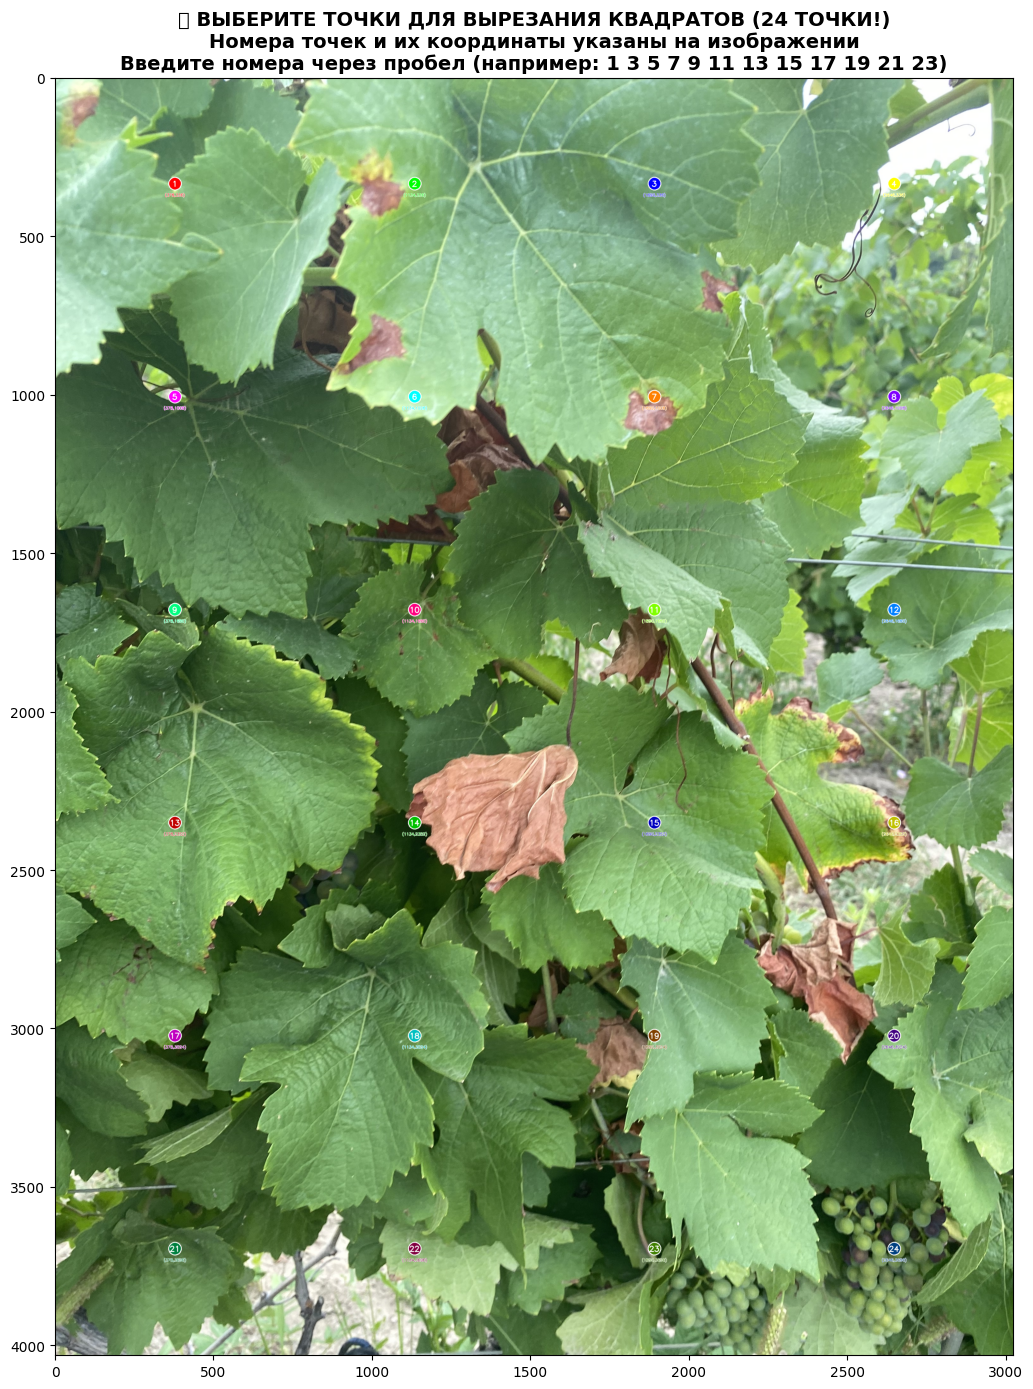


📍 ВАМ ДОСТУПНЫ СЛЕДУЮЩИЕ ВОЗМОЖНОСТИ:
   - 24 точки равномерно распределены по всему изображению
   - Используйте варианты быстрого выбора или вводите номера вручную
   - Можно выбирать точки в несколько этапов

Выберите способ ввода:
1. Использовать вариант быстрого выбора (1-7)
2. Ввести номера точек вручную
Ваш выбор (1/2): 2
Введите номера точек через пробел: 13
📋 Будет обработано точек: [13]
✅ Квадрат 1 вырезан из точки 13 (378, 2352)

📊 Вырезано квадратов в этой серии: 1
📈 Общее количество вырезанных квадратов: 1

🔄 Выбрать еще точки на ЭТОМ же изображении? (y/n): n


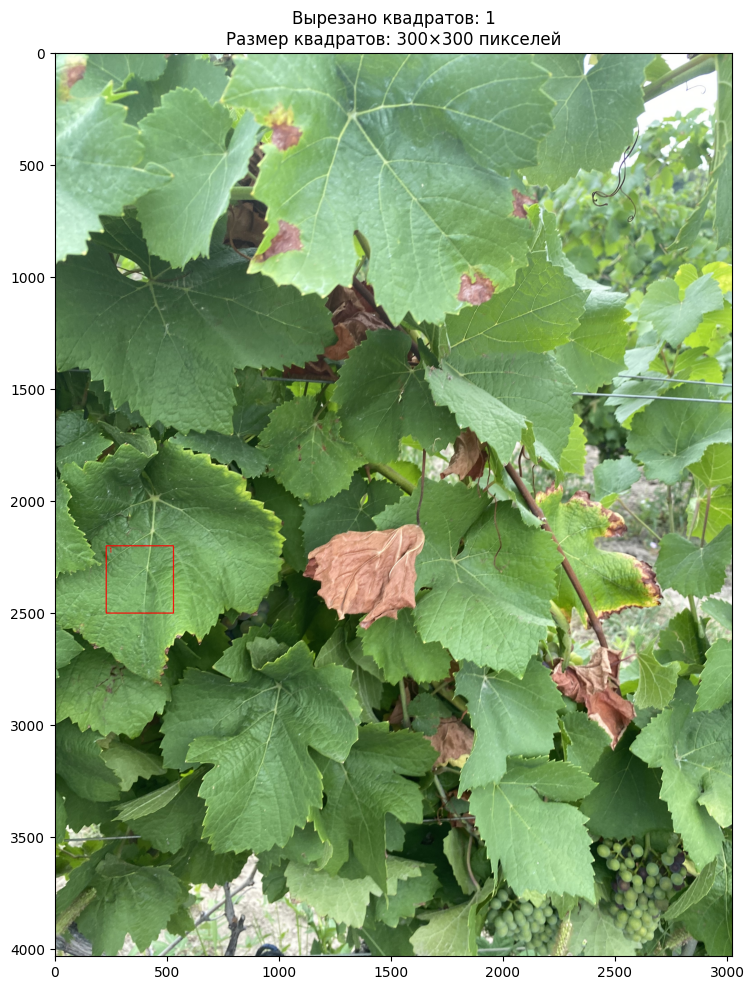


📥 ХОТИТЕ СКАЧАТЬ КВАДРАТЫ?
1. Скачать все квадраты одним ZIP-архивом (рекомендуется)
2. Скачать каждый квадрат отдельно
3. Не скачивать
Выберите вариант (1/2/3): 1
📦 Добавлен в архив: square_001.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Все квадраты скачаны в архиве: squares_collection.zip
🧹 Временные файлы очищены

✅ ОБРАБОТКА ЗАВЕРШЕНА!
📊 Итоговая статистика:
   - Вырезано квадратов: 1
   - Размер каждого квадрата: 300×300 пикселей

📋 Координаты центров:
   Квадрат 1: X=378, Y=2352

🎉 Программа завершена!


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow
import os
from PIL import Image
import ipywidgets as widgets
from IPython.display import display, clear_output
import io
import zipfile

class SquareExtractor:
    def __init__(self, square_size=300):
        self.square_size = square_size
        self.original_image = None
        self.display_image = None
        self.click_coordinates = []
        self.squares = []  # Храним вырезанные квадраты

    def upload_image(self):
        """Загрузка изображения пользователем"""
        print("📤 Загрузите изображение:")
        uploaded = files.upload()

        if not uploaded:
            print("❌ Изображение не загружено!")
            return None

        # Получаем первое загруженное изображение
        image_name = list(uploaded.keys())[0]
        image_data = uploaded[image_name]

        # Читаем изображение
        nparr = np.frombuffer(image_data, np.uint8)
        self.original_image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
        self.original_image = cv2.cvtColor(self.original_image, cv2.COLOR_BGR2RGB)

        # Создаем копию для отображения
        self.display_image = self.original_image.copy()

        print(f"✅ Изображение загружено! Размер: {self.original_image.shape}")
        return self.original_image

    def extract_square(self, x, y):
        """Вырезает квадрат 300x300 с центром в указанных координатах"""
        half_size = self.square_size // 2

        # Определяем границы
        x1 = max(0, x - half_size)
        y1 = max(0, y - half_size)
        x2 = min(self.original_image.shape[1], x + half_size)
        y2 = min(self.original_image.shape[0], y + half_size)

        # Проверяем, что квадрат полностью внутри изображения
        if (x2 - x1) == self.square_size and (y2 - y1) == self.square_size:
            square = self.original_image[y1:y2, x1:x2]
            return square, (x1, y1, x2, y2)
        else:
            print(f"⚠️ Квадрат выходит за границы изображения! Координаты: ({x}, {y})")
            return None, None

    def draw_squares_on_image(self):
        """Рисует все прямоугольники на изображении"""
        self.display_image = self.original_image.copy()
        for i, (x, y) in enumerate(self.click_coordinates, 1):
            half_size = self.square_size // 2
            x1 = max(0, x - half_size)
            y1 = max(0, y - half_size)
            x2 = min(self.display_image.shape[1], x + half_size)
            y2 = min(self.display_image.shape[0], y + half_size)

            # Рисуем красный прямоугольник
            cv2.rectangle(self.display_image, (x1, y1), (x2, y2), (255, 0, 0), 3)

            # Добавляем номер квадрата
            cv2.putText(self.display_image, str(i),
                       (x1 + 10, y1 + 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    def save_square(self, square, square_number):
        """Сохраняет квадрат во временный файл"""
        # Конвертируем в PIL Image для сохранения
        pil_image = Image.fromarray(square)

        # Сохраняем во временный файл
        filename = f"square_{square_number:03d}.png"
        pil_image.save(filename)
        return filename

    def download_single_square(self, filename):
        """Скачивает один квадрат"""
        try:
            files.download(filename)
            print(f"✅ Скачан: {filename}")
            return True
        except Exception as e:
            print(f"❌ Ошибка скачивания {filename}: {e}")
            return False

    def download_all_squares(self):
        """Скачивает все квадраты в ZIP-архиве"""
        if not self.squares:
            print("❌ Нет квадратов для скачивания")
            return False

        try:
            zip_filename = "squares_collection.zip"

            with zipfile.ZipFile(zip_filename, 'w') as zipf:
                for filename in self.squares:
                    if os.path.exists(filename):
                        zipf.write(filename)
                        print(f"📦 Добавлен в архив: {filename}")

            # Скачиваем архив
            files.download(zip_filename)
            print(f"✅ Все квадраты скачаны в архиве: {zip_filename}")

            # Очищаем временные файлы
            self.cleanup_temp_files()
            return True

        except Exception as e:
            print(f"❌ Ошибка создания архива: {e}")
            return False

    def cleanup_temp_files(self):
        """Очищает временные файлы"""
        for filename in self.squares:
            if os.path.exists(filename):
                os.remove(filename)
        print("🧹 Временные файлы очищены")

    def show_image_with_squares(self):
        """Показывает изображение с отмеченными квадратами"""
        plt.figure(figsize=(15, 10))
        plt.imshow(self.display_image)
        plt.title(f'Вырезано квадратов: {len(self.click_coordinates)}\nРазмер квадратов: {self.square_size}×{self.square_size} пикселей')
        plt.axis('on')
        plt.tight_layout()
        plt.show()

# УЛУЧШЕННАЯ версия с БОЛЬШИМ количеством точек
class VisualSquareExtractor(SquareExtractor):
    def __init__(self, square_size=300):
        super().__init__(square_size)
        self.preview_points = []

    def create_preview_grid(self, num_points=24):
        """Создает плотную сетку предпросмотра точек для выбора"""
        height, width = self.original_image.shape[:2]

        # Создаем плотную сетку точек - 6x4 = 24 точки
        rows = 6
        cols = 4

        points = []
        for i in range(rows):
            for j in range(cols):
                if len(points) >= num_points:
                    break
                x = int(width * (j + 0.5) / cols)
                y = int(height * (i + 0.5) / rows)
                points.append((x, y))

        self.preview_points = points
        return points

    def show_preview_with_points(self):
        """Показывает изображение с ХОРОШО ПОДПИСАННЫМИ точками для выбора"""
        preview_image = self.original_image.copy()

        # Больше цветов для 24 точек
        colors = [
            (255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0),
            (255, 0, 255), (0, 255, 255), (255, 128, 0), (128, 0, 255),
            (0, 255, 128), (255, 0, 128), (128, 255, 0), (0, 128, 255),
            (192, 0, 0), (0, 192, 0), (0, 0, 192), (192, 192, 0),
            (192, 0, 192), (0, 192, 192), (128, 64, 0), (64, 0, 128),
            (0, 128, 64), (128, 0, 64), (64, 128, 0), (0, 64, 128)
        ]

        for i, (x, y) in enumerate(self.preview_points, 1):
            color = colors[(i-1) % len(colors)]

            # Рисуем большую цветную точку (немного меньше для плотной сетки)
            cv2.circle(preview_image, (x, y), 20, color, -1)

            # Рисуем белый контур для лучшей видимости
            cv2.circle(preview_image, (x, y), 20, (255, 255, 255), 2)

            # Добавляем большой белый номер
            text_size = cv2.getTextSize(str(i), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 2)[0]
            text_x = x - text_size[0] // 2
            text_y = y + text_size[1] // 2

            cv2.putText(preview_image, str(i), (text_x, text_y),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

            # Добавляем координаты под точкой (меньший шрифт)
            coord_text = f"({x},{y})"
            coord_size = cv2.getTextSize(coord_text, cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1)[0]
            coord_x = x - coord_size[0] // 2
            coord_y = y + 40

            cv2.putText(preview_image, coord_text, (coord_x, coord_y),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 2)
            cv2.putText(preview_image, coord_text, (coord_x, coord_y),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.4, color, 1)

        plt.figure(figsize=(18, 14))
        plt.imshow(preview_image)
        plt.title('🎯 ВЫБЕРИТЕ ТОЧКИ ДЛЯ ВЫРЕЗАНИЯ КВАДРАТОВ (24 ТОЧКИ!)\n'
                 'Номера точек и их координаты указаны на изображении\n'
                 'Введите номера через пробел (например: 1 3 5 7 9 11 13 15 17 19 21 23)',
                 fontsize=14, fontweight='bold')
        plt.axis('on')
        plt.tight_layout()
        plt.show()

    def show_preview_table(self):
        """Показывает таблицу с координатами точек"""
        print("\n📋 ТАБЛИЦА ТОЧЕК ДЛЯ ВЫБОРА (24 точки):")
        print("=" * 70)
        print("№  |   Координаты   |       Расположение      |  Область")
        print("-" * 70)

        height, width = self.original_image.shape[:2]

        for i, (x, y) in enumerate(self.preview_points, 1):
            # Определяем расположение по горизонтали
            if x < width * 0.25:
                hor_pos = "СЛЕВА"
                hor_detail = "ЛЕВЫЙ КРАЙ"
            elif x < width * 0.5:
                hor_pos = "ЛЕВЫЙ ЦЕНТР"
                hor_detail = "ЦЕНТР-ЛЕВО"
            elif x < width * 0.75:
                hor_pos = "ПРАВЫЙ ЦЕНТР"
                hor_detail = "ЦЕНТР-ПРАВО"
            else:
                hor_pos = "СПРАВА"
                hor_detail = "ПРАВЫЙ КРАЙ"

            # Определяем расположение по вертикали
            if y < height * 0.17:
                ver_pos = "ВЕРХ"
                ver_detail = "ВЕРХНИЙ КРАЙ"
            elif y < height * 0.33:
                ver_pos = "ВЕРХ-СЕРЕДИНА"
                ver_detail = "ВЕРХ ЦЕНТР"
            elif y < height * 0.5:
                ver_pos = "ЦЕНТР-ВЕРХ"
                ver_detail = "ЦЕНТР"
            elif y < height * 0.67:
                ver_pos = "ЦЕНТР-НИЗ"
                ver_detail = "ЦЕНТР"
            elif y < height * 0.83:
                ver_pos = "НИЗ-СЕРЕДИНА"
                ver_detail = "НИЗ ЦЕНТР"
            else:
                ver_pos = "НИЗ"
                ver_detail = "НИЖНИЙ КРАЙ"

            position = f"{hor_pos} {ver_pos}"
            area = f"{hor_detail} / {ver_detail}"

            print(f"{i:2d} |   ({x:4d}, {y:4d})   |   {position:16} |  {area}")

    def show_quick_selection_options(self):
        """Показывает варианты быстрого выбора"""
        print("\n⚡ ВАРИАНТЫ БЫСТРОГО ВЫБОРА:")
        print("=" * 50)
        print("1. Все верхние точки: 1 2 3 4")
        print("2. Все центральные точки: 9 10 11 12 13 14 15 16")
        print("3. Все нижние точки: 21 22 23 24")
        print("4. Левая сторона: 1 5 9 13 17 21")
        print("5. Правая сторона: 4 8 12 16 20 24")
        print("6. Все точки (полное покрытие): 1-24")
        print("7. Шахматный порядок: 1 3 5 7 9 11 13 15 17 19 21 23")
        print("8. Ручной ввод (введите любые номера через пробел)")

    def extract_from_preview(self):
        """Вырезает квадраты на основе выбранных точек предпросмотра"""
        image = self.upload_image()
        if image is None:
            return

        # Создаем плотную сетку точек
        points = self.create_preview_grid(24)

        print("\n🎯 РЕЖИМ ВЫБОРА ИЗ ПРЕДПРОСМОТРА (24 ТОЧКИ!)")
        print("=" * 60)
        print("Теперь доступно 24 точки для лучшего покрытия изображения!")

        # Показываем таблицу координат
        self.show_preview_table()

        # Показываем варианты быстрого выбора
        self.show_quick_selection_options()

        # Показываем изображение с точками
        self.show_preview_with_points()

        print("\n📍 ВАМ ДОСТУПНЫ СЛЕДУЮЩИЕ ВОЗМОЖНОСТИ:")
        print("   - 24 точки равномерно распределены по всему изображению")
        print("   - Используйте варианты быстрого выбора или вводите номера вручную")
        print("   - Можно выбирать точки в несколько этапов")

        while True:
            try:
                print("\n" + "="*60)
                print("Выберите способ ввода:")
                print("1. Использовать вариант быстрого выбора (1-7)")
                print("2. Ввести номера точек вручную")

                input_choice = input("Ваш выбор (1/2): ").strip()

                if input_choice == "1":
                    quick_choice = input("Введите номер быстрого варианта (1-7): ").strip()
                    if quick_choice == "1":
                        point_numbers = [1, 2, 3, 4]
                    elif quick_choice == "2":
                        point_numbers = [9, 10, 11, 12, 13, 14, 15, 16]
                    elif quick_choice == "3":
                        point_numbers = [21, 22, 23, 24]
                    elif quick_choice == "4":
                        point_numbers = [1, 5, 9, 13, 17, 21]
                    elif quick_choice == "5":
                        point_numbers = [4, 8, 12, 16, 20, 24]
                    elif quick_choice == "6":
                        point_numbers = list(range(1, 25))
                    elif quick_choice == "7":
                        point_numbers = list(range(1, 25, 2))  # нечетные
                    else:
                        print("❌ Неверный вариант быстрого выбора!")
                        continue

                    print(f"✅ Выбран вариант {quick_choice}: {point_numbers}")

                else:
                    choices = input("Введите номера точек через пробел: ").strip().split()

                    if not choices:
                        print("❌ Вы не ввели ни одного номера!")
                        continue

                    point_numbers = []
                    for num in choices:
                        if num.isdigit():
                            point_num = int(num)
                            if 1 <= point_num <= len(points):
                                point_numbers.append(point_num)
                            else:
                                print(f"⚠️ Точка {point_num} не существует (доступно: 1-{len(points)})")
                        elif '-' in num:
                            # Обработка диапазонов типа "1-5"
                            try:
                                start, end = map(int, num.split('-'))
                                point_numbers.extend(range(start, end + 1))
                            except:
                                print(f"⚠️ Неверный диапазон: {num}")
                        else:
                            print(f"⚠️ '{num}' - не число!")

                if not point_numbers:
                    print("❌ Не выбрано ни одной допустимой точки!")
                    continue

                # Убираем дубликаты и сортируем
                point_numbers = sorted(set(point_numbers))
                print(f"📋 Будет обработано точек: {point_numbers}")

                # Вырезаем квадраты из выбранных точек
                successful_extractions = 0
                for point_num in point_numbers:
                    x, y = points[point_num - 1]
                    square, bounds = self.extract_square(x, y)

                    if square is not None:
                        self.click_coordinates.append((x, y))
                        filename = self.save_square(square, len(self.click_coordinates))
                        self.squares.append(filename)
                        print(f"✅ Квадрат {len(self.click_coordinates)} вырезан из точки {point_num} ({x}, {y})")
                        successful_extractions += 1
                    else:
                        print(f"❌ Не удалось вырезать квадрат из точки {point_num}")

                print(f"\n📊 Вырезано квадратов в этой серии: {successful_extractions}")
                print(f"📈 Общее количество вырезанных квадратов: {len(self.click_coordinates)}")

            except Exception as e:
                print(f"❌ Ошибка: {e}")

            # Спрашиваем, продолжать ли с этим изображением
            continue_choice = input("\n🔄 Выбрать еще точки на ЭТОМ же изображении? (y/n): ")
            if continue_choice.lower() != 'y':
                break

        # Показываем финальный результат и предлагаем скачать
        if self.squares:
            self.draw_squares_on_image()
            self.show_image_with_squares()

            print(f"\n📥 ХОТИТЕ СКАЧАТЬ КВАДРАТЫ?")
            print("1. Скачать все квадраты одним ZIP-архивом (рекомендуется)")
            print("2. Скачать каждый квадрат отдельно")
            print("3. Не скачивать")

            choice = input("Выберите вариант (1/2/3): ")

            if choice == "1":
                self.download_all_squares()
            elif choice == "2":
                print("\n📥 Начинаю скачивание отдельных файлов...")
                for filename in self.squares:
                    self.download_single_square(filename)
            else:
                print("❌ Скачивание отменено")

            print(f"\n✅ ОБРАБОТКА ЗАВЕРШЕНА!")
            print(f"📊 Итоговая статистика:")
            print(f"   - Вырезано квадратов: {len(self.click_coordinates)}")
            print(f"   - Размер каждого квадрата: {self.square_size}×{self.square_size} пикселей")

            print(f"\n📋 Координаты центров:")
            for i, (x, y) in enumerate(self.click_coordinates, 1):
                print(f"   Квадрат {i}: X={x}, Y={y}")
        else:
            print("❌ Не было вырезано ни одного квадрата")

# 🚀 ЗАПУСК ПРОГРАММЫ

print("🎯 ВЫРЕЗАНИЕ КВАДРАТОВ 300×300 ПИКСЕЛЕЙ")
print("=" * 60)
print("УЛУЧШЕННАЯ ВЕРСИЯ С 24 ТОЧКАМИ ДЛЯ ЛУЧШЕГО ПОКРЫТИЯ!")
print()

print("Выберите режим работы:")
print("1. 🎯 Ручной ввод координат (если знаете точные координаты)")
print("2. 👁️ Выбор из 24 точек предпросмотра (РЕКОМЕНДУЕТСЯ!)")

choice = input("Введите номер режима (1 или 2): ")

if choice == "2":
    print("\n" + "="*50)
    print("👁️ РЕЖИМ ВЫБОРА ИЗ 24 ТОЧЕК ПРЕДПРОСМОТРА")
    print("="*50)
    print("🔥 НОВЫЕ ВОЗМОЖНОСТИ:")
    print("✅ 24 точки вместо 12 - лучшее покрытие!")
    print("✅ Варианты быстрого выбора")
    print("✅ Подробная таблица с расположением")
    print("✅ Поддержка диапазонов (например: 1-12)")
    print("✅ Можно выбирать точки в несколько этапов")
    print()

    extractor = VisualSquareExtractor(square_size=300)
    extractor.extract_from_preview()
else:
    print("\n" + "="*50)
    print("🎯 РЕЖИМ РУЧНОГО ВВОДА КООРДИНАТ")
    print("="*50)

    extractor = SquareExtractor(square_size=300)
    extractor.start_interactive_extraction()

print("\n🎉 Программа завершена!")

In [ ]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow
import os
import glob
import pandas as pd
from PIL import Image
import zipfile
from sklearn.cluster import KMeans
from collections import Counter
import seaborn as sns

class LeafMarkerAnalyzer:
    def __init__(self):
        self.results = []

    def load_image_and_annotation(self, image_path, json_path):
        """Загружает изображение и соответствующую аннотацию"""
        # Загружаем изображение
        image = cv2.imread(image_path)
        if image is None:
            print(f"❌ Не удалось загрузить изображение: {image_path}")
            return None, None

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Загружаем JSON аннотацию
        try:
            with open(json_path, 'r', encoding='utf-8') as f:
                annotation = json.load(f)
        except Exception as e:
            print(f"❌ Ошибка загрузки JSON {json_path}: {e}")
            return image, None

        return image, annotation

    def extract_contour_pixels(self, image, contours):
        """Извлекает пиксели внутри контуров"""
        if not contours:
            return np.array([])

        # Создаем маску для контуров
        mask = np.zeros(image.shape[:2], dtype=np.uint8)
        cv2.fillPoly(mask, contours, 255)

        # Извлекаем пиксели внутри маски
        pixels = image[mask == 255]
        return pixels

    def analyze_color_distribution(self, pixels, label, n_colors=5):
        """Анализирует цветовое распределение пикселей"""
        if len(pixels) == 0:
            return {
                'dominant_colors': [],
                'color_percentages': [],
                'mean_color': [0, 0, 0],
                'std_color': [0, 0, 0],
                'pixel_count': 0
            }

        # Анализ основных цветов с помощью K-means
        if len(pixels) > n_colors:
            kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init=10)
            labels = kmeans.fit_predict(pixels)
            counts = Counter(labels)

            total_pixels = len(pixels)
            dominant_colors = kmeans.cluster_centers_.astype(int)
            color_percentages = [counts[i] / total_pixels * 100 for i in range(n_colors)]
        else:
            dominant_colors = [pixels.mean(axis=0).astype(int)] * n_colors
            color_percentages = [100.0] + [0.0] * (n_colors - 1)

        return {
            'dominant_colors': dominant_colors.tolist() if hasattr(dominant_colors, 'tolist') else dominant_colors,
            'color_percentages': color_percentages,
            'mean_color': pixels.mean(axis=0).tolist(),
            'std_color': pixels.std(axis=0).tolist(),
            'pixel_count': len(pixels)
        }

    def process_single_image(self, image_path, json_path):
        """Обрабатывает одно изображение с его разметкой"""
        print(f"🔍 Обрабатываю: {os.path.basename(image_path)}")

        image, annotation = self.load_image_and_annotation(image_path, json_path)
        if image is None:
            return None

        if annotation is None:
            print(f"⚠️ Нет аннотации для {image_path}")
            return None

        result = {
            'filename': os.path.basename(image_path),
            'image_size': image.shape,
            'good_analysis': None,
            'bad_analysis': None
        }

        # Обрабатываем good разметку
        if 'good' in annotation and annotation['good']:
            good_contours = [np.array(contour, dtype=np.int32) for contour in annotation['good']]
            good_pixels = self.extract_contour_pixels(image, good_contours)
            result['good_analysis'] = self.analyze_color_distribution(good_pixels, 'good')
            print(f"   ✅ Good: {result['good_analysis']['pixel_count']} пикселей")

        # Обрабатываем bad разметку
        if 'bad' in annotation and annotation['bad']:
            bad_contours = [np.array(contour, dtype=np.int32) for contour in annotation['bad']]
            bad_pixels = self.extract_contour_pixels(image, bad_contours)
            result['bad_analysis'] = self.analyze_color_distribution(bad_pixels, 'bad')
            print(f"   ❌ Bad: {result['bad_analysis']['pixel_count']} пикселей")

        self.results.append(result)
        return result

    def visualize_single_analysis(self, image_path, json_path, result):
        """Визуализирует анализ для одного изображения"""
        image, annotation = self.load_image_and_annotation(image_path, json_path)
        if image is None:
            return

        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle(f'АНАЛИЗ РАЗМЕТКИ: {os.path.basename(image_path)}', fontsize=16, fontweight='bold')

        # 1. Оригинальное изображение
        axes[0, 0].imshow(image)
        axes[0, 0].set_title('Оригинальное изображение')
        axes[0, 0].axis('off')

        # 2. Изображение с разметкой
        marked_image = image.copy()

        if 'good' in annotation and annotation['good']:
            for contour in annotation['good']:
                cv2.fillPoly(marked_image, [np.array(contour, dtype=np.int32)], (0, 255, 0, 100))

        if 'bad' in annotation and annotation['bad']:
            for contour in annotation['bad']:
                cv2.fillPoly(marked_image, [np.array(contour, dtype=np.int32)], (255, 0, 0, 100))

        axes[0, 1].imshow(marked_image)
        axes[0, 1].set_title('Разметка (GREEN=good, RED=bad)')
        axes[0, 1].axis('off')

        # 3. Good разметка отдельно
        good_mask = np.zeros(image.shape[:2], dtype=np.uint8)
        if 'good' in annotation and annotation['good']:
            for contour in annotation['good']:
                cv2.fillPoly(good_mask, [np.array(contour, dtype=np.int32)], 255)

        good_isolated = image.copy()
        good_isolated[good_mask == 0] = 0

        axes[0, 2].imshow(good_isolated)
        axes[0, 2].set_title('Только GOOD разметка')
        axes[0, 2].axis('off')

        # 4. Bad разметка отдельно
        bad_mask = np.zeros(image.shape[:2], dtype=np.uint8)
        if 'bad' in annotation and annotation['bad']:
            for contour in annotation['bad']:
                cv2.fillPoly(bad_mask, [np.array(contour, dtype=np.int32)], 255)

        bad_isolated = image.copy()
        bad_isolated[bad_mask == 0] = 0

        axes[1, 0].imshow(bad_isolated)
        axes[1, 0].set_title('Только BAD разметка')
        axes[1, 0].axis('off')

        # 5. Цветовая палитра Good
        if result['good_analysis'] and result['good_analysis']['pixel_count'] > 0:
            good_colors = result['good_analysis']['dominant_colors']
            good_percentages = result['good_analysis']['color_percentages']

            # Создаем палитру
            palette_height = 100
            palette_width = 400
            palette = np.zeros((palette_height, palette_width, 3), dtype=np.uint8)

            current_x = 0
            for i, (color, percentage) in enumerate(zip(good_colors, good_percentages)):
                width = int(palette_width * percentage / 100)
                if width > 0:
                    palette[:, current_x:current_x+width] = color
                    current_x += width

            axes[1, 1].imshow(palette)
            axes[1, 1].set_title('Доминирующие цвета GOOD')
            axes[1, 1].axis('off')

            # Добавляем текст с процентами
            for i, (color, percentage) in enumerate(zip(good_colors, good_percentages)):
                if percentage > 5:  # Показываем только значимые цвета
                    y_pos = 20 + (i % 3) * 25
                    color_hex = '#{:02x}{:02x}{:02x}'.format(color[0], color[1], color[2])
                    axes[1, 1].text(10, y_pos, f'{percentage:.1f}%',
                                   color='white', fontweight='bold', fontsize=8,
                                   bbox=dict(boxstyle="round,pad=0.3", facecolor=color_hex, alpha=0.7))

        # 6. Цветовая палитра Bad
        if result['bad_analysis'] and result['bad_analysis']['pixel_count'] > 0:
            bad_colors = result['bad_analysis']['dominant_colors']
            bad_percentages = result['bad_analysis']['color_percentages']

            palette_height = 100
            palette_width = 400
            palette = np.zeros((palette_height, palette_width, 3), dtype=np.uint8)

            current_x = 0
            for i, (color, percentage) in enumerate(zip(bad_colors, bad_percentages)):
                width = int(palette_width * percentage / 100)
                if width > 0:
                    palette[:, current_x:current_x+width] = color
                    current_x += width

            axes[1, 2].imshow(palette)
            axes[1, 2].set_title('Доминирующие цвета BAD')
            axes[1, 2].axis('off')

            for i, (color, percentage) in enumerate(zip(bad_colors, bad_percentages)):
                if percentage > 5:
                    y_pos = 20 + (i % 3) * 25
                    color_hex = '#{:02x}{:02x}{:02x}'.format(color[0], color[1], color[2])
                    axes[1, 2].text(10, y_pos, f'{percentage:.1f}%',
                                   color='white', fontweight='bold', fontsize=8,
                                   bbox=dict(boxstyle="round,pad=0.3", facecolor=color_hex, alpha=0.7))

        plt.tight_layout()
        plt.show()

        # Выводим статистику
        self.print_single_statistics(result)

    def print_single_statistics(self, result):
        """Выводит статистику для одного изображения"""
        print(f"\n📊 СТАТИСТИКА ДЛЯ: {result['filename']}")
        print("=" * 50)

        if result['good_analysis'] and result['good_analysis']['pixel_count'] > 0:
            good = result['good_analysis']
            print("✅ GOOD разметка:")
            print(f"   • Пикселей: {good['pixel_count']}")
            print(f"   • Средний цвет: RGB{tuple(map(int, good['mean_color']))}")
            print(f"   • Стандартное отклонение: RGB{tuple(map(int, good['std_color']))}")

        if result['bad_analysis'] and result['bad_analysis']['pixel_count'] > 0:
            bad = result['bad_analysis']
            print("❌ BAD разметка:")
            print(f"   • Пикселей: {bad['pixel_count']}")
            print(f"   • Средний цвет: RGB{tuple(map(int, bad['mean_color']))}")
            print(f"   • Стандартное отклонение: RGB{tuple(map(int, bad['std_color']))}")

    def process_folder(self, folder_path):
        """Обрабатывает всю папку с изображениями и JSON файлами"""
        # Ищем все изображения
        image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']
        image_files = []

        for ext in image_extensions:
            image_files.extend(glob.glob(os.path.join(folder_path, ext)))
            image_files.extend(glob.glob(os.path.join(folder_path, ext.upper())))

        print(f"📁 Найдено изображений: {len(image_files)}")

        processed_count = 0
        for image_path in image_files:
            # Ищем соответствующий JSON файл
            json_path = os.path.splitext(image_path)[0] + '.json'

            if os.path.exists(json_path):
                result = self.process_single_image(image_path, json_path)
                if result:
                    # Визуализируем каждое изображение
                    self.visualize_single_analysis(image_path, json_path, result)
                    processed_count += 1
            else:
                print(f"⚠️ JSON не найден для: {os.path.basename(image_path)}")

        print(f"\n🎉 Обработка завершена! Обработано изображений: {processed_count}/{len(image_files)}")
        return processed_count

    def create_summary_report(self):
        """Создает сводный отчет по всем обработанным изображениям"""
        if not self.results:
            print("❌ Нет данных для отчета")
            return

        print("\n📈 СВОДНЫЙ ОТЧЕТ ПО ВСЕМ ИЗОБРАЖЕНИЯМ")
        print("=" * 60)

        # Собираем статистику
        good_pixels = []
        bad_pixels = []
        good_mean_colors = []
        bad_mean_colors = []

        for result in self.results:
            if result['good_analysis'] and result['good_analysis']['pixel_count'] > 0:
                good_pixels.append(result['good_analysis']['pixel_count'])
                good_mean_colors.append(result['good_analysis']['mean_color'])

            if result['bad_analysis'] and result['bad_analysis']['pixel_count'] > 0:
                bad_pixels.append(result['bad_analysis']['pixel_count'])
                bad_mean_colors.append(result['bad_analysis']['mean_color'])

        # Выводим общую статистику
        print(f"📊 ОБЩАЯ СТАТИСТИКА:")
        print(f"   • Обработано изображений: {len(self.results)}")
        print(f"   • Изображений с GOOD разметкой: {len(good_pixels)}")
        print(f"   • Изображений с BAD разметкой: {len(bad_pixels)}")

        if good_pixels:
            print(f"   • Среднее количество пикселей GOOD: {np.mean(good_pixels):.0f}")
            print(f"   • Средний цвет GOOD: RGB{np.mean(good_mean_colors, axis=0).astype(int)}")

        if bad_pixels:
            print(f"   • Среднее количество пикселей BAD: {np.mean(bad_pixels):.0f}")
            print(f"   • Средний цвет BAD: RGB{np.mean(bad_mean_colors, axis=0).astype(int)}")

        # Создаем графики сравнения
        if good_pixels and bad_pixels:
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            fig.suptitle('СРАВНИТЕЛЬНЫЙ АНАЛИЗ GOOD vs BAD', fontsize=16, fontweight='bold')

            # 1. Сравнение количества пикселей
            axes[0, 0].boxplot([good_pixels, bad_pixels], labels=['GOOD', 'BAD'])
            axes[0, 0].set_title('Распределение количества пикселей')
            axes[0, 0].set_ylabel('Количество пикселей')
            axes[0, 0].grid(True, alpha=0.3)

            # 2. Сравнение средних цветов
            good_rgb = np.array(good_mean_colors)
            bad_rgb = np.array(bad_mean_colors)

            colors = ['red', 'green', 'blue']
            for i, color in enumerate(colors):
                axes[0, 1].plot(good_rgb[:, i], label=f'GOOD {color}', color=color, linestyle='-', alpha=0.7)
                axes[0, 1].plot(bad_rgb[:, i], label=f'BAD {color}', color=color, linestyle='--', alpha=0.7)

            axes[0, 1].set_title('Сравнение цветовых каналов')
            axes[0, 1].set_xlabel('Изображение')
            axes[0, 1].set_ylabel('Значение цвета')
            axes[0, 1].legend()
            axes[0, 1].grid(True, alpha=0.3)

            # 3. Цветовое пространство
            axes[1, 0].scatter(good_rgb[:, 0], good_rgb[:, 1], c='green', label='GOOD', alpha=0.6)
            axes[1, 0].scatter(bad_rgb[:, 0], bad_rgb[:, 1], c='red', label='BAD', alpha=0.6)
            axes[1, 0].set_xlabel('Red channel')
            axes[1, 0].set_ylabel('Green channel')
            axes[1, 0].set_title('Цветовое пространство (R-G)')
            axes[1, 0].legend()
            axes[1, 0].grid(True, alpha=0.3)

            # 4. Гистограмма разницы цветов
            if len(good_rgb) == len(bad_rgb):
                color_diff = np.mean(np.abs(good_rgb - bad_rgb), axis=1)
                axes[1, 1].hist(color_diff, bins=20, alpha=0.7, color='purple')
                axes[1, 1].set_xlabel('Средняя разница цветов (RGB)')
                axes[1, 1].set_ylabel('Количество изображений')
                axes[1, 1].set_title('Распределение разницы цветов GOOD-BAD')
                axes[1, 1].grid(True, alpha=0.3)

            plt.tight_layout()
            plt.show()

    def export_results(self, output_filename="leaf_analysis_results.csv"):
        """Экспортирует результаты в CSV файл"""
        if not self.results:
            print("❌ Нет данных для экспорта")
            return

        export_data = []

        for result in self.results:
            row = {
                'filename': result['filename'],
                'image_width': result['image_size'][1],
                'image_height': result['image_size'][0]
            }

            # Добавляем данные GOOD
            if result['good_analysis']:
                good = result['good_analysis']
                row.update({
                    'good_pixel_count': good['pixel_count'],
                    'good_mean_r': good['mean_color'][0],
                    'good_mean_g': good['mean_color'][1],
                    'good_mean_b': good['mean_color'][2],
                    'good_std_r': good['std_color'][0],
                    'good_std_g': good['std_color'][1],
                    'good_std_b': good['std_color'][2]
                })
            else:
                row.update({f'good_{key}': 0 for key in ['pixel_count', 'mean_r', 'mean_g', 'mean_b', 'std_r', 'std_g', 'std_b']})

            # Добавляем данные BAD
            if result['bad_analysis']:
                bad = result['bad_analysis']
                row.update({
                    'bad_pixel_count': bad['pixel_count'],
                    'bad_mean_r': bad['mean_color'][0],
                    'bad_mean_g': bad['mean_color'][1],
                    'bad_mean_b': bad['mean_color'][2],
                    'bad_std_r': bad['std_color'][0],
                    'bad_std_g': bad['std_color'][1],
                    'bad_std_b': bad['std_color'][2]
                })
            else:
                row.update({f'bad_{key}': 0 for key in ['pixel_count', 'mean_r', 'mean_g', 'mean_b', 'std_r', 'std_g', 'std_b']})

            export_data.append(row)

        # Создаем DataFrame и сохраняем
        df = pd.DataFrame(export_data)
        df.to_csv(output_filename, index=False, encoding='utf-8')

        # Скачиваем файл
        files.download(output_filename)
        print(f"✅ Результаты экспортированы в: {output_filename}")

# 🚀 ЗАПУСК ПРОГРАММЫ

def main():
    print("🎯 АНАЛИЗ РАЗМЕТКИ ВИНОГРАДНЫХ ЛИСТЬЕВ")
    print("=" * 60)
    print("Эта программа анализирует разметку good/bad и проводит цветовой анализ")
    print()

    # Создаем анализатор
    analyzer = LeafMarkerAnalyzer()

    # Загружаем папку с данными
    print("📁 ЗАГРУЗКА ДАННЫХ")
    print("=" * 30)

    # Для Google Colab - загружаем zip архив с данными
    print("1. Загрузите ZIP-архив с изображениями и JSON файлами")
    print("2. Или укажите путь к папке на Google Drive")

    use_zip = input("Использовать ZIP архив? (y/n): ").lower().strip() == 'y'

    if use_zip:
        print("📤 Загрузите ZIP архив:")
        uploaded = files.upload()

        if not uploaded:
            print("❌ Архив не загружен!")
            return

        zip_name = list(uploaded.keys())[0]

        # Создаем временную папку и распаковываем
        temp_folder = "temp_leaf_data"
        os.makedirs(temp_folder, exist_ok=True)

        with zipfile.ZipFile(zip_name, 'r') as zip_ref:
            zip_ref.extractall(temp_folder)

        print(f"✅ Архив распакован в: {temp_folder}")
        folder_to_process = temp_folder

    else:
        folder_path = input("Введите путь к папке на Google Drive: ").strip()
        if not os.path.exists(folder_path):
            print("❌ Папка не существует!")
            return
        folder_to_process = folder_path

    # Обрабатываем данные
    print("\n🔍 НАЧИНАЕМ АНАЛИЗ")
    print("=" * 30)

    processed_count = analyzer.process_folder(folder_to_process)

    if processed_count > 0:
        # Создаем сводный отчет
        analyzer.create_summary_report()

        # Экспортируем результаты
        print("\n💾 ЭКСПОРТ РЕЗУЛЬТАТОВ")
        print("=" * 30)
        analyzer.export_results()

        print(f"\n🎉 АНАЛИЗ ЗАВЕРШЕН!")
        print(f"📊 Обработано изображений: {processed_count}")
        print(f"📈 Результаты сохранены в CSV файл")
    else:
        print("❌ Не удалось обработать ни одного изображения")

    # Очистка временных файлов
    if use_zip and os.path.exists(temp_folder):
        import shutil
        shutil.rmtree(temp_folder)
        print("🧹 Временные файлы очищены")

# Запускаем программу
if __name__ == "__main__":
    main()

🎯 АНАЛИЗ ЦВЕТОВЫХ ХАРАКТЕРИСТИК ИЗОБРАЖЕНИЙ
Анализ в цветовых пространствах: RGB, HSV, LAB
Рассчитываются: среднее, дисперсия, стандартное отклонение

🔍 ПРОВЕРКА ПАПОК:
------------------------------
✅ good_centre: /content/drive/MyDrive/good_centre
✅ good_no_centre: /content/drive/MyDrive/good_no_centre
✅ bad_white: /content/drive/MyDrive/bad_white
✅ bad_red: /content/drive/MyDrive/bad_red

📁 Будет обработано папок: 4

📁 Анализирую папку: good_centre
📂 Путь: /content/drive/MyDrive/good_centre
📊 Найдено изображений: 10
   Обрабатываю 1/10: 0ac4ff49-7fbf-4644-98a4-4dc596e2fa87___Mt.N.V_HL 9004_90deg.JPG
   Обрабатываю 2/10: 0ac4ff49-7fbf-4644-98a4-4dc596e2fa87___Mt.N.V_HL 9004_180deg.JPG
   Обрабатываю 3/10: 0ac4ff49-7fbf-4644-98a4-4dc596e2fa87___Mt.N.V_HL 9004_new30degFlipLR.JPG
   Обрабатываю 4/10: 0c1667a2-61d7-4dee-b4d9-0d141a1ceb20___Mt.N.V_HL 9127_90deg.JPG
   Обрабатываю 5/10: 0c1667a2-61d7-4dee-b4d9-0d141a1ceb20___Mt.N.V_HL 9127_180deg.JPG
   Обрабатываю 6/10: 0c1667a2-61d7-4dee

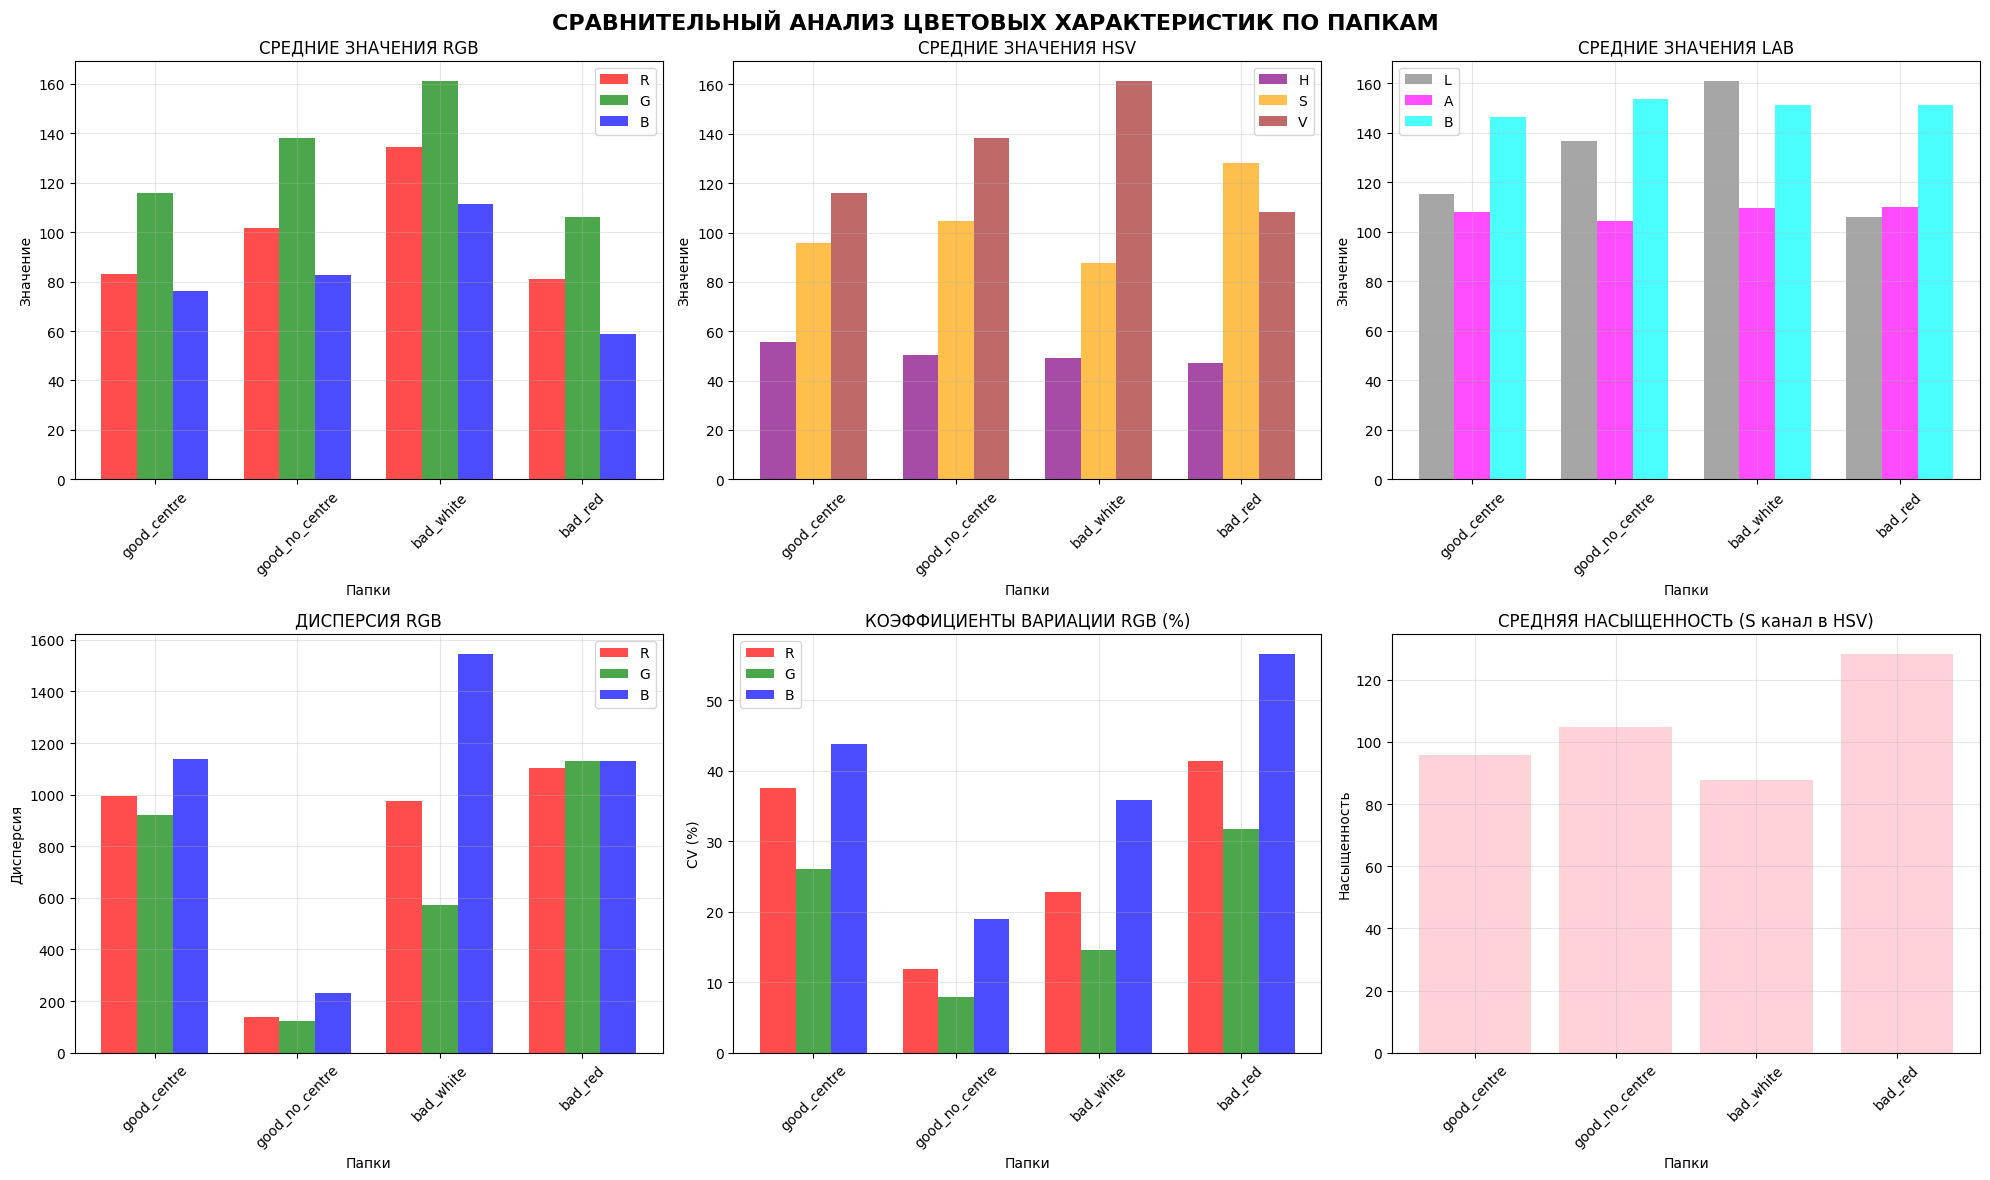


💾 ЭКСПОРТ РЕЗУЛЬТАТОВ


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Результаты экспортированы в: color_analysis_results.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Сводная статистика экспортирована в: folder_summary.csv

🎉 АНАЛИЗ ЗАВЕРШЕН!
📈 Обработано папок: 4
📊 Всего изображений: 40


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from google.colab import files
from google.colab.patches import cv2_imshow
import seaborn as sns
from PIL import Image

class ColorSpaceAnalyzer:
    def __init__(self):
        self.results = []
        self.folder_stats = {}

    def analyze_single_image(self, image_path):
        """Анализирует одно изображение в разных цветовых пространствах"""
        # Загружаем изображение
        img = cv2.imread(image_path)
        if img is None:
            print(f"❌ Не удалось загрузить: {os.path.basename(image_path)}")
            return None

        # Конвертируем в RGB (OpenCV загружает в BGR)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Конвертируем в другие цветовые пространства
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

        # Анализируем каждое цветовое пространство
        analysis = {
            'filename': os.path.basename(image_path),
            'rgb': self.analyze_color_space(img_rgb, ['R', 'G', 'B']),
            'hsv': self.analyze_color_space(img_hsv, ['H', 'S', 'V']),
            'lab': self.analyze_color_space(img_lab, ['L', 'A', 'B'])
        }

        return analysis

    def analyze_color_space(self, image, channel_names):
        """Анализирует одно цветовое пространство с проверкой корректности"""
        stats = {}

        # Определяем ожидаемые диапазоны для разных цветовых пространств
        if channel_names == ['R', 'G', 'B']:
            ranges = [255, 255, 255]  # RGB: 0-255
        elif channel_names == ['H', 'S', 'V']:
            ranges = [179, 255, 255]  # HSV в OpenCV: H:0-179, S:0-255, V:0-255
        elif channel_names == ['L', 'A', 'B']:
            ranges = [255, 255, 255]  # LAB в OpenCV: 0-255
        else:
            ranges = [255, 255, 255]

        for i, (channel_name, expected_max) in enumerate(zip(channel_names, ranges)):
            channel = image[:, :, i].astype(np.float32)

            # Основная статистика
            mean_val = np.mean(channel)
            var_val = np.var(channel)
            std_val = np.std(channel)

            stats[f'{channel_name.lower()}_mean'] = mean_val
            stats[f'{channel_name.lower()}_var'] = var_val
            stats[f'{channel_name.lower()}_std'] = std_val
            stats[f'{channel_name.lower()}_min'] = np.min(channel)
            stats[f'{channel_name.lower()}_max'] = np.max(channel)
            stats[f'{channel_name.lower()}_median'] = np.median(channel)

            # Диагностическая информация
            stats[f'{channel_name.lower()}_expected_max'] = expected_max
            stats[f'{channel_name.lower()}_max_possible_var'] = (expected_max ** 2) / 4  # Максимальная дисперсия для равномерного распределения
            stats[f'{channel_name.lower()}_var_ratio'] = var_val / ((expected_max ** 2) / 4) if expected_max > 0 else 0

            # Коэффициент вариации
            stats[f'{channel_name.lower()}_cv'] = (std_val / mean_val * 100) if mean_val > 0 else 0

        # Добавляем общую яркость (для RGB - среднее по каналам)
        if channel_names == ['R', 'G', 'B']:
            gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY).astype(np.float32)
            stats['brightness_mean'] = np.mean(gray)
            stats['brightness_var'] = np.var(gray)
            stats['brightness_std'] = np.std(gray)
            stats['brightness_cv'] = (stats['brightness_std'] / stats['brightness_mean'] * 100) if stats['brightness_mean'] > 0 else 0

        return stats

    def analyze_folder(self, folder_path, folder_name):
        """Анализирует все изображения в папке"""
        print(f"📁 Анализирую папку: {folder_name}")
        print(f"📂 Путь: {folder_path}")

        # Ищем все изображения
        image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff']
        image_files = []

        for ext in image_extensions:
            image_files.extend(glob.glob(os.path.join(folder_path, ext)))
            image_files.extend(glob.glob(os.path.join(folder_path, ext.upper())))

        if not image_files:
            print(f"❌ В папке {folder_name} нет изображений")
            return None

        print(f"📊 Найдено изображений: {len(image_files)}")

        folder_results = []
        for i, image_path in enumerate(image_files, 1):
            print(f"   Обрабатываю {i}/{len(image_files)}: {os.path.basename(image_path)}")

            analysis = self.analyze_single_image(image_path)
            if analysis:
                analysis['folder'] = folder_name
                folder_results.append(analysis)
                self.results.append(analysis)

        # Вычисляем статистику по папке
        if folder_results:
            self.calculate_folder_statistics(folder_results, folder_name)
            print(f"✅ Папка {folder_name} обработана: {len(folder_results)} изображений")
        else:
            print(f"❌ В папке {folder_name} не удалось обработать ни одного изображения")

        return folder_results

    def calculate_folder_statistics(self, folder_results, folder_name):
        """Вычисляет сводную статистику по папке"""
        # Собираем все данные по каналам
        rgb_means = {f'{ch}_mean': [] for ch in ['r', 'g', 'b']}
        hsv_means = {f'{ch}_mean': [] for ch in ['h', 's', 'v']}
        lab_means = {f'{ch}_mean': [] for ch in ['l', 'a', 'b']}

        rgb_vars = {f'{ch}_var': [] for ch in ['r', 'g', 'b']}
        hsv_vars = {f'{ch}_var': [] for ch in ['h', 's', 'v']}
        lab_vars = {f'{ch}_var': [] for ch in ['l', 'a', 'b']}

        rgb_cvs = {f'{ch}_cv': [] for ch in ['r', 'g', 'b']}
        hsv_cvs = {f'{ch}_cv': [] for ch in ['h', 's', 'v']}
        lab_cvs = {f'{ch}_cv': [] for ch in ['l', 'a', 'b']}

        for result in folder_results:
            for channel in ['r', 'g', 'b']:
                rgb_means[f'{channel}_mean'].append(result['rgb'][f'{channel}_mean'])
                rgb_vars[f'{channel}_var'].append(result['rgb'][f'{channel}_var'])
                rgb_cvs[f'{channel}_cv'].append(result['rgb'][f'{channel}_cv'])

            for channel in ['h', 's', 'v']:
                hsv_means[f'{channel}_mean'].append(result['hsv'][f'{channel}_mean'])
                hsv_vars[f'{channel}_var'].append(result['hsv'][f'{channel}_var'])
                hsv_cvs[f'{channel}_cv'].append(result['hsv'][f'{channel}_cv'])

            for channel in ['l', 'a', 'b']:
                lab_means[f'{channel}_mean'].append(result['lab'][f'{channel}_mean'])
                lab_vars[f'{channel}_var'].append(result['lab'][f'{channel}_var'])
                lab_cvs[f'{channel}_cv'].append(result['lab'][f'{channel}_cv'])

        # Вычисляем средние по папке
        folder_stats = {
            'folder_name': folder_name,
            'image_count': len(folder_results),
            'rgb': {
                'mean': {ch: np.mean(rgb_means[f'{ch}_mean']) for ch in ['r', 'g', 'b']},
                'variance': {ch: np.mean(rgb_vars[f'{ch}_var']) for ch in ['r', 'g', 'b']},
                'std': {ch: np.std(rgb_means[f'{ch}_mean']) for ch in ['r', 'g', 'b']},
                'cv': {ch: np.mean(rgb_cvs[f'{ch}_cv']) for ch in ['r', 'g', 'b']},
                'max_possible_var': 65025,  # 255^2
            },
            'hsv': {
                'mean': {ch: np.mean(hsv_means[f'{ch}_mean']) for ch in ['h', 's', 'v']},
                'variance': {ch: np.mean(hsv_vars[f'{ch}_var']) for ch in ['h', 's', 'v']},
                'std': {ch: np.std(hsv_means[f'{ch}_mean']) for ch in ['h', 's', 'v']},
                'cv': {ch: np.mean(hsv_cvs[f'{ch}_cv']) for ch in ['h', 's', 'v']},
                'max_possible_var': {'h': 8008, 's': 65025, 'v': 65025},  # H: 179^2/4, S/V: 255^2
            },
            'lab': {
                'mean': {ch: np.mean(lab_means[f'{ch}_mean']) for ch in ['l', 'a', 'b']},
                'variance': {ch: np.mean(lab_vars[f'{ch}_var']) for ch in ['l', 'a', 'b']},
                'std': {ch: np.std(lab_means[f'{ch}_mean']) for ch in ['l', 'a', 'b']},
                'cv': {ch: np.mean(lab_cvs[f'{ch}_cv']) for ch in ['l', 'a', 'b']},
                'max_possible_var': 65025,  # 255^2
            }
        }

        self.folder_stats[folder_name] = folder_stats
        return folder_stats

    def print_detailed_statistics(self, folder_name):
        """Выводит детальную статистику для папки с проверкой корректности"""
        if folder_name not in self.folder_stats:
            print(f"❌ Нет статистики для папки {folder_name}")
            return

        stats = self.folder_stats[folder_name]

        print(f"\n📈 ДЕТАЛЬНАЯ СТАТИСТИКА: {folder_name}")
        print("=" * 70)
        print(f"📊 Количество изображений: {stats['image_count']}")
        print()

        # RGB статистика
        print("🎨 RGB ЦВЕТОВОЕ ПРОСТРАНСТВО (0-255):")
        print("-" * 50)
        for channel in ['r', 'g', 'b']:
            mean = stats['rgb']['mean'][channel]
            var = stats['rgb']['variance'][channel]
            std = stats['rgb']['std'][channel]
            cv = stats['rgb']['cv'][channel]
            max_var = stats['rgb']['max_possible_var']
            var_ratio = (var / max_var) * 100

            # Проверка корректности
            range_check = "✅" if 0 <= mean <= 255 else "❌"
            var_check = "✅" if var <= max_var else "❌"

            print(f"   {channel.upper()}: {range_check} Среднее = {mean:7.2f} | "
                  f"{var_check} Дисперсия = {var:7.2f} | Std = {std:6.2f}")
            print(f"        Коэф. вариации = {cv:5.1f}% | Заполнение дисперсии = {var_ratio:4.1f}%")

        print()

        # HSV статистика
        print("🌈 HSV ЦВЕТОВОЕ ПРОСТРАНСТВО:")
        print("   H: 0-179, S: 0-255, V: 0-255")
        print("-" * 50)
        for channel, expected_max in zip(['h', 's', 'v'], [179, 255, 255]):
            mean = stats['hsv']['mean'][channel]
            var = stats['hsv']['variance'][channel]
            std = stats['hsv']['std'][channel]
            cv = stats['hsv']['cv'][channel]
            max_var = stats['hsv']['max_possible_var'][channel] if isinstance(stats['hsv']['max_possible_var'], dict) else stats['hsv']['max_possible_var']
            var_ratio = (var / max_var) * 100

            range_check = "✅" if 0 <= mean <= expected_max else "❌"
            var_check = "✅" if var <= max_var else "❌"

            print(f"   {channel.upper()}: {range_check} Среднее = {mean:7.2f} | "
                  f"{var_check} Дисперсия = {var:7.2f} | Std = {std:6.2f}")
            print(f"        Коэф. вариации = {cv:5.1f}% | Заполнение дисперсии = {var_ratio:4.1f}%")

        print()

        # LAB статистика
        print("🔬 LAB ЦВЕТОВОЕ ПРОСТРАНСТВО (0-255):")
        print("-" * 50)
        for channel in ['l', 'a', 'b']:
            mean = stats['lab']['mean'][channel]
            var = stats['lab']['variance'][channel]
            std = stats['lab']['std'][channel]
            cv = stats['lab']['cv'][channel]
            max_var = stats['lab']['max_possible_var']
            var_ratio = (var / max_var) * 100

            range_check = "✅" if 0 <= mean <= 255 else "❌"
            var_check = "✅" if var <= max_var else "❌"

            print(f"   {channel.upper()}: {range_check} Среднее = {mean:7.2f} | "
                  f"{var_check} Дисперсия = {var:7.2f} | Std = {std:6.2f}")
            print(f"        Коэф. вариации = {cv:5.1f}% | Заполнение дисперсии = {var_ratio:4.1f}%")

        # Сводная диагностика
        print(f"\n🔍 ДИАГНОСТИКА КОРРЕКТНОСТИ ДАННЫХ:")
        print("-" * 40)

        # Проверяем RGB
        rgb_ok = all(0 <= stats['rgb']['mean'][ch] <= 255 for ch in ['r', 'g', 'b'])
        rgb_var_ok = all(stats['rgb']['variance'][ch] <= stats['rgb']['max_possible_var'] for ch in ['r', 'g', 'b'])
        print(f"RGB:  Диапазон = {'✅' if rgb_ok else '❌'}, Дисперсия = {'✅' if rgb_var_ok else '❌'}")

        # Проверяем HSV
        hsv_ranges_ok = (
            0 <= stats['hsv']['mean']['h'] <= 179 and
            0 <= stats['hsv']['mean']['s'] <= 255 and
            0 <= stats['hsv']['mean']['v'] <= 255
        )
        hsv_var_ok = all(
            stats['hsv']['variance'][ch] <= (stats['hsv']['max_possible_var'][ch] if isinstance(stats['hsv']['max_possible_var'], dict) else stats['hsv']['max_possible_var'])
            for ch in ['h', 's', 'v']
        )
        print(f"HSV:  Диапазон = {'✅' if hsv_ranges_ok else '❌'}, Дисперсия = {'✅' if hsv_var_ok else '❌'}")

        # Проверяем LAB
        lab_ok = all(0 <= stats['lab']['mean'][ch] <= 255 for ch in ['l', 'a', 'b'])
        lab_var_ok = all(stats['lab']['variance'][ch] <= stats['lab']['max_possible_var'] for ch in ['l', 'a', 'b'])
        print(f"LAB:  Диапазон = {'✅' if lab_ok else '❌'}, Дисперсия = {'✅' if lab_var_ok else '❌'}")

    def visualize_comparison(self):
        """Визуализирует сравнение всех папок"""
        if not self.folder_stats:
            print("❌ Нет данных для визуализации")
            return

        folders = list(self.folder_stats.keys())

        # Создаем большую фигуру с несколькими графиками
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        fig.suptitle('СРАВНИТЕЛЬНЫЙ АНАЛИЗ ЦВЕТОВЫХ ХАРАКТЕРИСТИК ПО ПАПКАМ',
                     fontsize=16, fontweight='bold')

        # 1. RGB средние значения
        rgb_data = {ch: [] for ch in ['r', 'g', 'b']}
        for folder in folders:
            for ch in ['r', 'g', 'b']:
                rgb_data[ch].append(self.folder_stats[folder]['rgb']['mean'][ch])

        x = np.arange(len(folders))
        width = 0.25

        for i, (ch, color) in enumerate(zip(['r', 'g', 'b'], ['red', 'green', 'blue'])):
            axes[0, 0].bar(x + i * width, rgb_data[ch], width, label=ch.upper(), color=color, alpha=0.7)

        axes[0, 0].set_title('СРЕДНИЕ ЗНАЧЕНИЯ RGB')
        axes[0, 0].set_xlabel('Папки')
        axes[0, 0].set_ylabel('Значение')
        axes[0, 0].set_xticks(x + width)
        axes[0, 0].set_xticklabels(folders, rotation=45)
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

        # 2. HSV средние значения
        hsv_data = {ch: [] for ch in ['h', 's', 'v']}
        for folder in folders:
            for ch in ['h', 's', 'v']:
                hsv_data[ch].append(self.folder_stats[folder]['hsv']['mean'][ch])

        for i, (ch, color) in enumerate(zip(['h', 's', 'v'], ['purple', 'orange', 'brown'])):
            axes[0, 1].bar(x + i * width, hsv_data[ch], width, label=ch.upper(), color=color, alpha=0.7)

        axes[0, 1].set_title('СРЕДНИЕ ЗНАЧЕНИЯ HSV')
        axes[0, 1].set_xlabel('Папки')
        axes[0, 1].set_ylabel('Значение')
        axes[0, 1].set_xticks(x + width)
        axes[0, 1].set_xticklabels(folders, rotation=45)
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)

        # 3. LAB средние значения
        lab_data = {ch: [] for ch in ['l', 'a', 'b']}
        for folder in folders:
            for ch in ['l', 'a', 'b']:
                lab_data[ch].append(self.folder_stats[folder]['lab']['mean'][ch])

        for i, (ch, color) in enumerate(zip(['l', 'a', 'b'], ['gray', 'magenta', 'cyan'])):
            axes[0, 2].bar(x + i * width, lab_data[ch], width, label=ch.upper(), color=color, alpha=0.7)

        axes[0, 2].set_title('СРЕДНИЕ ЗНАЧЕНИЯ LAB')
        axes[0, 2].set_xlabel('Папки')
        axes[0, 2].set_ylabel('Значение')
        axes[0, 2].set_xticks(x + width)
        axes[0, 2].set_xticklabels(folders, rotation=45)
        axes[0, 2].legend()
        axes[0, 2].grid(True, alpha=0.3)

        # 4. RGB дисперсия
        rgb_var_data = {ch: [] for ch in ['r', 'g', 'b']}
        for folder in folders:
            for ch in ['r', 'g', 'b']:
                rgb_var_data[ch].append(self.folder_stats[folder]['rgb']['variance'][ch])

        for i, (ch, color) in enumerate(zip(['r', 'g', 'b'], ['red', 'green', 'blue'])):
            axes[1, 0].bar(x + i * width, rgb_var_data[ch], width, label=ch.upper(), color=color, alpha=0.7)

        axes[1, 0].set_title('ДИСПЕРСИЯ RGB')
        axes[1, 0].set_xlabel('Папки')
        axes[1, 0].set_ylabel('Дисперсия')
        axes[1, 0].set_xticks(x + width)
        axes[1, 0].set_xticklabels(folders, rotation=45)
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        # 5. Коэффициенты вариации RGB
        rgb_cv_data = {ch: [] for ch in ['r', 'g', 'b']}
        for folder in folders:
            for ch in ['r', 'g', 'b']:
                rgb_cv_data[ch].append(self.folder_stats[folder]['rgb']['cv'][ch])

        for i, (ch, color) in enumerate(zip(['r', 'g', 'b'], ['red', 'green', 'blue'])):
            axes[1, 1].bar(x + i * width, rgb_cv_data[ch], width, label=ch.upper(), color=color, alpha=0.7)

        axes[1, 1].set_title('КОЭФФИЦИЕНТЫ ВАРИАЦИИ RGB (%)')
        axes[1, 1].set_xlabel('Папки')
        axes[1, 1].set_ylabel('CV (%)')
        axes[1, 1].set_xticks(x + width)
        axes[1, 1].set_xticklabels(folders, rotation=45)
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)

        # 6. Насыщенность (Saturation в HSV)
        saturation_data = []
        for folder in folders:
            saturation_data.append(self.folder_stats[folder]['hsv']['mean']['s'])

        axes[1, 2].bar(x, saturation_data, color='pink', alpha=0.7)
        axes[1, 2].set_title('СРЕДНЯЯ НАСЫЩЕННОСТЬ (S канал в HSV)')
        axes[1, 2].set_xlabel('Папки')
        axes[1, 2].set_ylabel('Насыщенность')
        axes[1, 2].set_xticks(x)
        axes[1, 2].set_xticklabels(folders, rotation=45)
        axes[1, 2].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def export_results(self, filename="color_analysis_results.csv"):
        """Экспортирует результаты в CSV файл"""
        if not self.results:
            print("❌ Нет данных для экспорта")
            return

        # Создаем данные для экспорта
        export_data = []

        for result in self.results:
            row = {
                'folder': result['folder'],
                'filename': result['filename']
            }

            # Добавляем RGB данные
            for key, value in result['rgb'].items():
                row[f'rgb_{key}'] = value

            # Добавляем HSV данные
            for key, value in result['hsv'].items():
                row[f'hsv_{key}'] = value

            # Добавляем LAB данные
            for key, value in result['lab'].items():
                row[f'lab_{key}'] = value

            export_data.append(row)

        # Создаем DataFrame и сохраняем
        df = pd.DataFrame(export_data)
        df.to_csv(filename, index=False, encoding='utf-8')

        # Скачиваем файл
        files.download(filename)
        print(f"✅ Результаты экспортированы в: {filename}")

        # Также экспортируем сводную статистику по папкам
        self.export_folder_summary()

    def export_folder_summary(self, filename="folder_summary.csv"):
        """Экспортирует сводную статистику по папкам"""
        if not self.folder_stats:
            print("❌ Нет сводной статистики для экспорта")
            return

        summary_data = []

        for folder_name, stats in self.folder_stats.items():
            row = {'folder': folder_name, 'image_count': stats['image_count']}

            # RGB статистика
            for ch in ['r', 'g', 'b']:
                row[f'rgb_{ch}_mean'] = stats['rgb']['mean'][ch]
                row[f'rgb_{ch}_variance'] = stats['rgb']['variance'][ch]
                row[f'rgb_{ch}_std'] = stats['rgb']['std'][ch]
                row[f'rgb_{ch}_cv'] = stats['rgb']['cv'][ch]

            # HSV статистика
            for ch in ['h', 's', 'v']:
                row[f'hsv_{ch}_mean'] = stats['hsv']['mean'][ch]
                row[f'hsv_{ch}_variance'] = stats['hsv']['variance'][ch]
                row[f'hsv_{ch}_std'] = stats['hsv']['std'][ch]
                row[f'hsv_{ch}_cv'] = stats['hsv']['cv'][ch]

            # LAB статистика
            for ch in ['l', 'a', 'b']:
                row[f'lab_{ch}_mean'] = stats['lab']['mean'][ch]
                row[f'lab_{ch}_variance'] = stats['lab']['variance'][ch]
                row[f'lab_{ch}_std'] = stats['lab']['std'][ch]
                row[f'lab_{ch}_cv'] = stats['lab']['cv'][ch]

            summary_data.append(row)

        df_summary = pd.DataFrame(summary_data)
        df_summary.to_csv(filename, index=False, encoding='utf-8')

        files.download(filename)
        print(f"✅ Сводная статистика экспортирована в: {filename}")

# 🚀 ОСНОВНАЯ ПРОГРАММА

def main():
    print("🎯 АНАЛИЗ ЦВЕТОВЫХ ХАРАКТЕРИСТИК ИЗОБРАЖЕНИЙ")
    print("=" * 60)
    print("Анализ в цветовых пространствах: RGB, HSV, LAB")
    print("Рассчитываются: среднее, дисперсия, стандартное отклонение")
    print()

    # Инициализируем анализатор
    analyzer = ColorSpaceAnalyzer()

    # 🔧 НАСТРОЙКА ПУТЕЙ К ПАПКАМ
    # ЗАМЕНИТЕ ЭТИ ПУТИ НА СВОИ!

    folder_paths = {
        "good_centre": "/content/drive/MyDrive/good_centre",
        "good_no_centre": "/content/drive/MyDrive/good_no_centre",
        "bad_white": "/content/drive/MyDrive/bad_white",
        "bad_red": "/content/drive/MyDrive/bad_red"
    }

    # Проверяем существование папок
    print("🔍 ПРОВЕРКА ПАПОК:")
    print("-" * 30)

    existing_folders = {}
    for name, path in folder_paths.items():
        if os.path.exists(path):
            existing_folders[name] = path
            print(f"✅ {name}: {path}")
        else:
            print(f"❌ {name}: {path} - папка не существует!")

    if not existing_folders:
        print("❌ Ни одна папка не найдена! Проверьте пути.")
        return

    print(f"\n📁 Будет обработано папок: {len(existing_folders)}")

    # Обрабатываем каждую папку
    for folder_name, folder_path in existing_folders.items():
        print(f"\n{'='*50}")
        analyzer.analyze_folder(folder_path, folder_name)
        analyzer.print_detailed_statistics(folder_name)

    # Визуализируем сравнение
    if len(existing_folders) > 1:
        print(f"\n{'='*50}")
        print("📊 ВИЗУАЛИЗАЦИЯ СРАВНЕНИЯ ПАПОК")
        print("=" * 50)
        analyzer.visualize_comparison()

    # Экспортируем результаты
    print(f"\n{'='*50}")
    print("💾 ЭКСПОРТ РЕЗУЛЬТАТОВ")
    print("=" * 50)
    analyzer.export_results()

    print(f"\n🎉 АНАЛИЗ ЗАВЕРШЕН!")
    print(f"📈 Обработано папок: {len(existing_folders)}")
    print(f"📊 Всего изображений: {len(analyzer.results)}")

# Запускаем программу
if __name__ == "__main__":
    main()